In [82]:
# !git clone https://github.com/analokmaus/kuma_utils.git
# # import sys
# # sys.path.append("kuma_utils/")



import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn.impute import SimpleImputer,MissingIndicator, KNNImputer
from sklearn.model_selection import train_test_split, cross_validate,GridSearchCV,KFold,RepeatedStratifiedKFold,StratifiedKFold,StratifiedGroupKFold,cross_val_score,cross_val_predict,KFold
from sklearn.preprocessing import PowerTransformer,OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression,LassoCV
from sklearn.compose import make_column_transformer,make_column_selector,ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, GradientBoostingRegressor,RandomForestClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as sk
from sklearn.impute import  KNNImputer
from sklearn.svm import SVC
import lightgbm as lgb
import xgboost as xgb

import warnings; warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
#from kuma_utils.preprocessing.imputer import LGBMImputer 
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
# import holidays
# import gc
#import reverse_geocoder as rg
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import SplineTransformer
from sklearn.preprocessing import PolynomialFeatures
import geopy
from geopy.distance import geodesic 
from sklearn.decomposition import PCA
#import gc
from feature_engine.datetime import DatetimeFeatures
from feature_engine.outliers import Winsorizer
#from category_encoders import OrdinalEncoder

from feature_engine.selection import SelectByShuffling,DropHighPSIFeatures,SelectByInformationValue
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import feature_engine
from sklearn.preprocessing import KBinsDiscretizer,LabelEncoder
from feature_engine.encoding import OrdinalEncoder,PRatioEncoder
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.encoding import RareLabelEncoder,DecisionTreeEncoder,WoEEncoder
from feature_engine.selection import DropDuplicateFeatures, DropConstantFeatures
from feature_engine.selection import (RecursiveFeatureElimination, RecursiveFeatureAddition,
    DropConstantFeatures,
    DropDuplicateFeatures,
    SmartCorrelatedSelection,DropCorrelatedFeatures
)
from feature_engine.creation import MathFeatures,RelativeFeatures
#from scipy.stats import chi2_contingency
# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile
from feature_engine.encoding import CountFrequencyEncoder
from feature_engine.encoding import StringSimilarityEncoder
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import MeanEncoder
from sklearn import metrics
from feature_engine.encoding import CountFrequencyEncoder
from sklearn.cluster import KMeans
#from category_encoders import MEstimateEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn import metrics as sk_metrics

from sklearn.ensemble import StackingRegressor,StackingClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor ,AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge, ElasticNet, LassoLars, PassiveAggressiveRegressor
from sklearn.svm import SVR, NuSVR
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score,f1_score,make_scorer
from catboost import CatBoostRegressor,CatBoostClassifier, metrics, Pool, cv
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',50)
#from nsepy import get_history
#from datetime import date
from sklearn.metrics import *

from scipy.stats import rankdata
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier

import optuna
from optuna.samplers import TPESampler
from optuna.samplers import TPESampler
from optuna.samplers import RandomSampler
from optuna.samplers import CmaEsSampler
from optuna.samplers import GridSampler
#from optuna.samplers import SuccessiveHalvingSampler
from optuna.samplers import RandomSampler
from optuna.samplers import TPESampler
from optuna.samplers import CmaEsSampler
from optuna.samplers import GridSampler
#from optuna.samplers import SuccessiveHalvingSampler
from optuna.pruners import MedianPruner
from optuna.integration import SkoptSampler
from optuna.integration import OptunaSearchCV
from catboost.utils import eval_metric
# from optuna import MedianStopper
# early_stopper = MedianStopper(n_startup_trials=5, n_warmup_steps=5)
n_train_iter = 100
sampler = TPESampler(seed=123)

In [83]:
import tensorflow
import tensorflow_addons as tfa
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Sequential

from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, PReLU
from tensorflow.keras.callbacks import (
    CSVLogger,
    EarlyStopping,
    ModelCheckpoint,
)

In [70]:
train=pd.read_csv("train.csv")

test=pd.read_csv("test.csv")

original_data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# append it to the training set
original_data = original_data.rename(columns={'EmployeeNumber': 'id'})
original_data['Attrition'] = (original_data['Attrition'] == 'Yes').astype(int)

# rearranging columns so that they are in the same order as in train
original_data = original_data[train.columns.tolist()]

# adding the source column
original_data['source'] = 'original'
train['source'] = 'synthetic'
test['source'] = 'synthetic'

# combining the datasets
train = pd.concat([train, original_data])
train.reset_index(inplace=True, drop=True)

id = test['id']
data=pd.concat((train,test)).reset_index(drop=True).copy()

y=train['Attrition']
data=data.drop(columns=['id','Attrition'],axis=1)

train=data[:len(train)]
test=data[len(train):]
#train['target']=y

## EDA and Feature Engineering

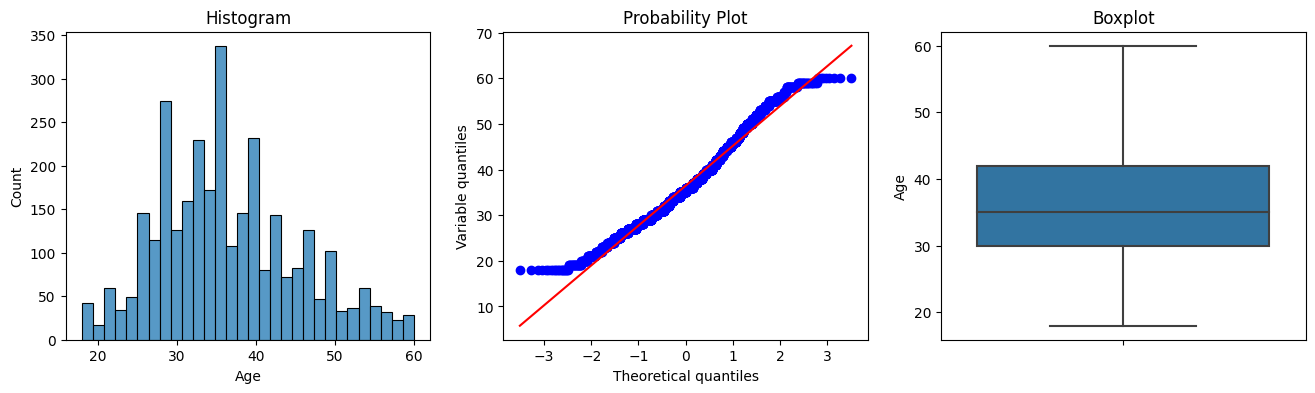

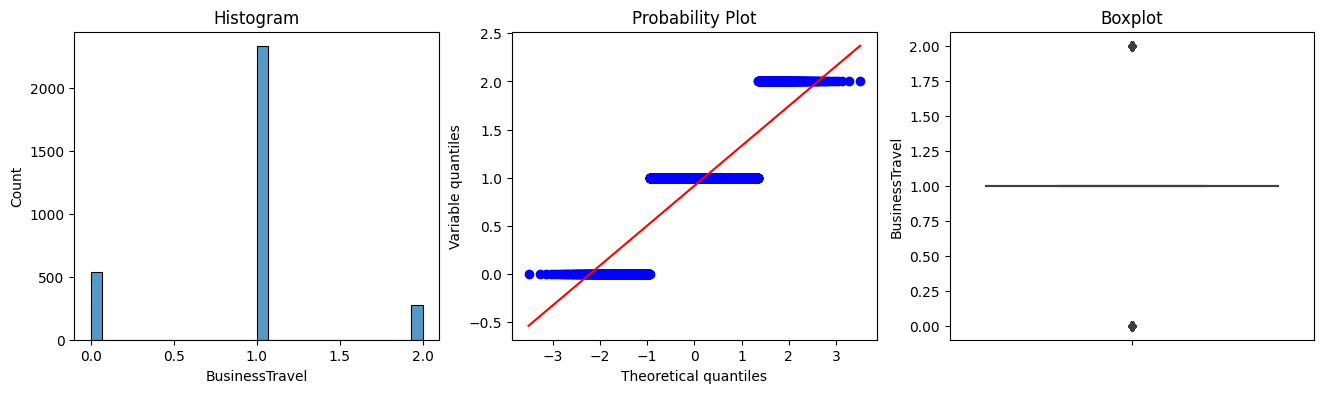

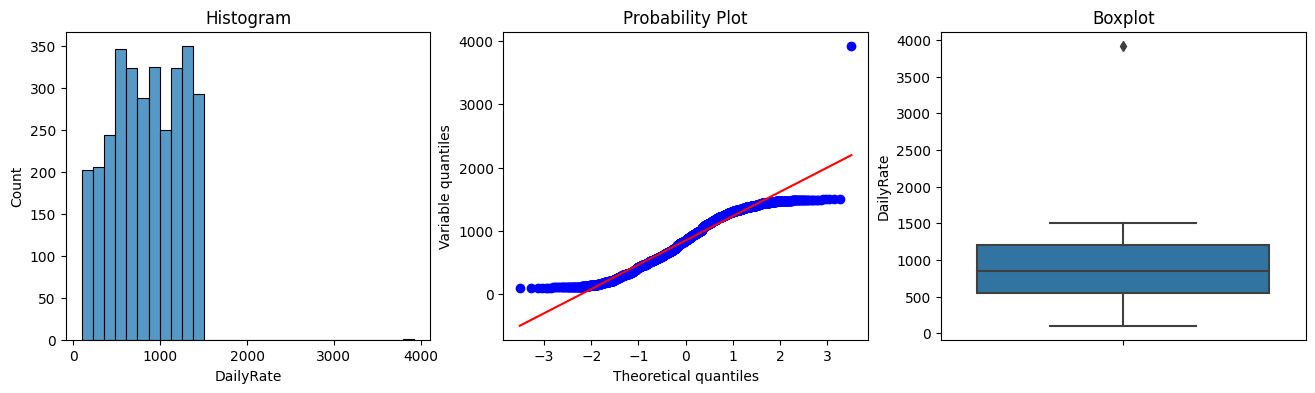

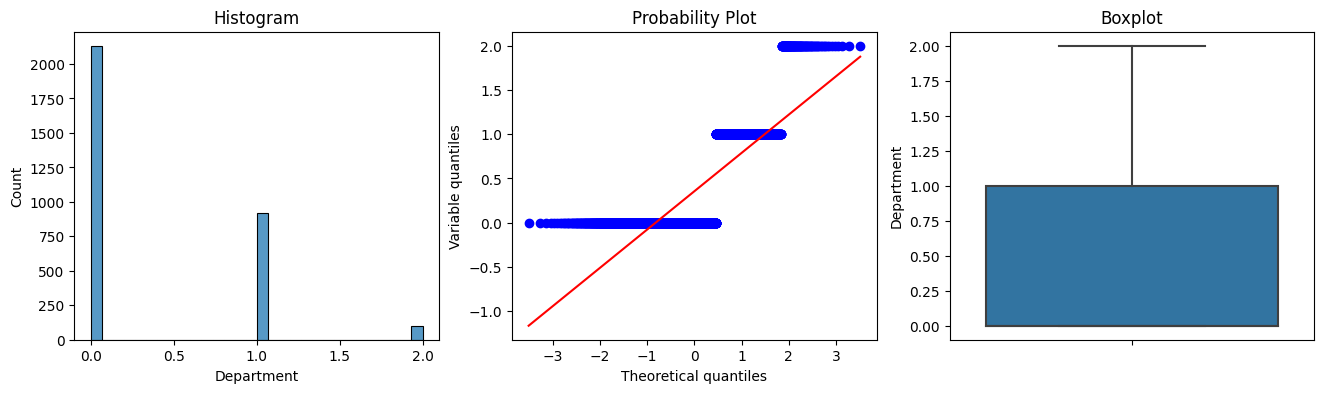

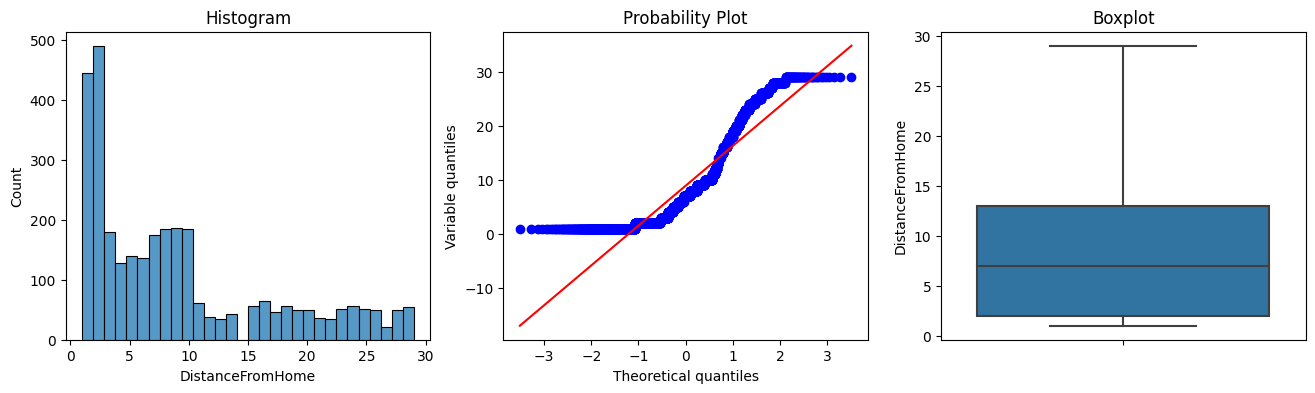

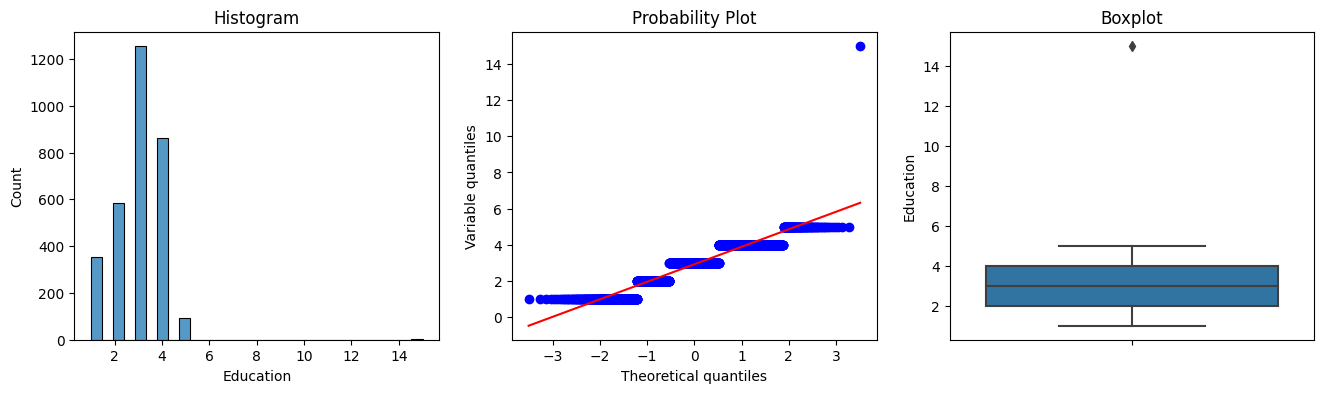

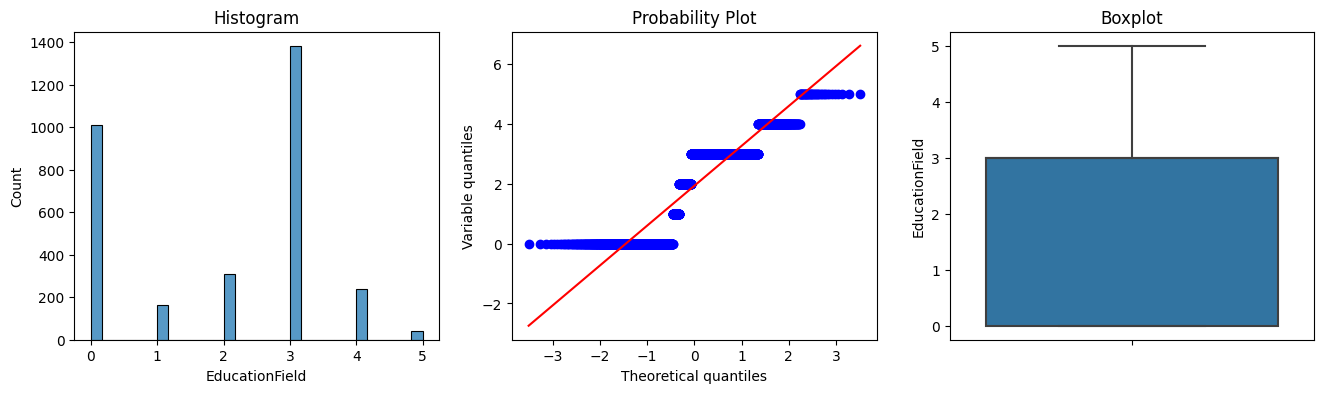

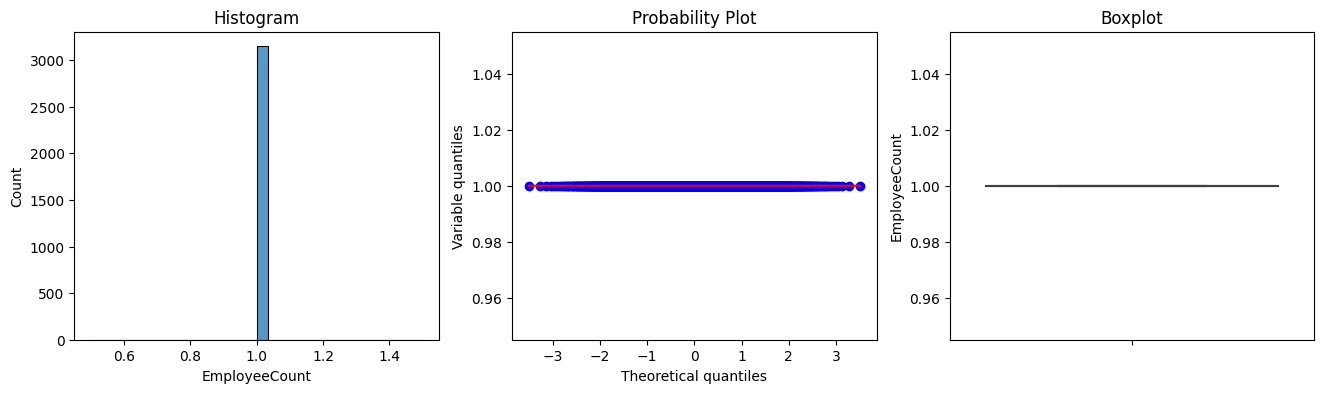

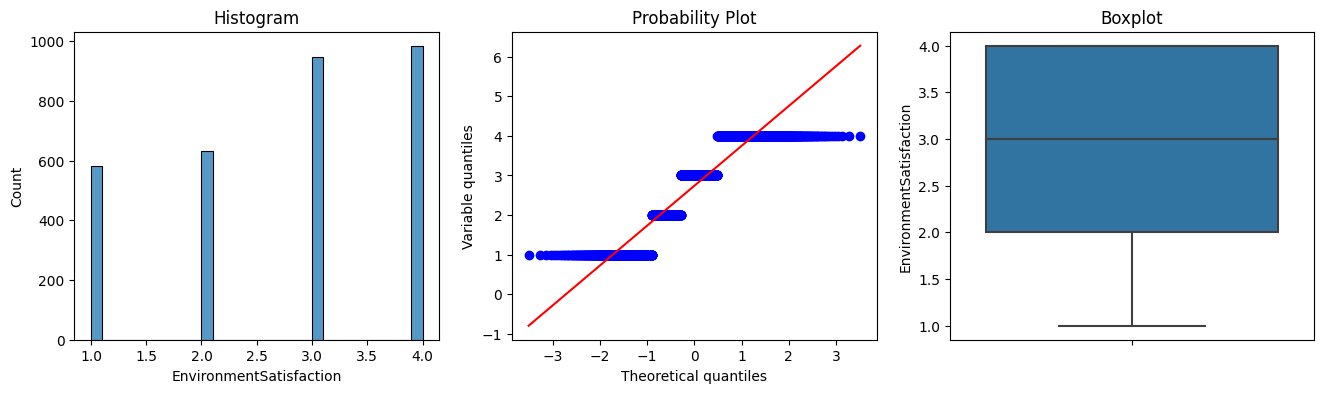

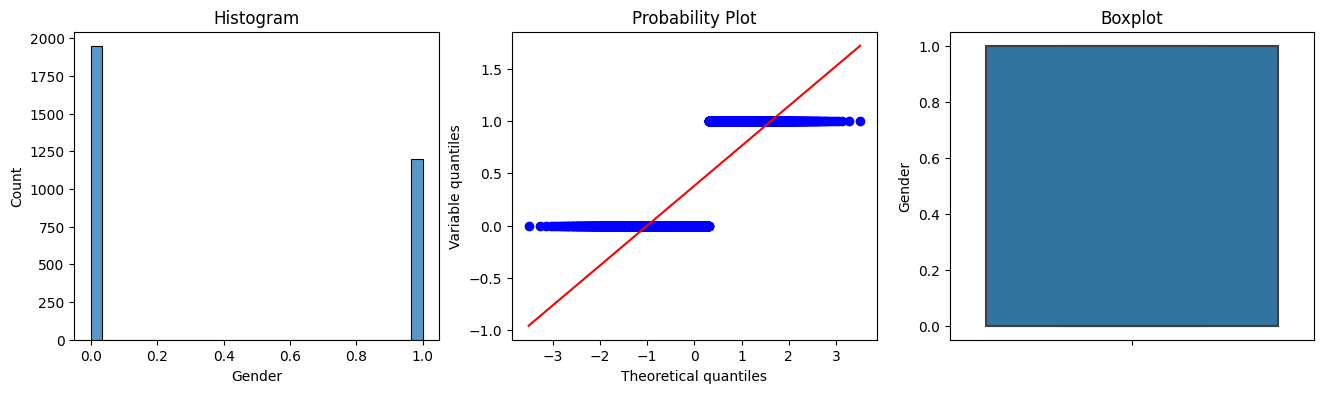

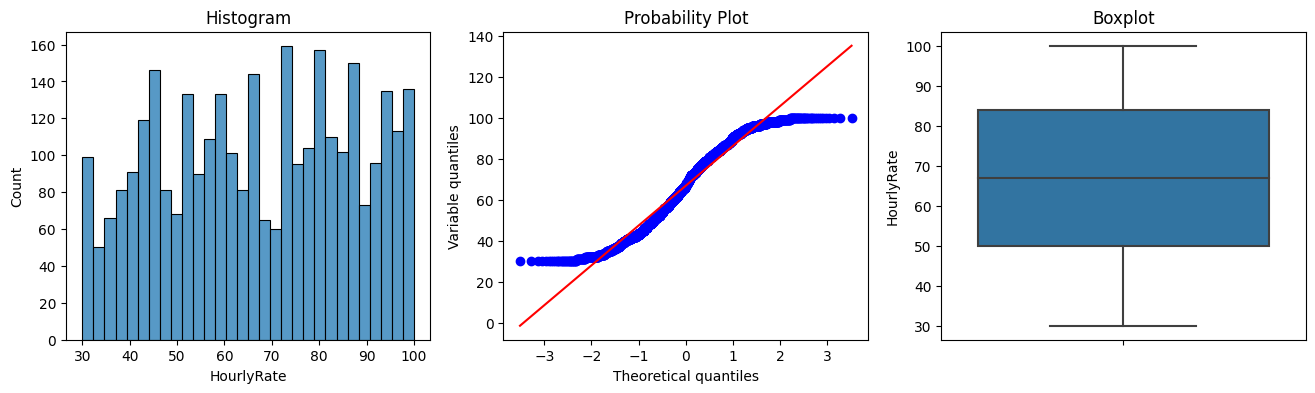

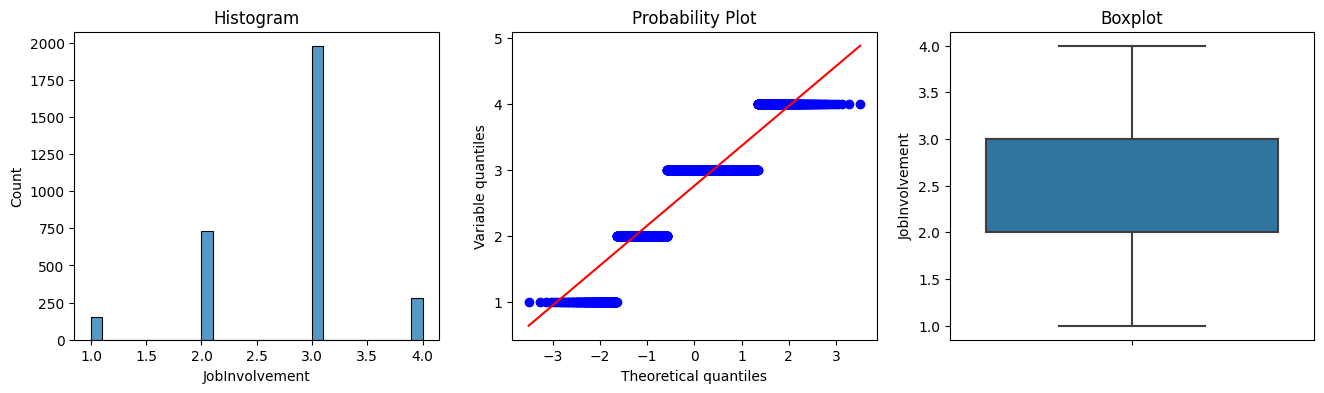

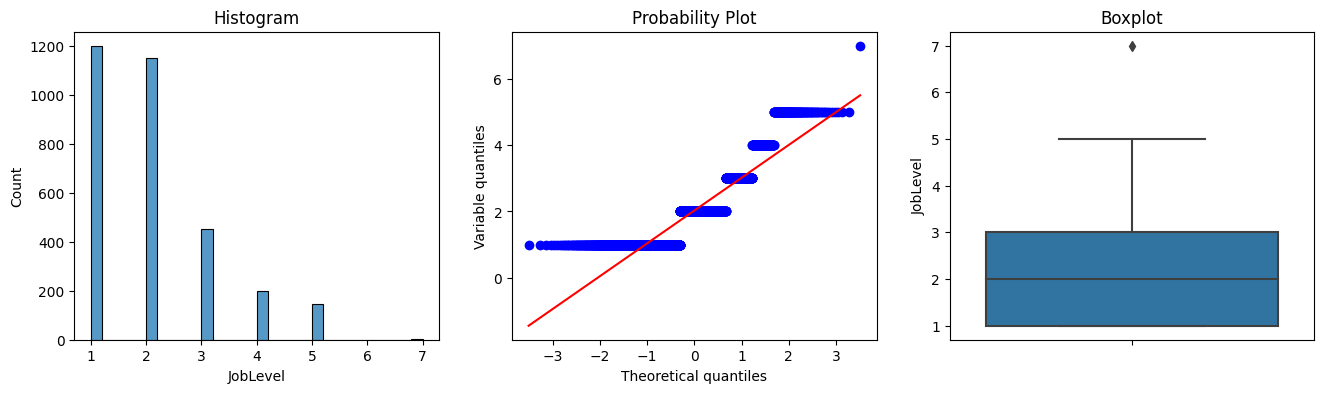

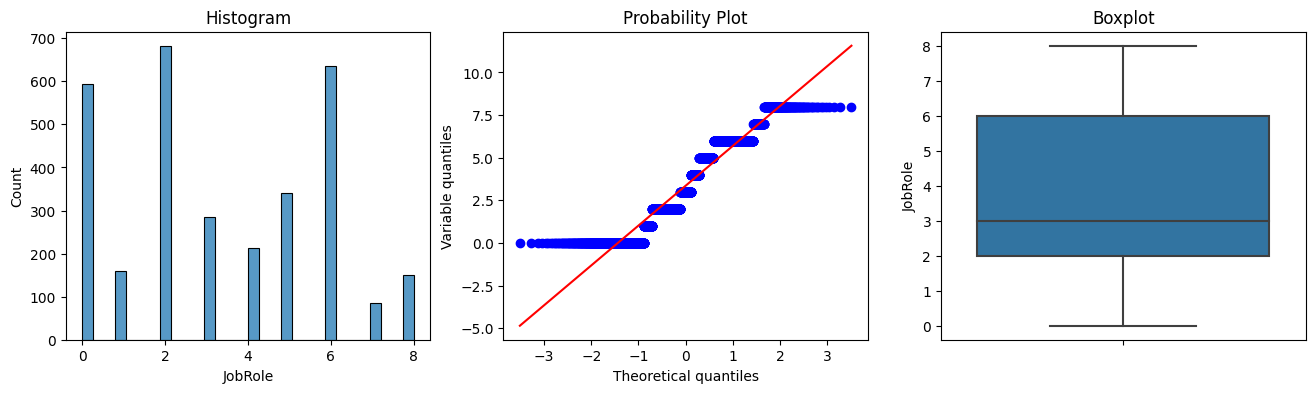

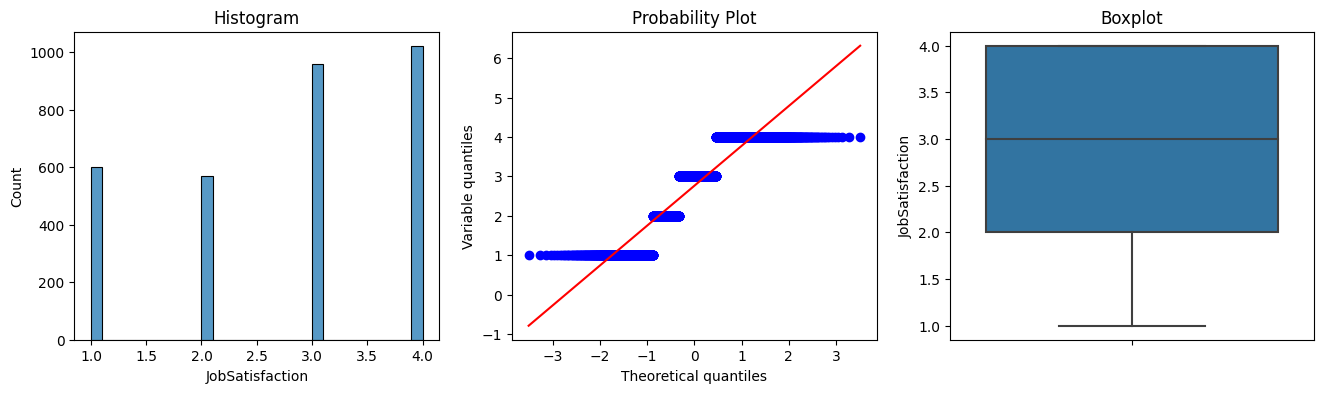

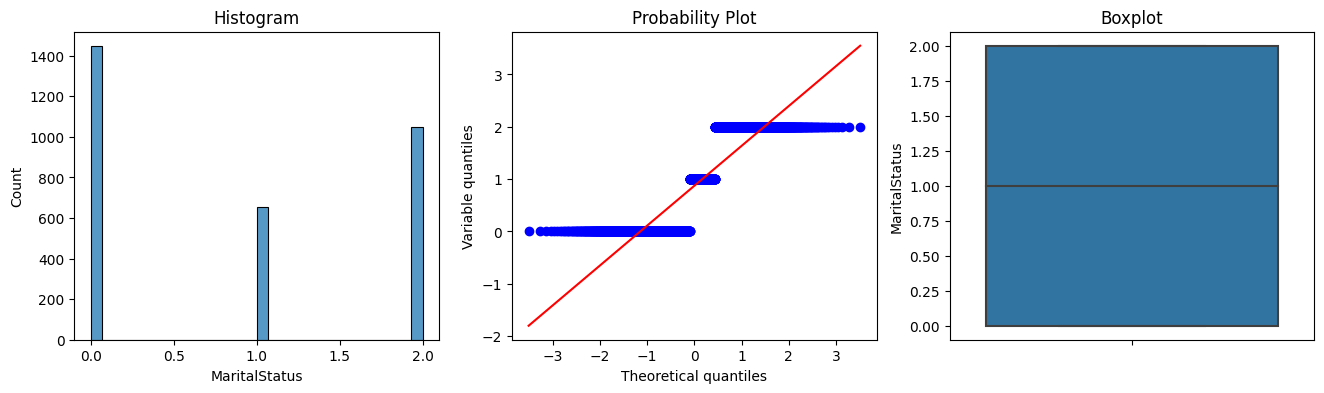

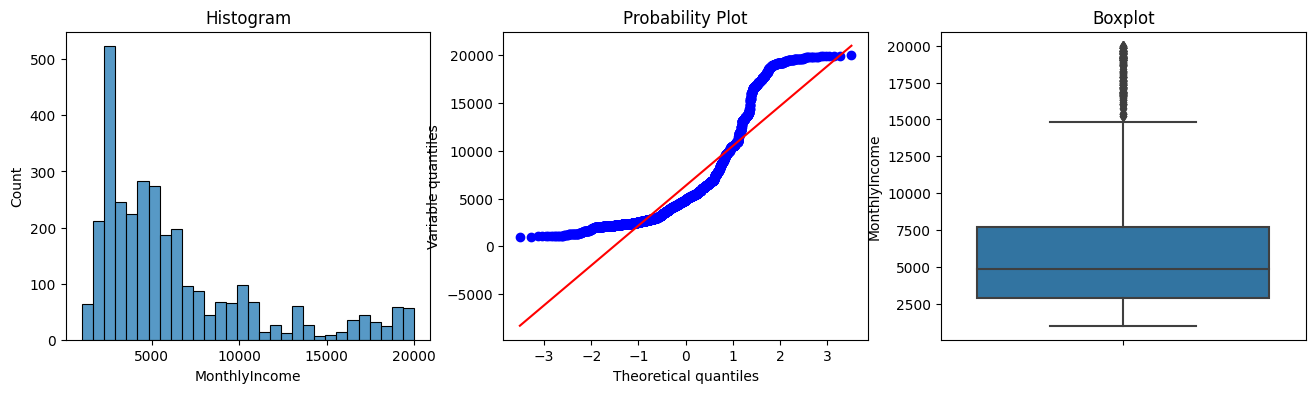

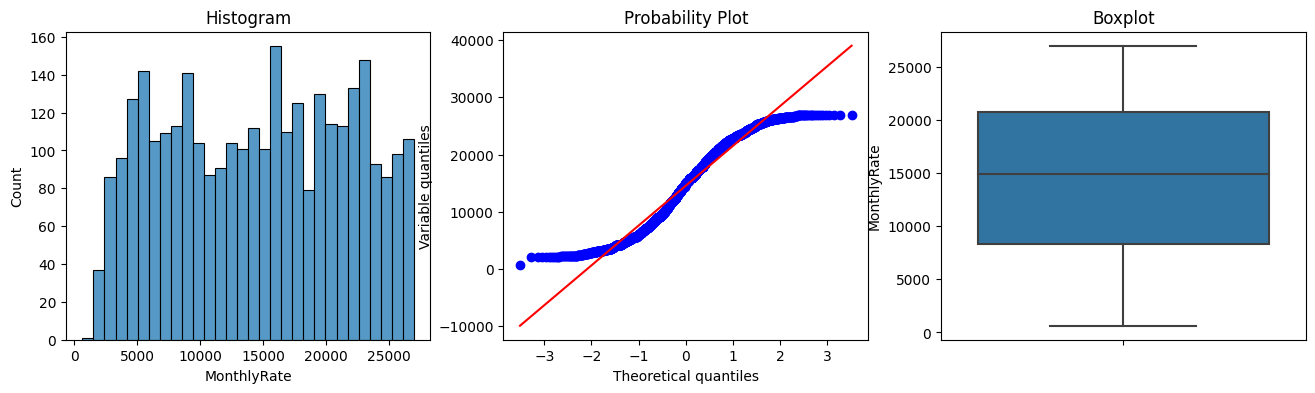

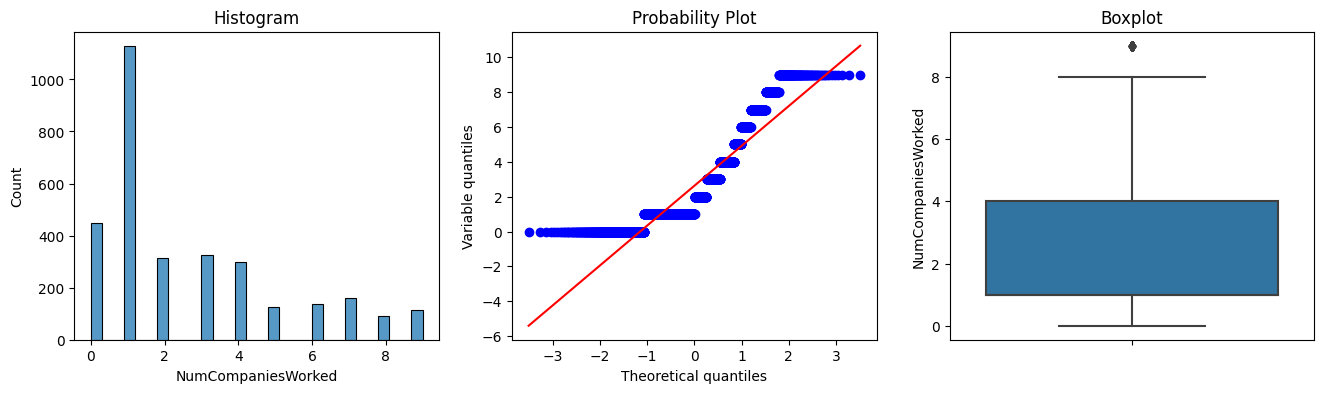

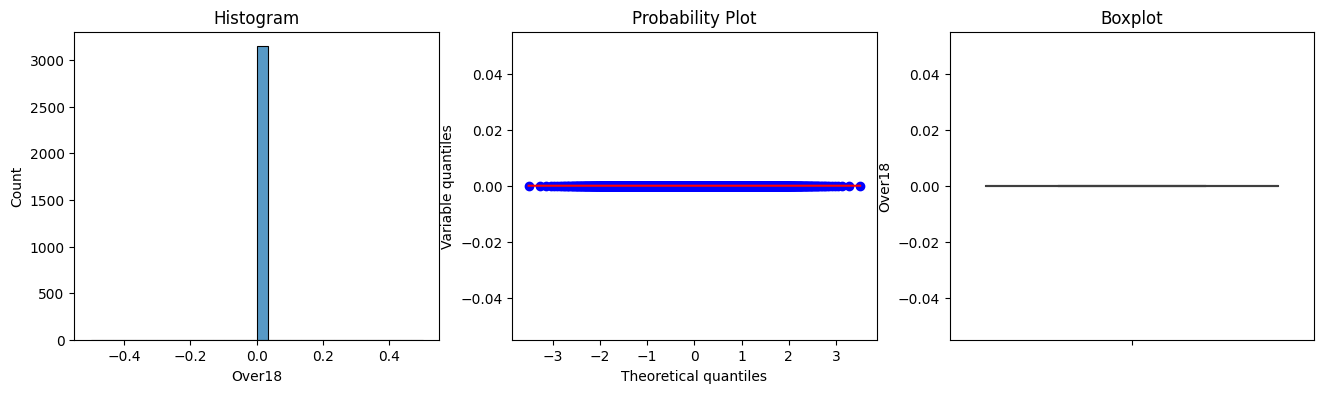

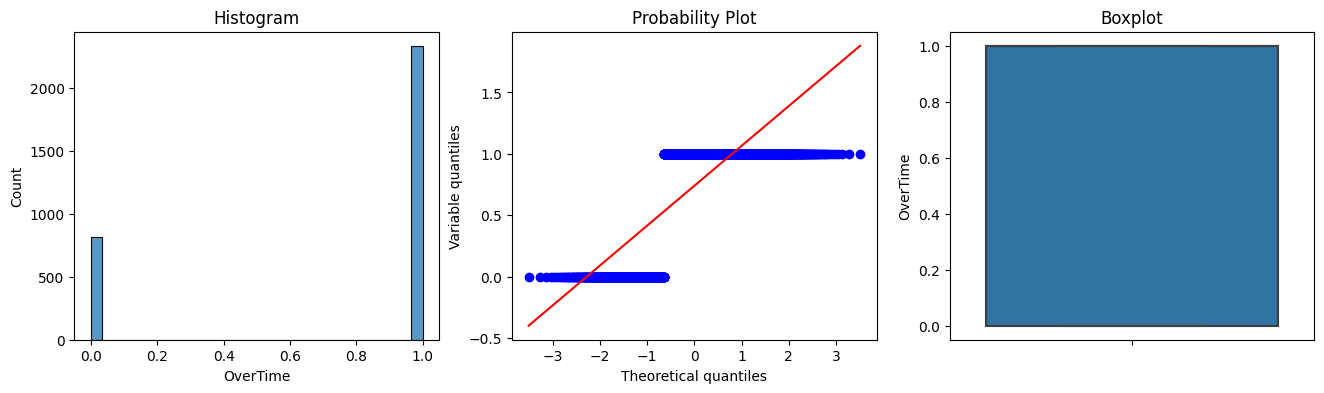

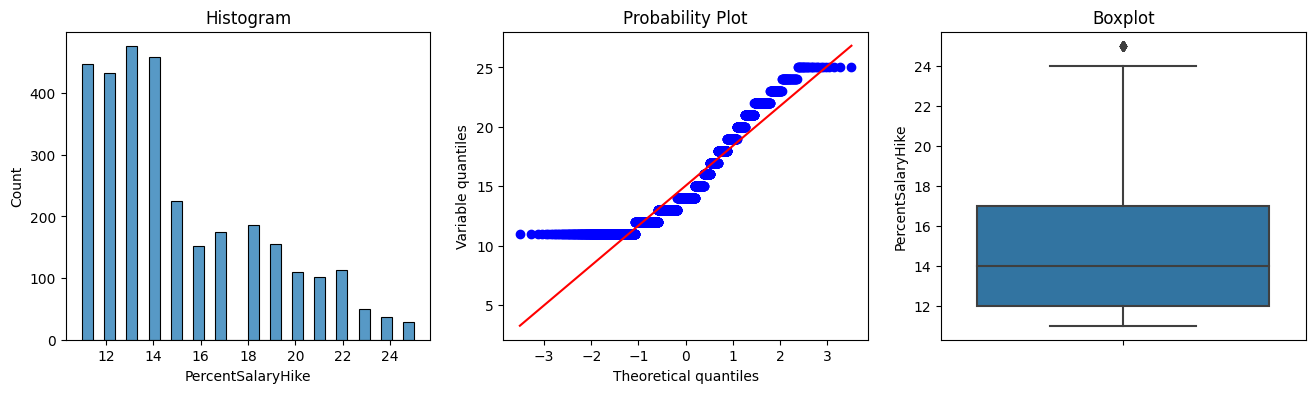

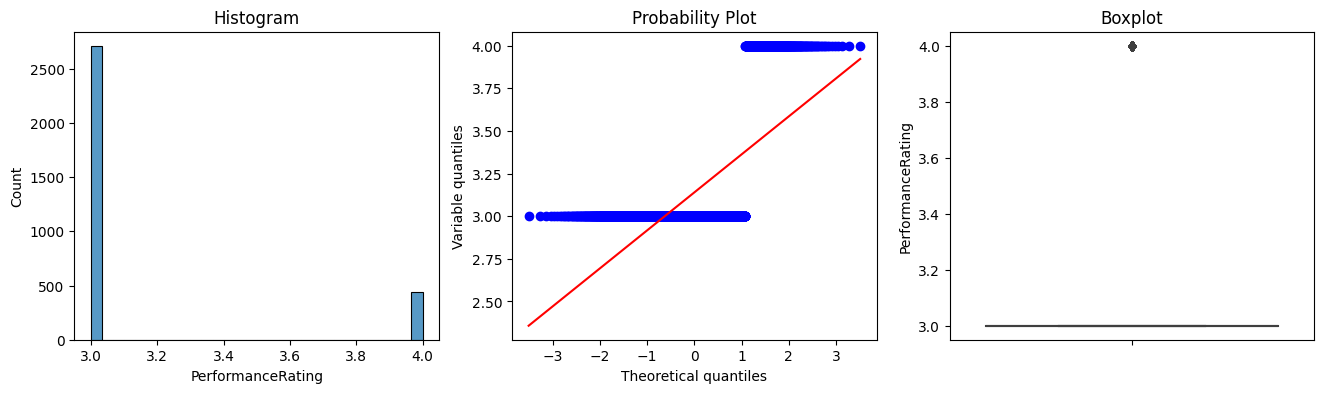

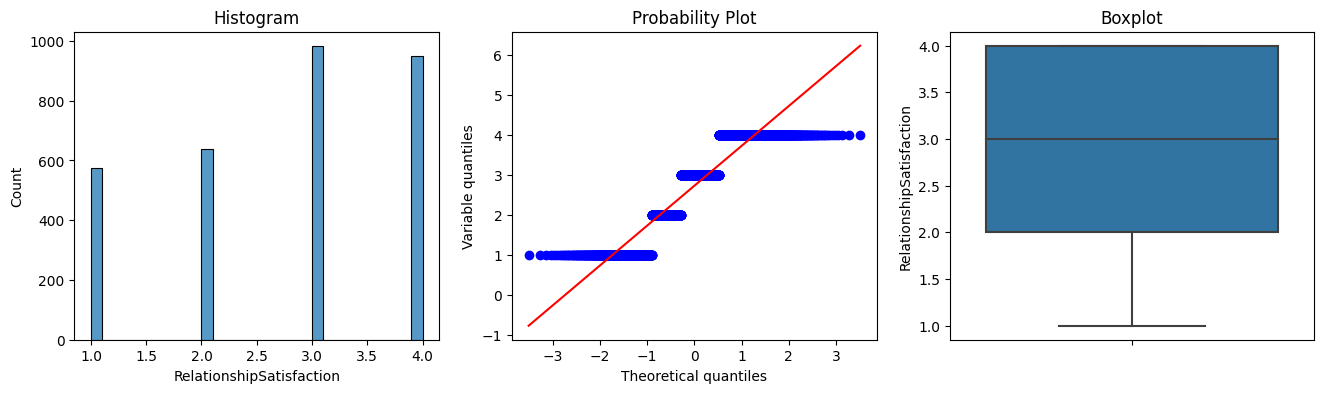

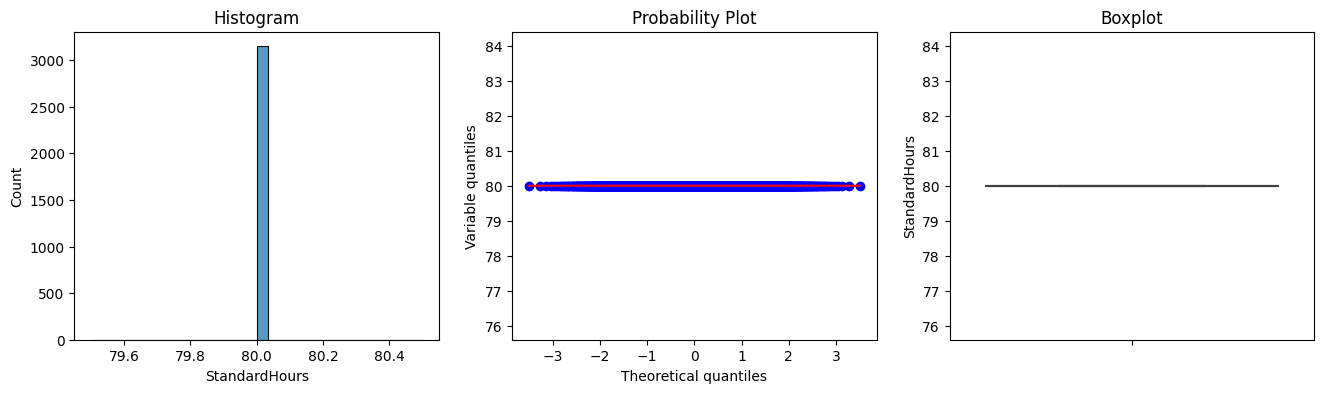

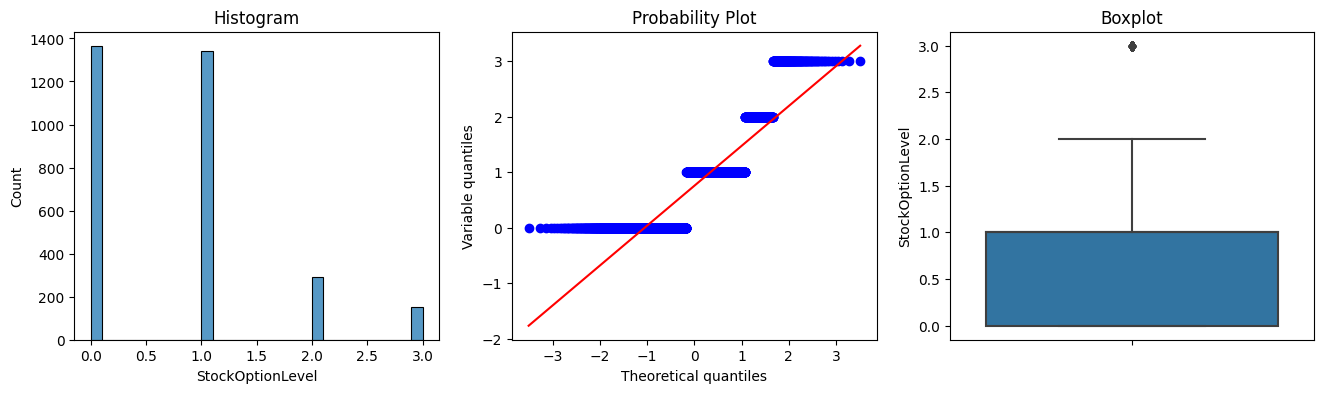

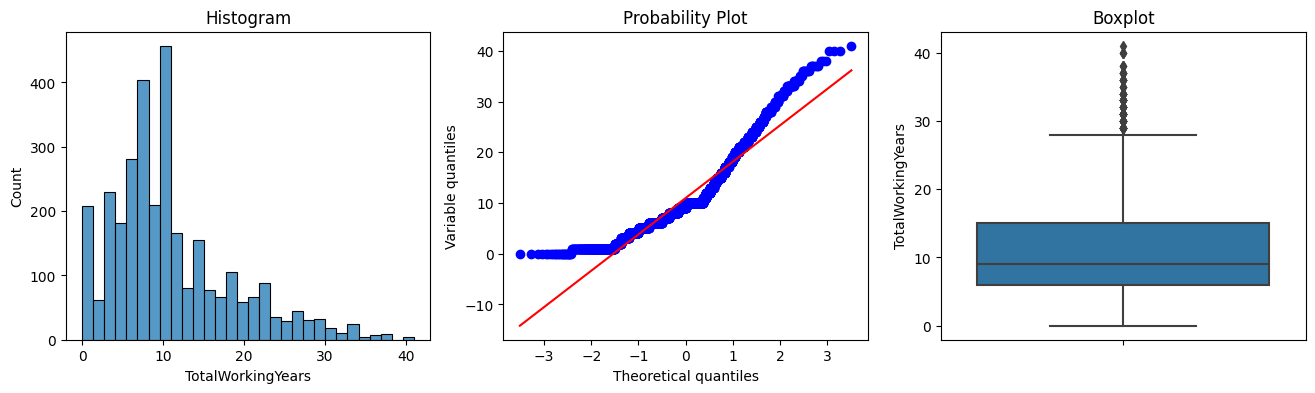

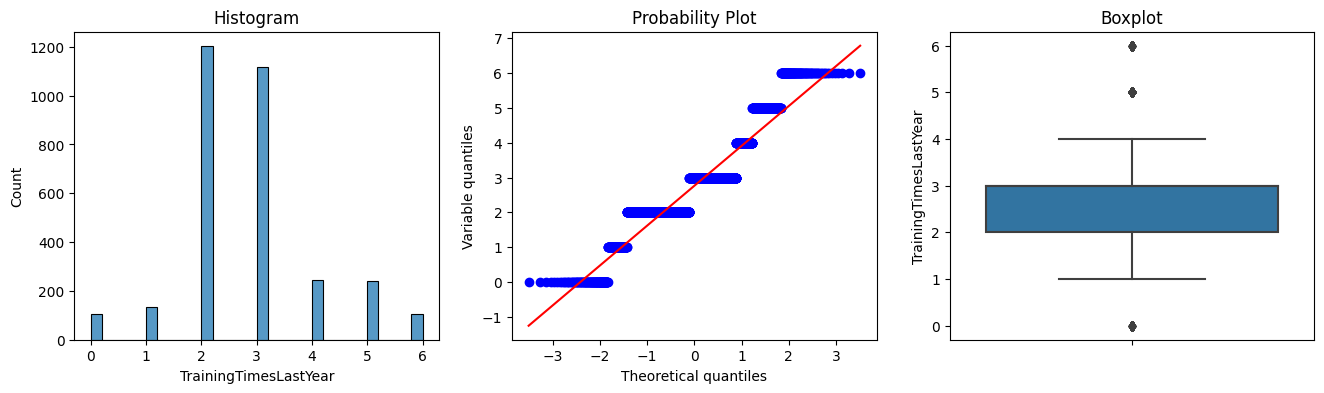

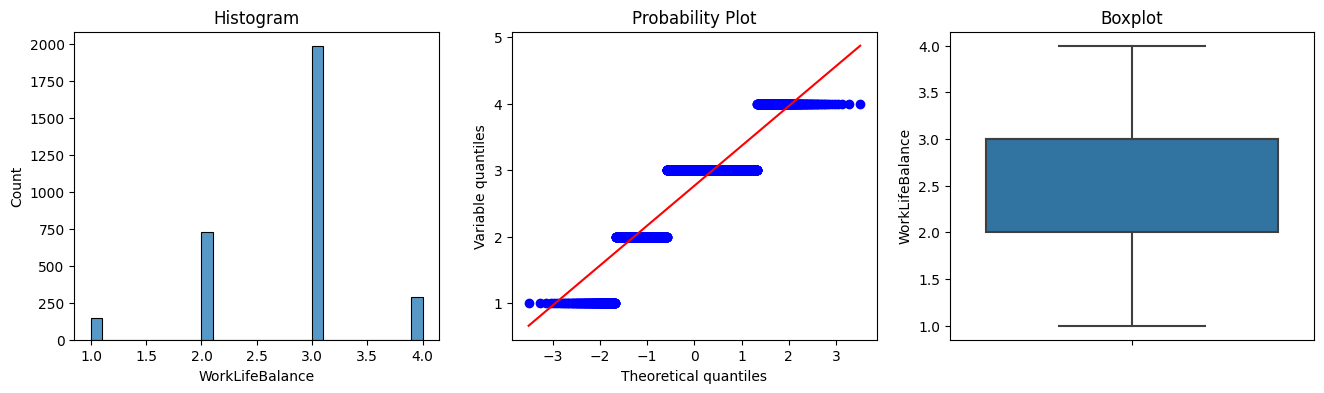

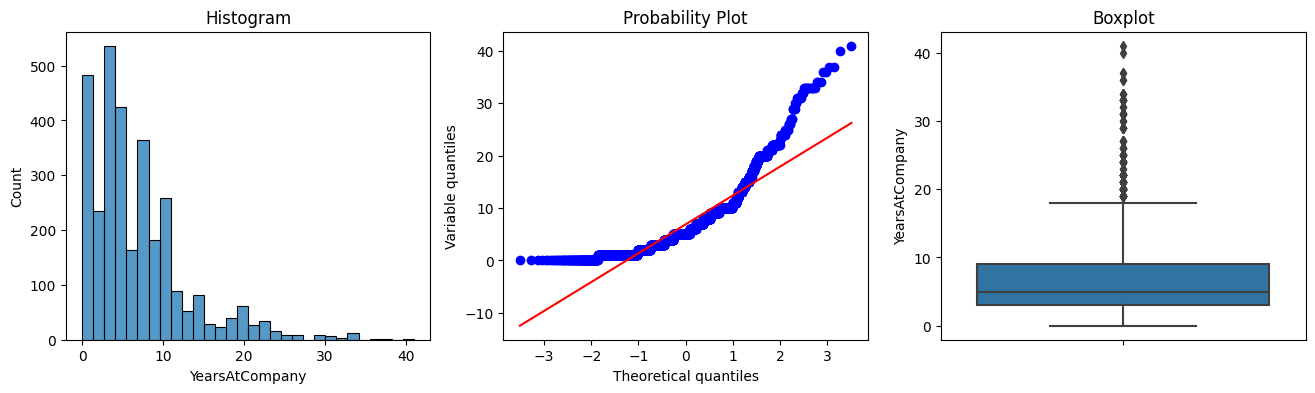

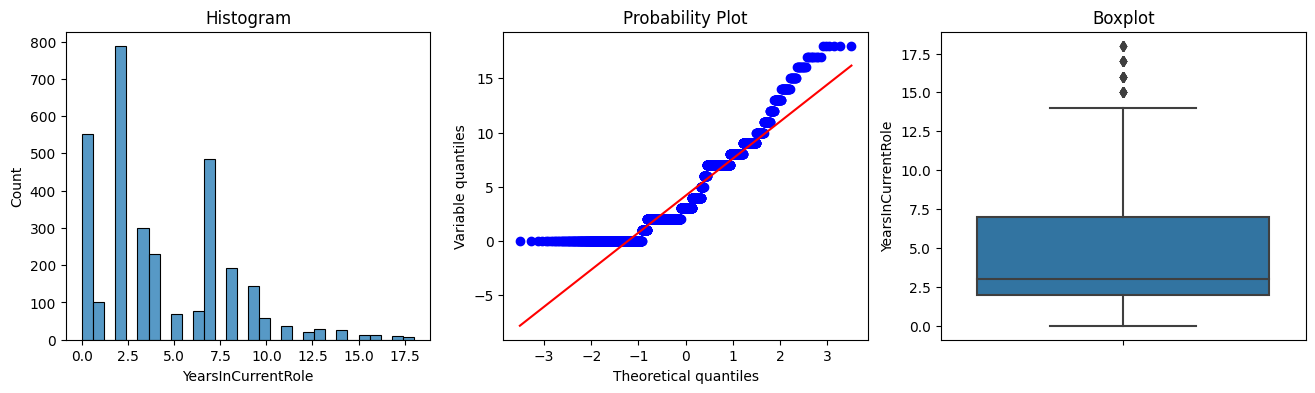

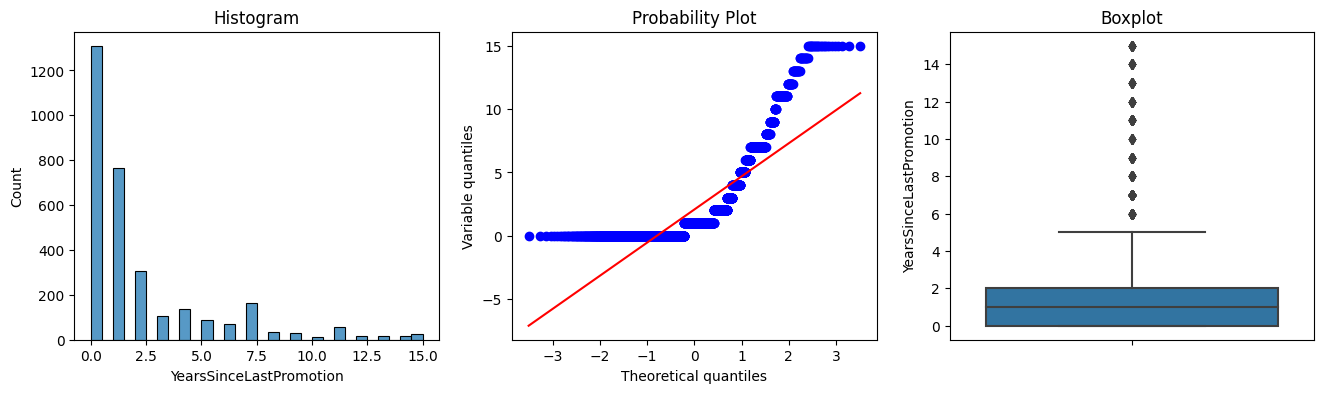

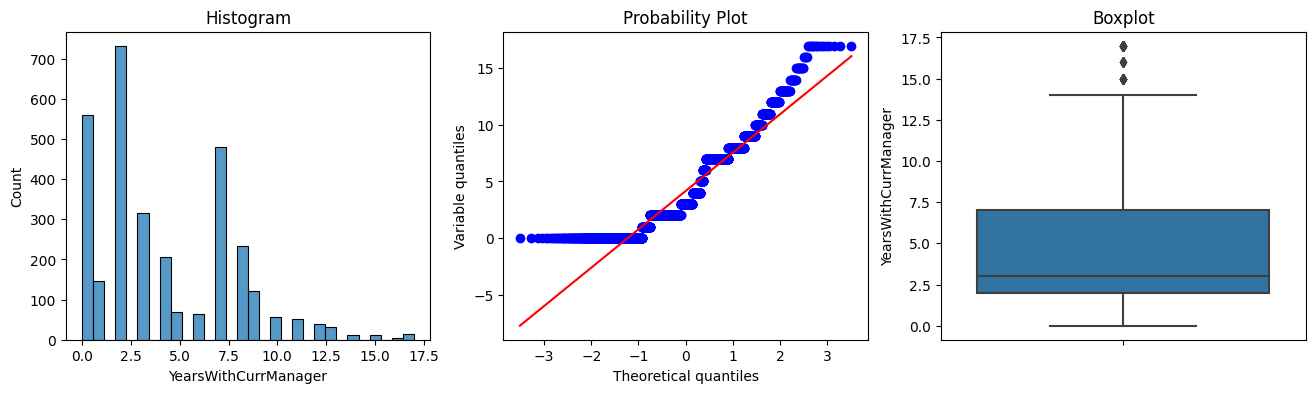

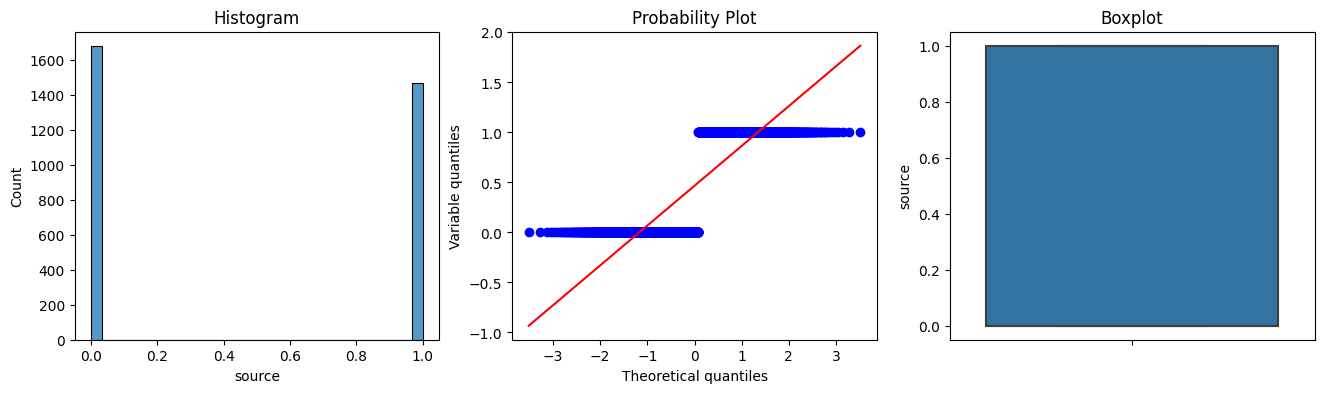

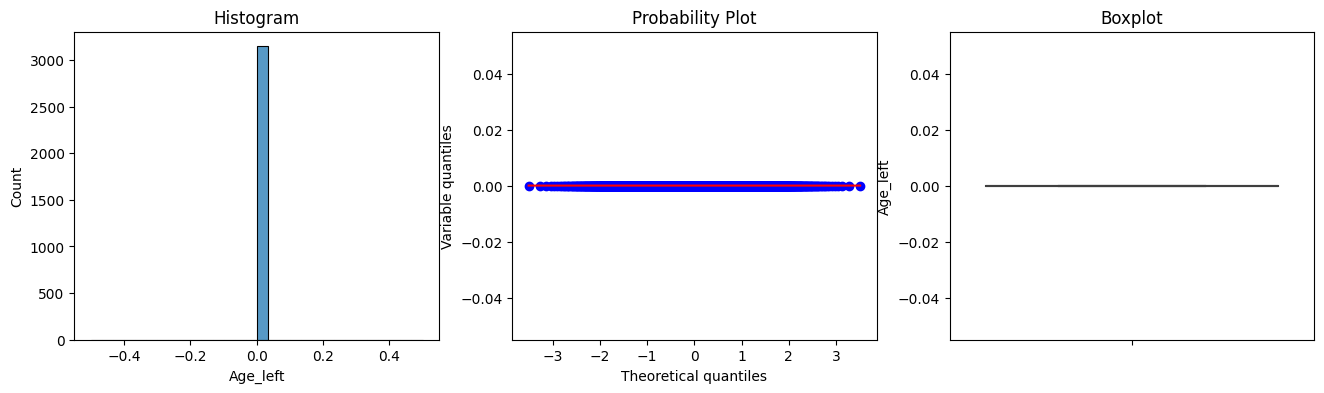

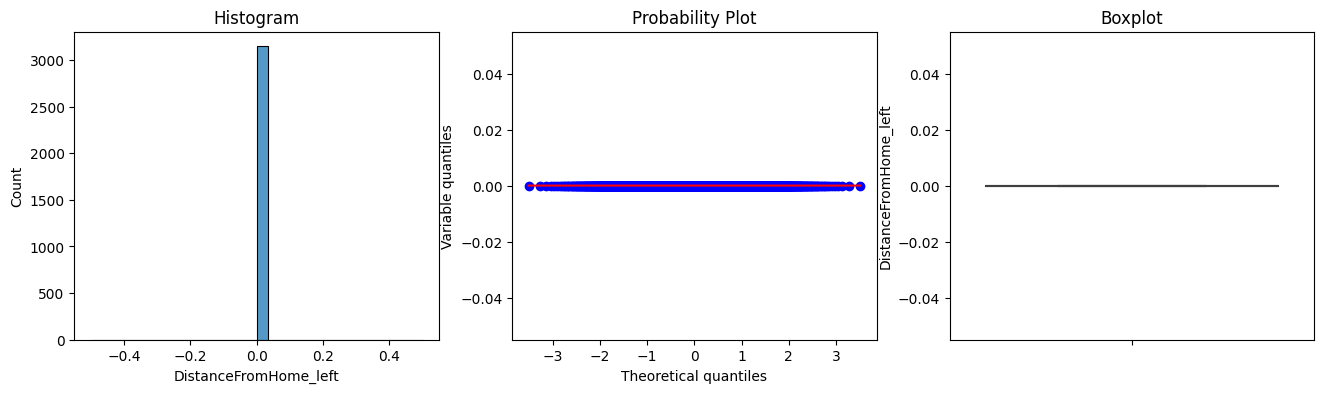

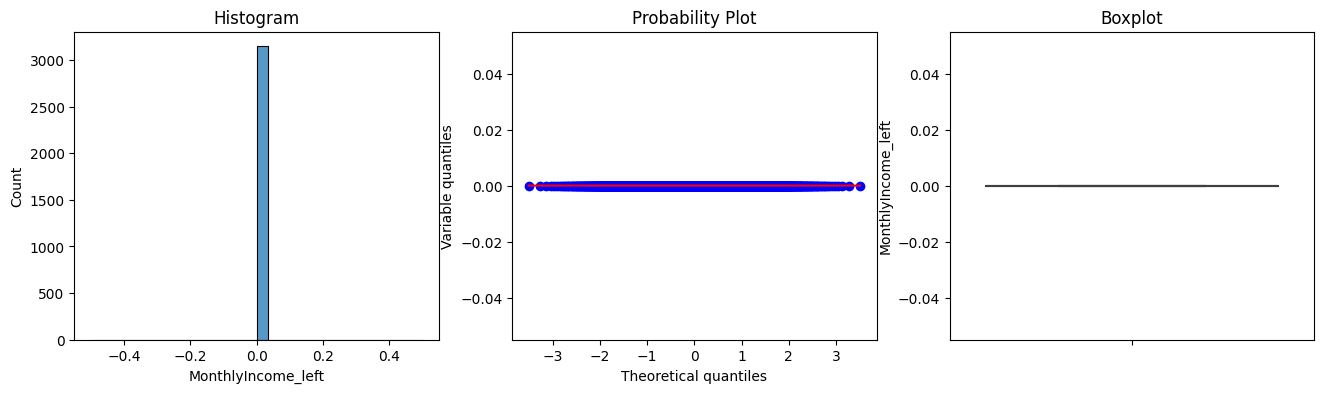

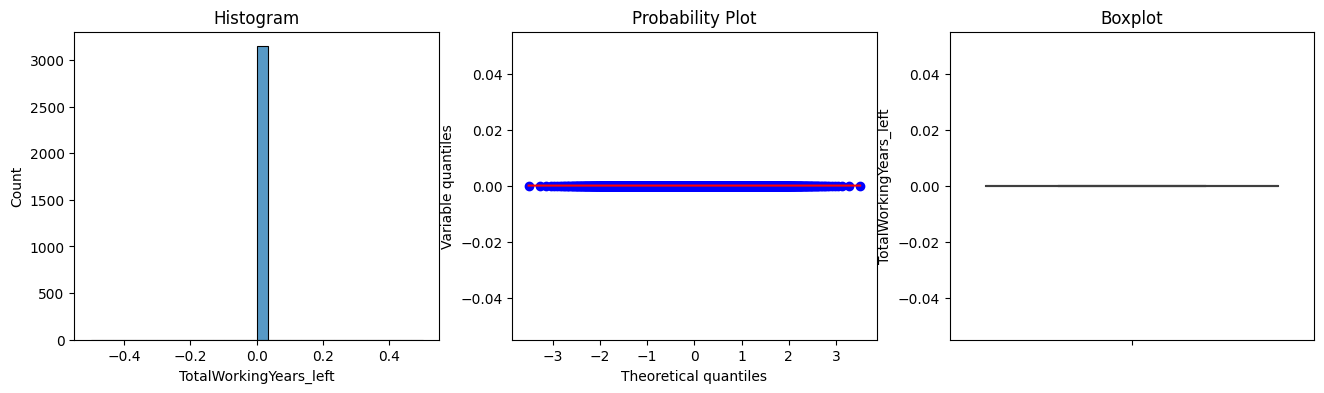

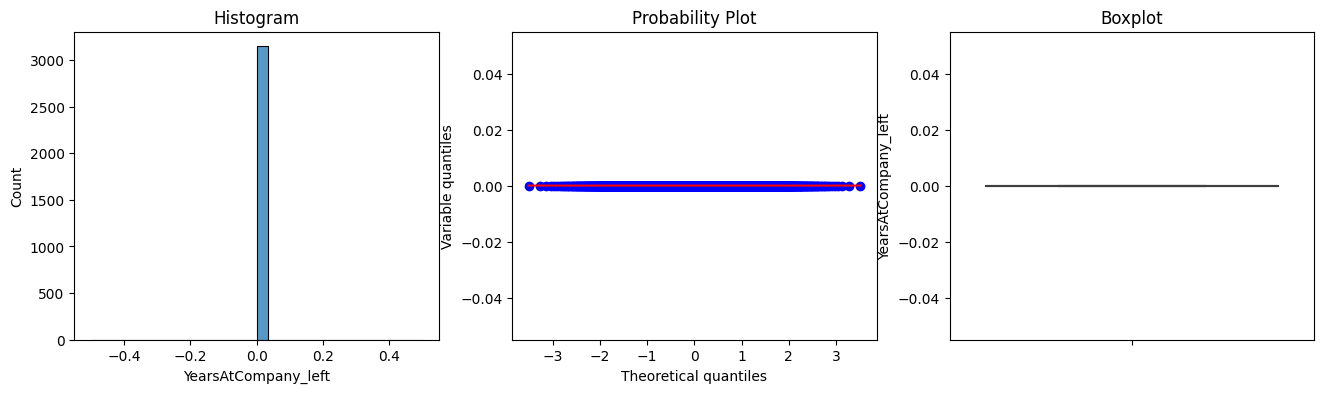

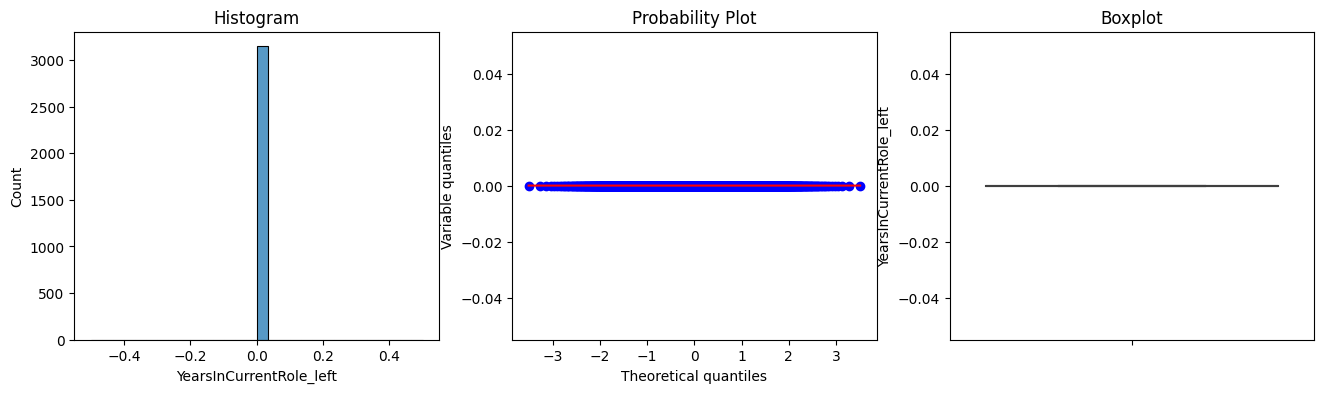

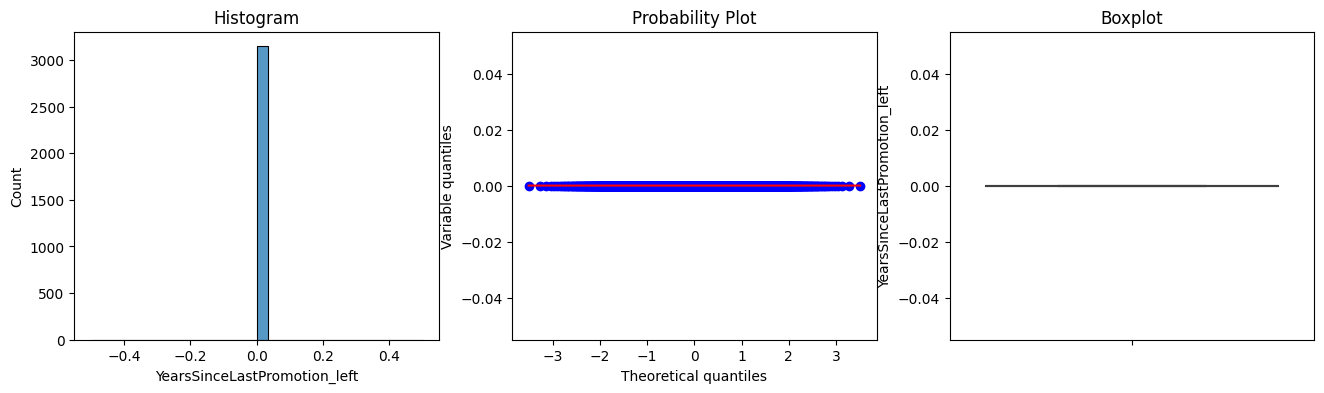

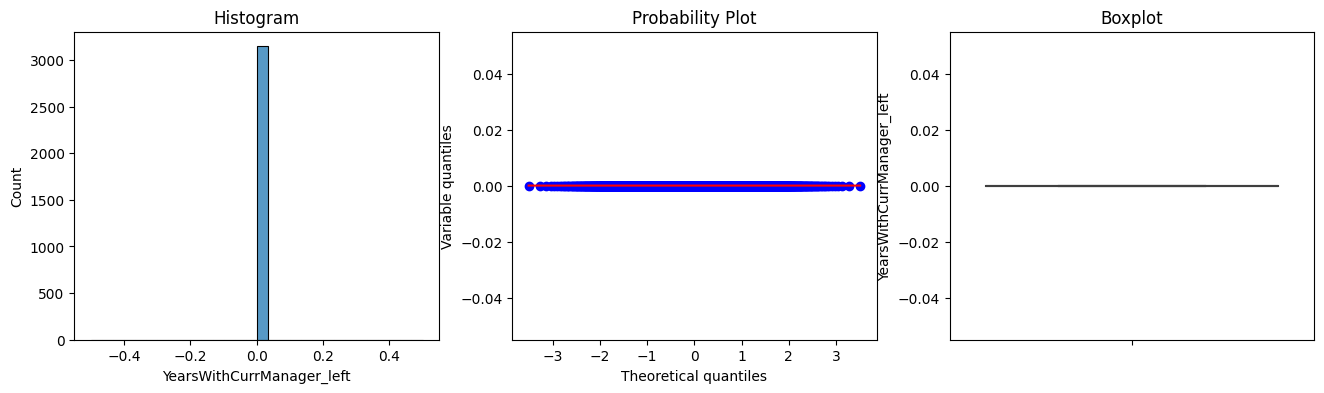

In [301]:
num_ft=train.select_dtypes(include=['int', 'float']).columns
def diagnostic_plots(df, variable):
        # function takes a dataframe (df) and
        # the variable of interest as arguments

        # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

for col in num_ft:
    diagnostic_plots(train,col)

In [4]:
num_ft=train.select_dtypes(include=['int', 'float']).columns
num_ft

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [420]:
train.head(2)

Age     BusinessTravel  DailyRate              Department  \
0   36  Travel_Frequently        599  Research & Development   
1   35      Travel_Rarely        921                   Sales   

   DistanceFromHome  Education EducationField  EmployeeCount  \
0                24          3        Medical              1   
1                 8          3          Other              1   

   EnvironmentSatisfaction Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        4   Male          42               3         1   
1                        1   Male          46               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0  Laboratory Technician                4       Married           2596   
1   Sales Representative                1       Married           2899   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0         5099                   1      Y      Yes                 13   
1        10778                   1      Y       No                 17   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         2             80   
1                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 1                 10                      2   
1                 1                  4                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                3              10                   0   
1                3               4                   2   

   YearsSinceLastPromotion  YearsWithCurrManager     source  target  
0                        7                     8  synthetic       0  
1                        0                     3  synthetic       0

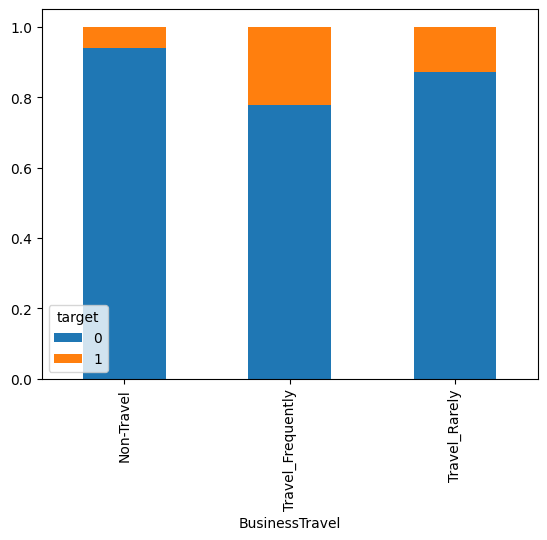

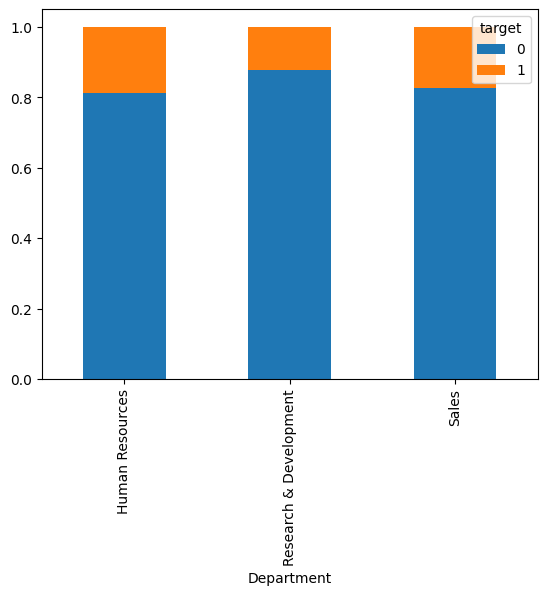

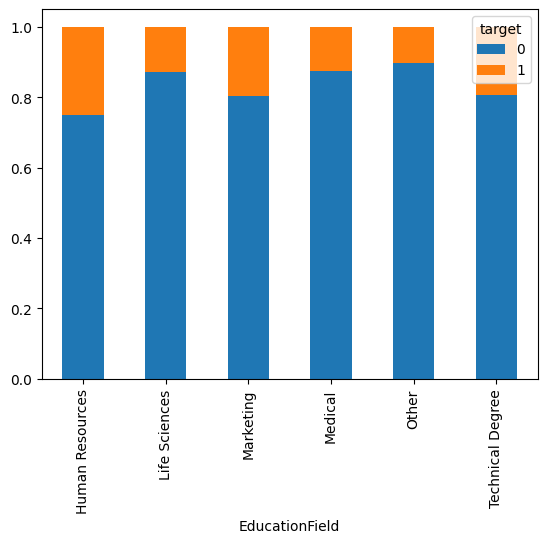

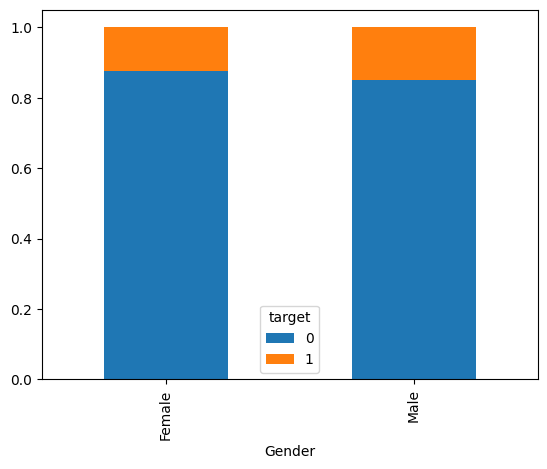

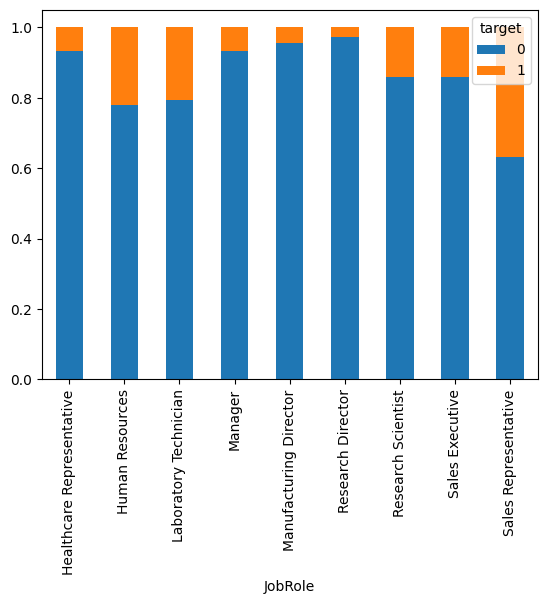

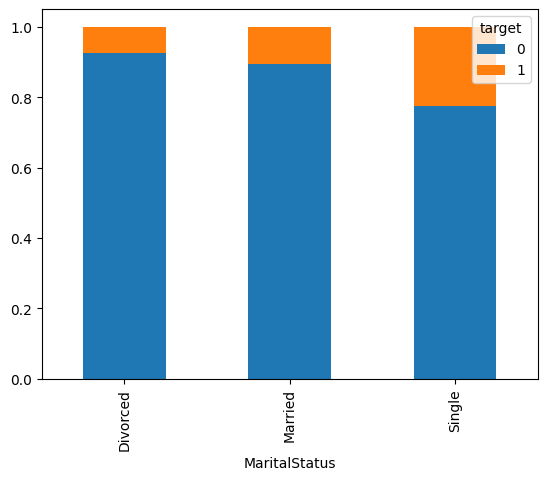

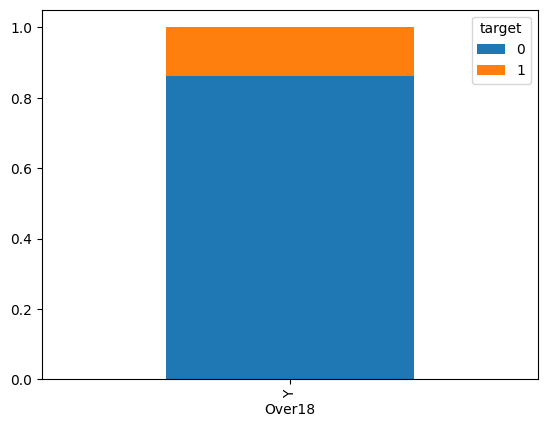

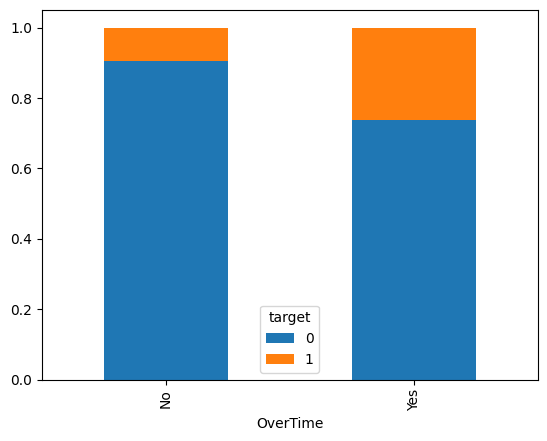

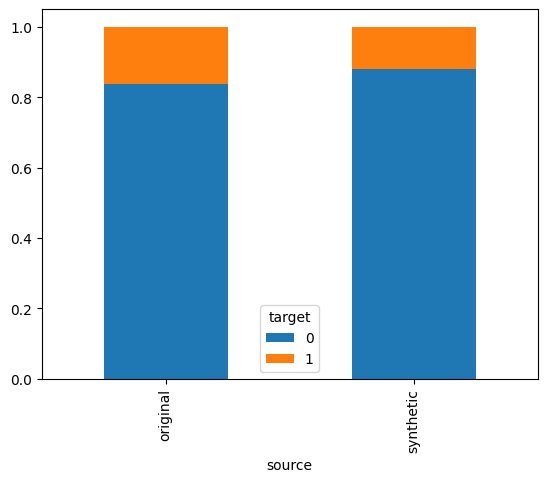

In [421]:
# for col in num_ft:  
#     train['cat_'+{col}]=pd.cut(train[col],4)
#     a=pd.crosstab(train['cat_'+{col}],train['target'])
#     a.div(a.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
#     del train['cat_'+{col}]
cat_cols=test.select_dtypes(include=['object'])    
for col in list(cat_cols):  
    #train['cat_' + col]=pd.cut(train[col],4)
    a=pd.crosstab(train[col],train['target'])
    a.div(a.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)


In [84]:
def addFeatures(df):

#     df['MonthlyIncome/Age'] = df['MonthlyIncome'] / df['Age'] 

#     df['feature_1'] = np.where(((df['StockOptionLevel'] >= 1) & (df['YearsAtCompany'] >= 3) & (df['YearsWithCurrManager'] >= 1)), 1, 0)

#     df['feature_2'] = np.where(((df['StockOptionLevel'] < 1) & (df['MonthlyIncome'] > 2700) & (df['OverTime'] == 'Yes')), 1, 0)
    
    
#     df['JobInvolment_On_Salary']= df['JobInvolvement'] / df['MonthlyIncome'] * 1000
#     df['MarriedAndBad_Worklife_Balance'] = np.where(df['MaritalStatus']=='Married', df['WorkLifeBalance']-2, df['WorkLifeBalance']+1)
#     df['DistanceFromHome_rootedTo_JobSatisfaction'] = df['DistanceFromHome']**(1/df['JobSatisfaction'])
#     df['TotalJobSatisfaction'] = df['EnvironmentSatisfaction'] + df['JobSatisfaction'] + df['RelationshipSatisfaction']
#     df['OldLowEmployeeTendToStay'] = df['YearsAtCompany'] / df['JobLevel']
#     df['Mothers'] = np.where((df['Gender']=='Female') & (df['Age']>=36), 1,0)
#     df['Rate'] = df['DailyRate'] * 20 + df['HourlyRate'] * 8 * 20 + df['MonthlyRate']
#     df['RateExtended'] = df['Rate'] * (8 - df['JobSatisfaction'] - df['EnvironmentSatisfaction'])
    
    
    df['cat_Age']=df['Age'].apply(lambda x: 1 if (x>= 17.958) and (x<=28.5) else 0)
    df['cat_daily_rate']=df['DailyRate'].apply(lambda x: 0 if (x>= 2966) and (x<=3921) else 1)
    df['cat_education']=df['Education'].apply(lambda x: 0 if (x>= 11.5) and (x<=15) else 1)
    df['cat_eJobInvolvement']=df['JobInvolvement'].apply(lambda x: 1 if (x>=0.994) and (x<=2.5) else 0)
    
#     df['cat_BusinessTravel']=df['BusinessTravel'].apply(lambda x: 1 if x=='Travel_Frequently' else 0)
#     df['cat_JobRole']=df['JobRole'].apply(lambda x: 1 if x=='Sales Representative' else 0)
#     df['cat_MaritalStatus']=df['MaritalStatus'].apply(lambda x: 1 if x=='Single' else 0)
    return df

train,test=addFeatures(train),addFeatures(test)

In [68]:
# data=pd.concat((train,test)).reset_index(drop=True)

# data=pd.get_dummies(data)
# train=data[:len(train)]
# test=data[len(train):]

In [85]:
data=pd.concat((train,test)).reset_index(drop=True)


cat_cols=test.select_dtypes(include=['object'])

# for other categorical features, doing simple numeric representation of feature by identifying distinct values.
for col in cat_cols:
    data[col],_ = data[col].factorize()
    
train=data[:len(train)]
test=data[len(train):]

## Hpyerparameter tunning and Model learning

## Catboost

In [436]:
def objective(trial,train,y):
    
    param = {
       
        "objective": trial.suggest_categorical("objective", ["Logloss"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
        'scale_pos_weight': trial.suggest_int("scale_pos_weight", 0,5)
        
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)
        
        
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

    roc_auc = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(train, y)):
        X_train, X_test = train.iloc[train_idx], train.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        gbm = CatBoostClassifier(n_estimators=6000,**param)
    #    categorical_features_indices = np.where((train.dtypes == object).values.astype(int) == 1)[0]
        gbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=500)

        preds = gbm.predict_proba(X_test)[:,1]
        roc_auc[idx] = roc_auc_score(y_test, preds)
    return np.mean(roc_auc)

In [437]:
# study = optuna.create_study(direction="maximize", study_name="CAT Classifier")
# func = lambda trial: objective(trial, train, y)
# study.optimize(func, n_trials=100, timeout=600)

# if __name__ == "__main__":
#     study = optuna.create_study(direction="maximize",pruner=optuna.pruners.HyperbandPruner(
#         min_resource=1, max_resource=n_train_iter, reduction_factor=3))
#     study.optimize(objective, train, y, n_trials=100, timeout=600)

#     print("Number of finished trials: ", len(study.trials))
#     print("Best trial:")
#     trial = study.best_trial

#     print("  Value: {}".format(trial.value))
#     print("  Params: ")
#     for key, value in trial.params.items():
#         print("    {}: {}".format(key, value))
        
study = optuna.create_study(direction="maximize",pruner=optuna.pruners.HyperbandPruner(
        min_resource=1, max_resource=n_train_iter, reduction_factor=3))
func = lambda trial: objective(trial, train, y)
study.optimize(func, n_trials=100, timeout=600)

print(f"\tBest value (rmse): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-01-20 10:10:07,060] A new study created in memory with name: no-name-a60e04f6-25cb-4f94-b23a-c13a0e419f5c

[I 2023-01-20 10:10:15,157] Trial 0 finished with value: 0.8497301395427748 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.08160895274660204, 'depth': 6, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'scale_pos_weight': 5}. Best is trial 0 with value: 0.8497301395427748.

[I 2023-01-20 10:11:30,255] Trial 1 finished with value: 0.86150596498128 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.0936922262215985, 'depth': 3, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS', 'scale_pos_weight': 3}. Best is trial 1 with value: 0.86150596498128.

[I 2023-01-20 10:13:27,193] Trial 2 finished with value: 0.8588236513242876 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.027122455186348093, 'depth': 11, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'scale_pos_weight': 5, 'bagging_temperature': 3.20883210608494}. Be

	Best value (rmse): 0.86151

	Best params:

		objective: Logloss

		colsample_bylevel: 0.0936922262215985

		depth: 3

		boosting_type: Ordered

		bootstrap_type: MVS

		scale_pos_weight: 3


In [193]:
# data=pd.concat((train,test)).reset_index(drop=True)

# cat_cols=test.select_dtypes(include=['object'])

# # for other categorical features, doing simple numeric representation of feature by identifying distinct values.
# for col in cat_cols:
#     data[col],_ = data[col].factorize()


# train=data[:len(train)]
# train['target']=y
# test=data[len(train):]
categorical_features_indices

array([ 0,  4,  5,  6,  9, 10, 11, 12], dtype=int64)

In [86]:
#del train['target']
cat_params= {'n_estimators':5000,
             'objective': 'Logloss',
             'eval_metric':'AUC',
        
             'learning_rate': 0.04,
             'colsample_bylevel': 0.04803250851124408,
             'depth': 4,
             'boosting_type': 'Plain',
             'bootstrap_type': 'MVS',
             'scale_pos_weight': 2
            } 

cat_params_dummy = {'n_estimators':75000,
             'objective': 'Logloss',
             'eval_metric':'AUC',
        
             'learning_rate': 0.03,
             'colsample_bylevel':0.062012686738127334,
             'depth': 3,
             'boosting_type': 'Ordered',
             'bootstrap_type': 'Bayesian',
             'scale_pos_weight': 1,
             'bagging_temperature': 9.031201631888742
            } 




cat_model=CatBoostClassifier(**cat_params_dummy)


kf=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

oof_cat = np.zeros(train.shape[0])
target_column = np.zeros(train.shape[0])

cat_test_clf = []
cat_test_clf_new_feat=[]
train_scores =[]
val_scores =[]
out_of_fold = []

feature_names = list(train.columns)
feature_importance_values = np.zeros(len(feature_names))

for fold_idx, (train_index, test_index) in enumerate(kf.split(train, y)):
    X_train,X_test,y_train,y_test= train.loc[train_index,:] ,train.loc[test_index,:],y[train_index], y[test_index]
    
    categorical_features_indices = np.where((test.dtypes == object).values.astype(int) == 1)[0]
    cat_model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=500,verbose=False)
    
    cat_model.n_estimators = cat_model.best_iteration_
    
    pred_1=cat_model.predict_proba(X_train)[:,1]
    pred_2=cat_model.predict_proba(X_test)[:,1]
    oof_cat[test_index] = pred_2
    target_column[test_index] = y_test
    
    cat_test_clf_new_feat.append(cat_model.predict_proba(test)[:,1])
    #cat_test_clf.append(cat_model.predict_proba(test)[:,1])

    
    #feature_importance_values += cat_model.feature_importances_ / 5


   # loss_cliped=log_loss(y_test,np.clip(pred_1,0.055,0.975))
    training_score=roc_auc_score(y_train,pred_1)
    val_score=roc_auc_score(y_test,pred_2)
    
    #del pred_1,pred_2,lr_test_a
    
    print(f'fold no ----->{fold_idx+1}')
    print(f'training_roc_score-->>>{training_score}')
    print(f'val_roc_score-->>>{val_score}')
          
    print('*******************************************')
    print('*******************************************')
    
    train_scores.append(training_score)
    val_scores.append(val_score)

print(f'train mean score  is ---->{np.mean(train_scores)}')
print(f'val mean score  is ---->{np.mean(val_scores)}')  
#cat_test_clf_predictions = np.squeeze(np.mean(cat_test_clf, axis=0))
cat_test_clf_predictions_new_feat = np.squeeze(np.mean(cat_test_clf_new_feat, axis=0))
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})

fold no ----->1

training_roc_score-->>>0.9506565803571521

val_roc_score-->>>0.8828413284132841

*******************************************

*******************************************

fold no ----->2

training_roc_score-->>>0.9269942317743788

val_roc_score-->>>0.9026333445152633

*******************************************

*******************************************

fold no ----->3

training_roc_score-->>>0.9147045414474502

val_roc_score-->>>0.8720228111372023

*******************************************

*******************************************

fold no ----->4

training_roc_score-->>>0.9681135742655137

val_roc_score-->>>0.9260315330426032

*******************************************

*******************************************

fold no ----->5

training_roc_score-->>>0.9184154436964217

val_roc_score-->>>0.846108688359611

*******************************************

*******************************************

fold no ----->6

training_roc_score-->>>0.9264611221175825

v

## LightGBM

In [14]:

def objective(trial, X, y):
    param_grid = {
        # "device_type": trial.suggest_categorical("device_type", ['gpu']),
       "boosting_type":  trial.suggest_categorical("boosting_type", ["gbdt",  "dart"]),
#         "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 1.0, log=True),
#         "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 1.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        'max_bin':trial.suggest_int("max_bin", 50, 800),
        'max_depth':trial.suggest_int("max_depth", 0, 10),
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

    cv_scores = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(train, y)):
        X_train, X_test = train.iloc[train_idx], train.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = lgb.LGBMClassifier(objective="binary",metric='auc',verbose=0, **param_grid)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_test, y_test)],
            early_stopping_rounds=100,  # Add a pruning callback
        )
        preds = model.predict_proba(X_test)[:,1]
        cv_scores[idx] = roc_auc_score(y_test, preds)

    return np.mean(cv_scores)

In [15]:
study = optuna.create_study(direction="maximize",pruner=optuna.pruners.HyperbandPruner(
        min_resource=1, max_resource=n_train_iter, reduction_factor=3))
func = lambda trial: objective(trial, train, y)
study.optimize(func, n_trials=100, timeout=600)

print(f"\tBest value (rmse): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")
    

[I 2023-01-23 08:50:40,467] A new study created in memory with name: no-name-f01ac111-5393-4f99-9678-0063168be4b3


[LightGBM] [Warning] feature_fraction is set=0.5920735494867668, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5920735494867668

[LightGBM] [Warning] bagging_fraction is set=0.6363674646271912, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6363674646271912

[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6

[LightGBM] [Warning] feature_fraction is set=0.5920735494867668, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5920735494867668

[LightGBM] [Warning] bagging_fraction is set=0.6363674646271912, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6363674646271912

[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001002 seconds.

You can set `force_col_wise=true` to remove the overhead.

[LightGBM

[I 2023-01-23 08:50:41,469] Trial 0 finished with value: 0.833226526622633 and parameters: {'boosting_type': 'dart', 'num_leaves': 196, 'feature_fraction': 0.5920735494867668, 'bagging_fraction': 0.6363674646271912, 'bagging_freq': 6, 'min_child_samples': 9, 'max_bin': 427, 'max_depth': 8}. Best is trial 0 with value: 0.833226526622633.


[LightGBM] [Warning] feature_fraction is set=0.5920735494867668, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5920735494867668

[LightGBM] [Warning] bagging_fraction is set=0.6363674646271912, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6363674646271912

[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6

[LightGBM] [Warning] feature_fraction is set=0.5920735494867668, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5920735494867668

[LightGBM] [Warning] bagging_fraction is set=0.6363674646271912, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6363674646271912

[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000921 seconds.

You can set `force_col_wise=true` to remove the overhead.

[LightGBM

[I 2023-01-23 08:50:42,269] Trial 1 finished with value: 0.8431083162712504 and parameters: {'boosting_type': 'dart', 'num_leaves': 166, 'feature_fraction': 0.47850791211708926, 'bagging_fraction': 0.7275422867996969, 'bagging_freq': 6, 'min_child_samples': 40, 'max_bin': 578, 'max_depth': 0}. Best is trial 1 with value: 0.8431083162712504.


[LightGBM] [Warning] feature_fraction is set=0.47850791211708926, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47850791211708926

[LightGBM] [Warning] bagging_fraction is set=0.7275422867996969, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7275422867996969

[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6

[LightGBM] [Warning] feature_fraction is set=0.47850791211708926, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47850791211708926

[LightGBM] [Warning] bagging_fraction is set=0.7275422867996969, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7275422867996969

[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000304 seconds.

You can set `force_row_wise=true` to remove the overhead.

And i

[I 2023-01-23 08:50:43,068] Trial 2 finished with value: 0.8418731949858683 and parameters: {'boosting_type': 'dart', 'num_leaves': 80, 'feature_fraction': 0.7548955599326144, 'bagging_fraction': 0.44433763785995206, 'bagging_freq': 5, 'min_child_samples': 14, 'max_bin': 322, 'max_depth': 9}. Best is trial 1 with value: 0.8431083162712504.


[41]	valid_0's auc: 0.854753

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[42]	valid_0's auc: 0.851593

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[43]	valid_0's auc: 0.852144

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[44]	valid_0's auc: 0.850723

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[45]	valid_0's auc: 0.851317

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[46]	valid_0's auc: 0.850066

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[47]	valid_0's auc: 0.851211

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[48]	valid_0's auc: 0.850045

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[49]	valid_0's auc: 0.850935

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[50]	valid_0's auc: 0.851402

[LightGBM] [Warn

[I 2023-01-23 08:50:43,565] Trial 3 finished with value: 0.8410936409520835 and parameters: {'boosting_type': 'dart', 'num_leaves': 235, 'feature_fraction': 0.8069468649238034, 'bagging_fraction': 0.5090255596950723, 'bagging_freq': 7, 'min_child_samples': 23, 'max_bin': 555, 'max_depth': 5}. Best is trial 1 with value: 0.8431083162712504.


[LightGBM] [Warning] feature_fraction is set=0.8069468649238034, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8069468649238034

[LightGBM] [Warning] bagging_fraction is set=0.5090255596950723, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5090255596950723

[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[1]	valid_0's auc: 0.726025

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[2]	valid_0's auc: 0.76195

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[3]	valid_0's auc: 0.761028

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[4]	valid_0's auc: 0.786158

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[5]	valid_0's auc: 0.787091

[LightGBM] [Warning] No further splits with positive gain, best 

[I 2023-01-23 08:50:43,861] Trial 4 finished with value: 0.841930791564969 and parameters: {'boosting_type': 'dart', 'num_leaves': 105, 'feature_fraction': 0.6294276224945305, 'bagging_fraction': 0.4811672151457963, 'bagging_freq': 1, 'min_child_samples': 72, 'max_bin': 86, 'max_depth': 2}. Best is trial 1 with value: 0.8431083162712504.


[77]	valid_0's auc: 0.836875

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[78]	valid_0's auc: 0.83732

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[79]	valid_0's auc: 0.838105

[80]	valid_0's auc: 0.837787

[81]	valid_0's auc: 0.837214

[82]	valid_0's auc: 0.842537

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[83]	valid_0's auc: 0.842728

[84]	valid_0's auc: 0.84224

[85]	valid_0's auc: 0.842283

[86]	valid_0's auc: 0.841922

[87]	valid_0's auc: 0.841943

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[88]	valid_0's auc: 0.842198

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[89]	valid_0's auc: 0.841307

[90]	valid_0's auc: 0.841371

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[91]	valid_0's auc: 0.84135

[92]	valid_0's auc: 0.840671

[93]	valid_0's auc: 0.842664

[94]	valid_0's auc: 0.842219

[95]	va

[I 2023-01-23 08:50:44,242] Trial 5 finished with value: 0.8488251261822963 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 16, 'feature_fraction': 0.5726306238316082, 'bagging_fraction': 0.8442024743359837, 'bagging_freq': 4, 'min_child_samples': 51, 'max_bin': 652, 'max_depth': 8}. Best is trial 5 with value: 0.8488251261822963.


[45]	valid_0's auc: 0.875557

[46]	valid_0's auc: 0.875366

[47]	valid_0's auc: 0.876681

[48]	valid_0's auc: 0.876426

[49]	valid_0's auc: 0.877274

[50]	valid_0's auc: 0.87878

[51]	valid_0's auc: 0.880477

[52]	valid_0's auc: 0.880222

[53]	valid_0's auc: 0.880837

[54]	valid_0's auc: 0.881155

[55]	valid_0's auc: 0.881113

[56]	valid_0's auc: 0.881664

[57]	valid_0's auc: 0.88001

[58]	valid_0's auc: 0.879671

[59]	valid_0's auc: 0.880795

[60]	valid_0's auc: 0.880646

[61]	valid_0's auc: 0.880222

[62]	valid_0's auc: 0.880668

[63]	valid_0's auc: 0.878568

[64]	valid_0's auc: 0.878483

[65]	valid_0's auc: 0.876193

[66]	valid_0's auc: 0.877402

[67]	valid_0's auc: 0.878102

[68]	valid_0's auc: 0.877168

[69]	valid_0's auc: 0.875748

[70]	valid_0's auc: 0.875069

[71]	valid_0's auc: 0.874878

[72]	valid_0's auc: 0.875005

[73]	valid_0's auc: 0.874496

[74]	valid_0's auc: 0.873457

[75]	valid_0's auc: 0.872376

[76]	valid_0's auc: 0.871358

[77]	valid_0's auc: 0.872503

[78]	valid_0

[I 2023-01-23 08:50:45,305] Trial 6 finished with value: 0.8244779195440858 and parameters: {'boosting_type': 'dart', 'num_leaves': 256, 'feature_fraction': 0.9467287718615965, 'bagging_fraction': 0.5808290771626221, 'bagging_freq': 5, 'min_child_samples': 10, 'max_bin': 50, 'max_depth': 10}. Best is trial 5 with value: 0.8488251261822963.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[61]	valid_0's auc: 0.846991

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[62]	valid_0's auc: 0.848645

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[63]	valid_0's auc: 0.849536

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[64]	valid_0's auc: 0.84979

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[65]	valid_0's auc: 0.850193

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[66]	valid_0's auc: 0.852377

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[67]	valid_0's auc: 0.853777

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[68]	valid_0's auc: 0.851465

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[69]	valid_0's auc: 0.852356

[LightGBM] [Warning] No further splits with pos

[I 2023-01-23 08:50:46,399] Trial 7 finished with value: 0.8371271404720316 and parameters: {'boosting_type': 'dart', 'num_leaves': 186, 'feature_fraction': 0.479704246268437, 'bagging_fraction': 0.7367670302922755, 'bagging_freq': 5, 'min_child_samples': 12, 'max_bin': 333, 'max_depth': 9}. Best is trial 5 with value: 0.8488251261822963.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[26]	valid_0's auc: 0.838444

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[27]	valid_0's auc: 0.838338

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[28]	valid_0's auc: 0.836748

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[29]	valid_0's auc: 0.837702

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[30]	valid_0's auc: 0.834097

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[31]	valid_0's auc: 0.830619

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[32]	valid_0's auc: 0.832824

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[33]	valid_0's auc: 0.833249

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[34]	valid_0's auc: 0.83397

[LightGBM] [Warning] No further splits with pos

[I 2023-01-23 08:50:46,696] Trial 8 finished with value: 0.8480714544606262 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 165, 'feature_fraction': 0.8641511763250693, 'bagging_fraction': 0.5780355162663575, 'bagging_freq': 5, 'min_child_samples': 98, 'max_bin': 53, 'max_depth': 10}. Best is trial 5 with value: 0.8488251261822963.


[LightGBM] [Warning] feature_fraction is set=0.8641511763250693, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8641511763250693

[LightGBM] [Warning] bagging_fraction is set=0.5780355162663575, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5780355162663575

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[1]	valid_0's auc: 0.774484

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[2]	valid_0's auc: 0.783242

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[3]	valid_0's auc: 0.769521

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[4]	valid_0's auc: 0.791407

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[5]	valid_0's auc: 0.79638

[LightGBM] [Warning] No further splits with positive gain, best 

[I 2023-01-23 08:50:47,416] Trial 9 finished with value: 0.8406327719233305 and parameters: {'boosting_type': 'dart', 'num_leaves': 190, 'feature_fraction': 0.4629231858698279, 'bagging_fraction': 0.6102413526889945, 'bagging_freq': 1, 'min_child_samples': 36, 'max_bin': 788, 'max_depth': 8}. Best is trial 5 with value: 0.8488251261822963.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[93]	valid_0's auc: 0.840332

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[94]	valid_0's auc: 0.840289

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[95]	valid_0's auc: 0.84048

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[96]	valid_0's auc: 0.840141

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[97]	valid_0's auc: 0.838423

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[98]	valid_0's auc: 0.83872

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[99]	valid_0's auc: 0.839356

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[100]	valid_0's auc: 0.840353

[LightGBM] [Warning] feature_fraction is set=0.4629231858698279, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4629231858698279

[I 2023-01-23 08:50:47,698] Trial 10 finished with value: 0.854758971570907 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 4, 'feature_fraction': 0.6504341577110152, 'bagging_fraction': 0.9358180561704519, 'bagging_freq': 3, 'min_child_samples': 64, 'max_bin': 793, 'max_depth': 6}. Best is trial 10 with value: 0.854758971570907.


[77]	valid_0's auc: 0.868558

[78]	valid_0's auc: 0.868961

[79]	valid_0's auc: 0.869704

[80]	valid_0's auc: 0.870531

[81]	valid_0's auc: 0.87123

[82]	valid_0's auc: 0.871443

[83]	valid_0's auc: 0.871485

[84]	valid_0's auc: 0.871549

[85]	valid_0's auc: 0.87227

[86]	valid_0's auc: 0.872376

[87]	valid_0's auc: 0.873012

[88]	valid_0's auc: 0.873415

[89]	valid_0's auc: 0.874814

[90]	valid_0's auc: 0.87562

[91]	valid_0's auc: 0.875429

[92]	valid_0's auc: 0.874518

[93]	valid_0's auc: 0.874899

[94]	valid_0's auc: 0.874178

[95]	valid_0's auc: 0.875472

[96]	valid_0's auc: 0.875366

[97]	valid_0's auc: 0.87596

[98]	valid_0's auc: 0.876511

[99]	valid_0's auc: 0.876108

[100]	valid_0's auc: 0.875684

[LightGBM] [Warning] feature_fraction is set=0.6438786490252715, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6438786490252715

[LightGBM] [Warning] bagging_fraction is set=0.9364201137538221, subsample=1.0 will be ignored. Current value: bagging_fraction=

[I 2023-01-23 08:50:47,974] Trial 11 finished with value: 0.8555717822068504 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 5, 'feature_fraction': 0.6438786490252715, 'bagging_fraction': 0.9364201137538221, 'bagging_freq': 3, 'min_child_samples': 69, 'max_bin': 798, 'max_depth': 6}. Best is trial 11 with value: 0.8555717822068504.


[17]	valid_0's auc: 0.804661

[18]	valid_0's auc: 0.807323

[19]	valid_0's auc: 0.807227

[20]	valid_0's auc: 0.807386

[21]	valid_0's auc: 0.810143

[22]	valid_0's auc: 0.814014

[23]	valid_0's auc: 0.814523

[24]	valid_0's auc: 0.813971

[25]	valid_0's auc: 0.816961

[26]	valid_0's auc: 0.818085

[27]	valid_0's auc: 0.819135

[28]	valid_0's auc: 0.820461

[29]	valid_0's auc: 0.821298

[30]	valid_0's auc: 0.823727

[31]	valid_0's auc: 0.823875

[32]	valid_0's auc: 0.823939

[33]	valid_0's auc: 0.82555

[34]	valid_0's auc: 0.826102

[35]	valid_0's auc: 0.828424

[36]	valid_0's auc: 0.826749

[37]	valid_0's auc: 0.830428

[38]	valid_0's auc: 0.831266

[39]	valid_0's auc: 0.831881

[40]	valid_0's auc: 0.833323

[41]	valid_0's auc: 0.833227

[42]	valid_0's auc: 0.833991

[43]	valid_0's auc: 0.834775

[44]	valid_0's auc: 0.835115

[45]	valid_0's auc: 0.835348

[46]	valid_0's auc: 0.835709

[47]	valid_0's auc: 0.836917

[48]	valid_0's auc: 0.837532

[49]	valid_0's auc: 0.836811

[50]	valid_

[I 2023-01-23 08:50:48,199] Trial 12 finished with value: 0.8432598988999296 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 2, 'feature_fraction': 0.6873636295512054, 'bagging_fraction': 0.9973779084873367, 'bagging_freq': 3, 'min_child_samples': 72, 'max_bin': 800, 'max_depth': 5}. Best is trial 11 with value: 0.8555717822068504.


[71]	valid_0's auc: 0.847786

[72]	valid_0's auc: 0.848868

[73]	valid_0's auc: 0.848952

[74]	valid_0's auc: 0.84944

[75]	valid_0's auc: 0.849101

[76]	valid_0's auc: 0.849398

[77]	valid_0's auc: 0.849885

[78]	valid_0's auc: 0.850267

[79]	valid_0's auc: 0.852388

[80]	valid_0's auc: 0.853469

[81]	valid_0's auc: 0.853406

[82]	valid_0's auc: 0.853162

[83]	valid_0's auc: 0.852717

[84]	valid_0's auc: 0.852611

[85]	valid_0's auc: 0.853204

[86]	valid_0's auc: 0.853947

[87]	valid_0's auc: 0.85454

[88]	valid_0's auc: 0.856555

[89]	valid_0's auc: 0.855325

[90]	valid_0's auc: 0.856385

[91]	valid_0's auc: 0.85577

[92]	valid_0's auc: 0.856025

[93]	valid_0's auc: 0.856947

[94]	valid_0's auc: 0.856905

[95]	valid_0's auc: 0.857244

[96]	valid_0's auc: 0.8577

[97]	valid_0's auc: 0.85804

[98]	valid_0's auc: 0.858633

[99]	valid_0's auc: 0.858909

[100]	valid_0's auc: 0.859376

[LightGBM] [Warning] feature_fraction is set=0.6873636295512054, colsample_bytree=1.0 will be ignored. Cu

[I 2023-01-23 08:50:48,613] Trial 13 finished with value: 0.8477130543249005 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 50, 'feature_fraction': 0.6895373195515984, 'bagging_fraction': 0.9945427528043644, 'bagging_freq': 3, 'min_child_samples': 75, 'max_bin': 699, 'max_depth': 6}. Best is trial 11 with value: 0.8555717822068504.


[LightGBM] [Warning] feature_fraction is set=0.6895373195515984, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6895373195515984

[LightGBM] [Warning] bagging_fraction is set=0.9945427528043644, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9945427528043644

[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3

[LightGBM] [Warning] feature_fraction is set=0.6895373195515984, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6895373195515984

[LightGBM] [Warning] bagging_fraction is set=0.9945427528043644, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9945427528043644

[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001004 seconds.

You can set `force_col_wise=true` to remove the overhead.

[LightGBM

[I 2023-01-23 08:50:48,929] Trial 14 finished with value: 0.855573710125816 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 47, 'feature_fraction': 0.5572002827936334, 'bagging_fraction': 0.8715826336431056, 'bagging_freq': 2, 'min_child_samples': 87, 'max_bin': 693, 'max_depth': 3}. Best is trial 14 with value: 0.855573710125816.


[65]	valid_0's auc: 0.803485

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[66]	valid_0's auc: 0.80252

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[67]	valid_0's auc: 0.802667

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[68]	valid_0's auc: 0.803317

[69]	valid_0's auc: 0.803128

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[70]	valid_0's auc: 0.804889

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[71]	valid_0's auc: 0.804743

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[72]	valid_0's auc: 0.805309

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[73]	valid_0's auc: 0.805015

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[74]	valid_0's auc: 0.804931

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[75]	valid_0's au

[I 2023-01-23 08:50:49,234] Trial 15 finished with value: 0.8559124936860654 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 49, 'feature_fraction': 0.5288633439773397, 'bagging_fraction': 0.842033344040753, 'bagging_freq': 2, 'min_child_samples': 95, 'max_bin': 680, 'max_depth': 3}. Best is trial 15 with value: 0.8559124936860654.


[LightGBM] [Warning] feature_fraction is set=0.5288633439773397, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5288633439773397

[LightGBM] [Warning] bagging_fraction is set=0.842033344040753, subsample=1.0 will be ignored. Current value: bagging_fraction=0.842033344040753

[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2

[LightGBM] [Warning] feature_fraction is set=0.5288633439773397, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5288633439773397

[LightGBM] [Warning] bagging_fraction is set=0.842033344040753, subsample=1.0 will be ignored. Current value: bagging_fraction=0.842033344040753

[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000959 seconds.

You can set `force_col_wise=true` to remove the overhead.

[LightGBM] [W

[I 2023-01-23 08:50:49,520] Trial 16 finished with value: 0.8549227000890699 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 57, 'feature_fraction': 0.5510577109968549, 'bagging_fraction': 0.8181194897200794, 'bagging_freq': 2, 'min_child_samples': 97, 'max_bin': 494, 'max_depth': 3}. Best is trial 15 with value: 0.8559124936860654.


[62]	valid_0's auc: 0.855516

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[63]	valid_0's auc: 0.856534

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[64]	valid_0's auc: 0.857085

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[65]	valid_0's auc: 0.857

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[66]	valid_0's auc: 0.857679

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[67]	valid_0's auc: 0.858018

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[68]	valid_0's auc: 0.857912

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[69]	valid_0's auc: 0.857552

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[70]	valid_0's auc: 0.857425

[71]	valid_0's auc: 0.856767

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[72]	valid_0's auc:

[I 2023-01-23 08:50:49,818] Trial 17 finished with value: 0.854065161733122 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 121, 'feature_fraction': 0.5308296704460825, 'bagging_fraction': 0.8309701689571044, 'bagging_freq': 2, 'min_child_samples': 85, 'max_bin': 660, 'max_depth': 3}. Best is trial 15 with value: 0.8559124936860654.


[LightGBM] [Warning] feature_fraction is set=0.5308296704460825, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5308296704460825

[LightGBM] [Warning] bagging_fraction is set=0.8309701689571044, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8309701689571044

[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000924 seconds.

You can set `force_col_wise=true` to remove the overhead.

[LightGBM] [Warning] feature_fraction is set=0.5308296704460825, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5308296704460825

[LightGBM] [Warning] bagging_fraction is set=0.8309701689571044, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8309701689571044

[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2

[LightGBM

[I 2023-01-23 08:50:50,124] Trial 18 finished with value: 0.8430713243260959 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 51, 'feature_fraction': 0.4245607222102306, 'bagging_fraction': 0.775256577232171, 'bagging_freq': 2, 'min_child_samples': 86, 'max_bin': 220, 'max_depth': 1}. Best is trial 15 with value: 0.8559124936860654.


[46]	valid_0's auc: 0.820111

[47]	valid_0's auc: 0.822062

[48]	valid_0's auc: 0.824076

[49]	valid_0's auc: 0.825412

[50]	valid_0's auc: 0.827809

[51]	valid_0's auc: 0.827703

[52]	valid_0's auc: 0.827873

[53]	valid_0's auc: 0.830184

[54]	valid_0's auc: 0.828254

[55]	valid_0's auc: 0.828169

[56]	valid_0's auc: 0.828148

[57]	valid_0's auc: 0.828975

[58]	valid_0's auc: 0.831457

[59]	valid_0's auc: 0.832793

[60]	valid_0's auc: 0.832305

[61]	valid_0's auc: 0.83169

[62]	valid_0's auc: 0.833323

[63]	valid_0's auc: 0.832771

[64]	valid_0's auc: 0.83398

[65]	valid_0's auc: 0.83468

[66]	valid_0's auc: 0.83468

[67]	valid_0's auc: 0.836143

[68]	valid_0's auc: 0.836514

[69]	valid_0's auc: 0.837554

[70]	valid_0's auc: 0.838762

[71]	valid_0's auc: 0.837713

[72]	valid_0's auc: 0.837585

[73]	valid_0's auc: 0.837819

[74]	valid_0's auc: 0.837755

[75]	valid_0's auc: 0.838116

[76]	valid_0's auc: 0.83731

[77]	valid_0's auc: 0.836419

[78]	valid_0's auc: 0.836652

[79]	valid_0's 

[I 2023-01-23 08:50:50,404] Trial 19 finished with value: 0.856256771815367 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 92, 'feature_fraction': 0.506518330958876, 'bagging_fraction': 0.8943835306053759, 'bagging_freq': 1, 'min_child_samples': 88, 'max_bin': 600, 'max_depth': 3}. Best is trial 19 with value: 0.856256771815367.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[81]	valid_0's auc: 0.807468

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[82]	valid_0's auc: 0.807112

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[83]	valid_0's auc: 0.8073

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[84]	valid_0's auc: 0.807594

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[85]	valid_0's auc: 0.807552

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[86]	valid_0's auc: 0.807866

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[87]	valid_0's auc: 0.808118

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[88]	valid_0's auc: 0.806839

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[89]	valid_0's auc: 0.806252

[90]	valid_0's auc: 0.807342

[LightGBM] [Warnin

[I 2023-01-23 08:50:50,801] Trial 20 finished with value: 0.851773251666686 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 85, 'feature_fraction': 0.414506502549433, 'bagging_fraction': 0.9041629244721525, 'bagging_freq': 1, 'min_child_samples': 60, 'max_bin': 570, 'max_depth': 4}. Best is trial 19 with value: 0.856256771815367.


[95]	valid_0's auc: 0.862769

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[96]	valid_0's auc: 0.863108

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[97]	valid_0's auc: 0.862578

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[98]	valid_0's auc: 0.862429

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[99]	valid_0's auc: 0.861984

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[100]	valid_0's auc: 0.861836

[LightGBM] [Warning] feature_fraction is set=0.414506502549433, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.414506502549433

[LightGBM] [Warning] bagging_fraction is set=0.9041629244721525, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9041629244721525

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1

[LightGBM] [Warning] feature_

[I 2023-01-23 08:50:51,051] Trial 21 finished with value: 0.8550315311146841 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 79, 'feature_fraction': 0.5149635257689373, 'bagging_fraction': 0.8856468224979563, 'bagging_freq': 2, 'min_child_samples': 85, 'max_bin': 708, 'max_depth': 2}. Best is trial 19 with value: 0.856256771815367.


[91]	valid_0's auc: 0.866676

[92]	valid_0's auc: 0.867536

[93]	valid_0's auc: 0.867976

[94]	valid_0's auc: 0.868354

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[95]	valid_0's auc: 0.86848

[96]	valid_0's auc: 0.868312

[97]	valid_0's auc: 0.868333

[98]	valid_0's auc: 0.868417

[99]	valid_0's auc: 0.867997

[100]	valid_0's auc: 0.868584

[LightGBM] [Warning] feature_fraction is set=0.5149635257689373, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5149635257689373

[LightGBM] [Warning] bagging_fraction is set=0.8856468224979563, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8856468224979563

[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2

[LightGBM] [Warning] feature_fraction is set=0.5149635257689373, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5149635257689373

[LightGBM] [Warning] bagging_fraction is set=0.8856468224

[I 2023-01-23 08:50:51,351] Trial 22 finished with value: 0.8551911146070708 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 35, 'feature_fraction': 0.5890451743835593, 'bagging_fraction': 0.6781452404926805, 'bagging_freq': 1, 'min_child_samples': 90, 'max_bin': 613, 'max_depth': 3}. Best is trial 19 with value: 0.856256771815367.


[LightGBM] [Warning] feature_fraction is set=0.5890451743835593, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5890451743835593

[LightGBM] [Warning] bagging_fraction is set=0.6781452404926805, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6781452404926805

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1

[LightGBM] [Warning] feature_fraction is set=0.5890451743835593, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5890451743835593

[LightGBM] [Warning] bagging_fraction is set=0.6781452404926805, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6781452404926805

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000911 seconds.

You can set `force_col_wise=true` to remove the overhead.

[LightGBM

[I 2023-01-23 08:50:51,695] Trial 23 finished with value: 0.8559639209244757 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 99, 'feature_fraction': 0.5135585080449733, 'bagging_fraction': 0.793964489569808, 'bagging_freq': 2, 'min_child_samples': 80, 'max_bin': 495, 'max_depth': 4}. Best is trial 19 with value: 0.856256771815367.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[10]	valid_0's auc: 0.807885

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[11]	valid_0's auc: 0.811416

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[12]	valid_0's auc: 0.81466

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[13]	valid_0's auc: 0.816908

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[14]	valid_0's auc: 0.821935

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[15]	valid_0's auc: 0.828551

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[16]	valid_0's auc: 0.831054

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[17]	valid_0's auc: 0.83485

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[18]	valid_0's auc: 0.834404

[LightGBM] [Warning] No further splits with posi

[I 2023-01-23 08:50:52,063] Trial 24 finished with value: 0.8570514118150585 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 134, 'feature_fraction': 0.40434511621013003, 'bagging_fraction': 0.790317174961447, 'bagging_freq': 1, 'min_child_samples': 78, 'max_bin': 496, 'max_depth': 4}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[22]	valid_0's auc: 0.819421

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[23]	valid_0's auc: 0.820482

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[24]	valid_0's auc: 0.820227

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[25]	valid_0's auc: 0.819549

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[26]	valid_0's auc: 0.821903

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[27]	valid_0's auc: 0.822518

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[28]	valid_0's auc: 0.823514

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[29]	valid_0's auc: 0.822178

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[30]	valid_0's auc: 0.826589

[LightGBM] [Warning] No further splits with po

[I 2023-01-23 08:50:52,440] Trial 25 finished with value: 0.852523838718011 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 140, 'feature_fraction': 0.4236872981311643, 'bagging_fraction': 0.7782960634977341, 'bagging_freq': 1, 'min_child_samples': 77, 'max_bin': 466, 'max_depth': 4}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[94]	valid_0's auc: 0.83503

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[95]	valid_0's auc: 0.835263

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[96]	valid_0's auc: 0.833991

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[97]	valid_0's auc: 0.834224

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[98]	valid_0's auc: 0.834245

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[99]	valid_0's auc: 0.834372

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[100]	valid_0's auc: 0.835136

[LightGBM] [Warning] feature_fraction is set=0.4236872981311643, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4236872981311643

[LightGBM] [Warning] bagging_fraction is set=0.7782960634977341, subsample=1.0 will be ignored. Current

[I 2023-01-23 08:50:52,818] Trial 26 finished with value: 0.8528694181926145 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 134, 'feature_fraction': 0.47180094184154187, 'bagging_fraction': 0.7906449272074912, 'bagging_freq': 1, 'min_child_samples': 53, 'max_bin': 355, 'max_depth': 4}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[41]	valid_0's auc: 0.869704

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[42]	valid_0's auc: 0.869937

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[43]	valid_0's auc: 0.87017

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[44]	valid_0's auc: 0.870637

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[45]	valid_0's auc: 0.871464

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[46]	valid_0's auc: 0.870658

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[47]	valid_0's auc: 0.872354

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[48]	valid_0's auc: 0.874072

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[49]	valid_0's auc: 0.873775

[LightGBM] [Warning] No further splits with pos

[I 2023-01-23 08:50:53,212] Trial 27 finished with value: 0.8529116396179635 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 103, 'feature_fraction': 0.4159335280317894, 'bagging_fraction': 0.6884251417199578, 'bagging_freq': 4, 'min_child_samples': 79, 'max_bin': 505, 'max_depth': 5}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[35]	valid_0's auc: 0.862854

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[36]	valid_0's auc: 0.865165

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[37]	valid_0's auc: 0.865611

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[38]	valid_0's auc: 0.865038

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[39]	valid_0's auc: 0.866947

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[40]	valid_0's auc: 0.86648

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[41]	valid_0's auc: 0.869237

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[42]	valid_0's auc: 0.869894

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[43]	valid_0's auc: 0.869555

[LightGBM] [Warning] No further splits with pos

[I 2023-01-23 08:50:53,468] Trial 28 finished with value: 0.8448565290903692 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 152, 'feature_fraction': 0.5001567065839474, 'bagging_fraction': 0.7361699421835933, 'bagging_freq': 1, 'min_child_samples': 62, 'max_bin': 376, 'max_depth': 1}. Best is trial 24 with value: 0.8570514118150585.


[71]	valid_0's auc: 0.847383

[72]	valid_0's auc: 0.848146

[73]	valid_0's auc: 0.849037

[74]	valid_0's auc: 0.848486

[75]	valid_0's auc: 0.847924

[76]	valid_0's auc: 0.849451

[77]	valid_0's auc: 0.850532

[78]	valid_0's auc: 0.850723

[79]	valid_0's auc: 0.851582

[80]	valid_0's auc: 0.853003

[81]	valid_0's auc: 0.852282

[82]	valid_0's auc: 0.852664

[83]	valid_0's auc: 0.853385

[84]	valid_0's auc: 0.853024

[85]	valid_0's auc: 0.853745

[86]	valid_0's auc: 0.853554

[87]	valid_0's auc: 0.852897

[88]	valid_0's auc: 0.855198

[89]	valid_0's auc: 0.85454

[90]	valid_0's auc: 0.854753

[91]	valid_0's auc: 0.854753

[92]	valid_0's auc: 0.857043

[93]	valid_0's auc: 0.857191

[94]	valid_0's auc: 0.858358

[95]	valid_0's auc: 0.857976

[96]	valid_0's auc: 0.858315

[97]	valid_0's auc: 0.857191

[98]	valid_0's auc: 0.857425

[99]	valid_0's auc: 0.857488

[100]	valid_0's auc: 0.856449

[LightGBM] [Warning] feature_fraction is set=0.5001567065839474, colsample_bytree=1.0 will be ignore

[I 2023-01-23 08:50:53,719] Trial 29 finished with value: 0.8510153867212654 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 109, 'feature_fraction': 0.6165661587224954, 'bagging_fraction': 0.9478829983890114, 'bagging_freq': 4, 'min_child_samples': 80, 'max_bin': 418, 'max_depth': 2}. Best is trial 24 with value: 0.8570514118150585.


[85]	valid_0's auc: 0.800298

[86]	valid_0's auc: 0.800948

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[87]	valid_0's auc: 0.801577

[88]	valid_0's auc: 0.802772

[89]	valid_0's auc: 0.802457

[90]	valid_0's auc: 0.802017

[91]	valid_0's auc: 0.802939

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[92]	valid_0's auc: 0.80403

[93]	valid_0's auc: 0.804051

[94]	valid_0's auc: 0.804407

[95]	valid_0's auc: 0.80426

[96]	valid_0's auc: 0.804239

[97]	valid_0's auc: 0.806084

[98]	valid_0's auc: 0.806629

[99]	valid_0's auc: 0.807384

[100]	valid_0's auc: 0.808055

[LightGBM] [Warning] feature_fraction is set=0.6165661587224954, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6165661587224954

[LightGBM] [Warning] bagging_fraction is set=0.9478829983890114, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9478829983890114

[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will 

[I 2023-01-23 08:50:54,092] Trial 30 finished with value: 0.8540936467358403 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 92, 'feature_fraction': 0.40383726264640374, 'bagging_fraction': 0.6486471066641816, 'bagging_freq': 2, 'min_child_samples': 92, 'max_bin': 276, 'max_depth': 4}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[93]	valid_0's auc: 0.846673

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[94]	valid_0's auc: 0.846058

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[95]	valid_0's auc: 0.846397

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[96]	valid_0's auc: 0.845252

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[97]	valid_0's auc: 0.845867

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[98]	valid_0's auc: 0.845633

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[99]	valid_0's auc: 0.845379

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[100]	valid_0's auc: 0.845421

[LightGBM] [Warning] feature_fraction is set=0.40383726264640374, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4038372626464

[I 2023-01-23 08:50:54,427] Trial 31 finished with value: 0.8529775262486167 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 121, 'feature_fraction': 0.5231410239254476, 'bagging_fraction': 0.8591148848591341, 'bagging_freq': 2, 'min_child_samples': 99, 'max_bin': 534, 'max_depth': 4}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] feature_fraction is set=0.44507839685239037, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.44507839685239037

[LightGBM] [Warning] bagging_fraction is set=0.800230957533699, subsample=1.0 will be ignored. Current value: bagging_fraction=0.800230957533699

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1

[LightGBM] [Warning] feature_fraction is set=0.44507839685239037, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.44507839685239037

[LightGBM] [Warning] bagging_fraction is set=0.800230957533699, subsample=1.0 will be ignored. Current value: bagging_fraction=0.800230957533699

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000287 seconds.

You can set `force_row_wise=true` to remove the overhead.

And if me

[I 2023-01-23 08:50:54,708] Trial 32 finished with value: 0.8449082696156115 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 71, 'feature_fraction': 0.44507839685239037, 'bagging_fraction': 0.800230957533699, 'bagging_freq': 1, 'min_child_samples': 93, 'max_bin': 436, 'max_depth': 1}. Best is trial 24 with value: 0.8570514118150585.


[19]	valid_0's auc: 0.782373

[20]	valid_0's auc: 0.78865

[21]	valid_0's auc: 0.792679

[22]	valid_0's auc: 0.797769

[23]	valid_0's auc: 0.801989

[24]	valid_0's auc: 0.800547

[25]	valid_0's auc: 0.807736

[26]	valid_0's auc: 0.808648

[27]	valid_0's auc: 0.812635

[28]	valid_0's auc: 0.812953

[29]	valid_0's auc: 0.809751

[30]	valid_0's auc: 0.808839

[31]	valid_0's auc: 0.813314

[32]	valid_0's auc: 0.812826

[33]	valid_0's auc: 0.815763

[34]	valid_0's auc: 0.818499

[35]	valid_0's auc: 0.820111

[36]	valid_0's auc: 0.824034

[37]	valid_0's auc: 0.826261

[38]	valid_0's auc: 0.824395

[39]	valid_0's auc: 0.826833

[40]	valid_0's auc: 0.829908

[41]	valid_0's auc: 0.833673

[42]	valid_0's auc: 0.833927

[43]	valid_0's auc: 0.837045

[44]	valid_0's auc: 0.834309

[45]	valid_0's auc: 0.835475

[46]	valid_0's auc: 0.835496

[47]	valid_0's auc: 0.836917

[48]	valid_0's auc: 0.835836

[49]	valid_0's auc: 0.835475

[50]	valid_0's auc: 0.836514

[51]	valid_0's auc: 0.837596

[52]	valid_

[I 2023-01-23 08:50:55,139] Trial 33 finished with value: 0.8485266361284303 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 67, 'feature_fraction': 0.4986848746576508, 'bagging_fraction': 0.758024397920138, 'bagging_freq': 2, 'min_child_samples': 81, 'max_bin': 613, 'max_depth': 0}. Best is trial 24 with value: 0.8570514118150585.


[50]	valid_0's auc: 0.880477

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[51]	valid_0's auc: 0.880519

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[52]	valid_0's auc: 0.881198

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[53]	valid_0's auc: 0.879904

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[54]	valid_0's auc: 0.881325

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[55]	valid_0's auc: 0.882916

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[56]	valid_0's auc: 0.882322

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[57]	valid_0's auc: 0.881855

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[58]	valid_0's auc: 0.881495

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[59]	valid_0's auc: 0.882364

[LightGBM] [Warn

[I 2023-01-23 08:50:55,497] Trial 34 finished with value: 0.8538671162573694 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 94, 'feature_fraction': 0.7329309110027015, 'bagging_fraction': 0.8921692941636129, 'bagging_freq': 3, 'min_child_samples': 93, 'max_bin': 597, 'max_depth': 5}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] feature_fraction is set=0.7329309110027015, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7329309110027015

[LightGBM] [Warning] bagging_fraction is set=0.8921692941636129, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8921692941636129

[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3

[LightGBM] [Warning] feature_fraction is set=0.7329309110027015, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7329309110027015

[LightGBM] [Warning] bagging_fraction is set=0.8921692941636129, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8921692941636129

[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000996 seconds.

You can set `force_col_wise=true` to remove the overhead.

[LightGBM

[I 2023-01-23 08:50:56,044] Trial 35 finished with value: 0.8442976494811969 and parameters: {'boosting_type': 'dart', 'num_leaves': 29, 'feature_fraction': 0.45533270023618494, 'bagging_fraction': 0.826143625764152, 'bagging_freq': 7, 'min_child_samples': 100, 'max_bin': 519, 'max_depth': 7}. Best is trial 24 with value: 0.8570514118150585.


[24]	valid_0's auc: 0.858379

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[25]	valid_0's auc: 0.859142

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[26]	valid_0's auc: 0.859121

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[27]	valid_0's auc: 0.859503

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[28]	valid_0's auc: 0.86086

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[29]	valid_0's auc: 0.862451

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[30]	valid_0's auc: 0.862748

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[31]	valid_0's auc: 0.861051

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[32]	valid_0's auc: 0.862069

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[33]	valid_0's auc: 0.86156

[LightGBM] [Warnin

[I 2023-01-23 08:50:56,285] Trial 36 finished with value: 0.8538098088661137 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 154, 'feature_fraction': 0.6026097890452727, 'bagging_fraction': 0.7211268895625278, 'bagging_freq': 6, 'min_child_samples': 47, 'max_bin': 460, 'max_depth': 2}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] feature_fraction is set=0.6026097890452727, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6026097890452727

[LightGBM] [Warning] bagging_fraction is set=0.7211268895625278, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7211268895625278

[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6

[LightGBM] [Warning] feature_fraction is set=0.6026097890452727, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6026097890452727

[LightGBM] [Warning] bagging_fraction is set=0.7211268895625278, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7211268895625278

[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000710 seconds.

You can set `force_col_wise=true` to remove the overhead.

[LightGBM

[I 2023-01-23 08:50:56,675] Trial 37 finished with value: 0.843295902786614 and parameters: {'boosting_type': 'dart', 'num_leaves': 116, 'feature_fraction': 0.5534352318667266, 'bagging_fraction': 0.4140308499909518, 'bagging_freq': 1, 'min_child_samples': 70, 'max_bin': 403, 'max_depth': 3}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[38]	valid_0's auc: 0.822242

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[39]	valid_0's auc: 0.820736

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[40]	valid_0's auc: 0.821881

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[41]	valid_0's auc: 0.821881

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[42]	valid_0's auc: 0.824172

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[43]	valid_0's auc: 0.82343

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[44]	valid_0's auc: 0.821203

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[45]	valid_0's auc: 0.8208

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[46]	valid_0's auc: 0.820885

[LightGBM] [Warning] No further splits with posit

[I 2023-01-23 08:50:57,102] Trial 38 finished with value: 0.8441215340836795 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 228, 'feature_fraction': 0.8365349392750043, 'bagging_fraction': 0.910585721817087, 'bagging_freq': 2, 'min_child_samples': 32, 'max_bin': 570, 'max_depth': 5}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[37]	valid_0's auc: 0.833355

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[38]	valid_0's auc: 0.831912

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[39]	valid_0's auc: 0.831997

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[40]	valid_0's auc: 0.831403

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[41]	valid_0's auc: 0.829092

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[42]	valid_0's auc: 0.831064

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[43]	valid_0's auc: 0.832273

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[44]	valid_0's auc: 0.8331

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[45]	valid_0's auc: 0.832761

[LightGBM] [Warning] No further splits with posi

[I 2023-01-23 08:50:57,373] Trial 39 finished with value: 0.8542858120587475 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 141, 'feature_fraction': 0.4884258577553963, 'bagging_fraction': 0.838582328354747, 'bagging_freq': 1, 'min_child_samples': 82, 'max_bin': 738, 'max_depth': 2}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] feature_fraction is set=0.4884258577553963, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4884258577553963

[LightGBM] [Warning] bagging_fraction is set=0.838582328354747, subsample=1.0 will be ignored. Current value: bagging_fraction=0.838582328354747

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000869 seconds.

You can set `force_col_wise=true` to remove the overhead.

[LightGBM] [Warning] feature_fraction is set=0.4884258577553963, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4884258577553963

[LightGBM] [Warning] bagging_fraction is set=0.838582328354747, subsample=1.0 will be ignored. Current value: bagging_fraction=0.838582328354747

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1

[1]	valid_0's

[I 2023-01-23 08:50:57,807] Trial 40 finished with value: 0.8430111491553787 and parameters: {'boosting_type': 'dart', 'num_leaves': 65, 'feature_fraction': 0.9939779862885192, 'bagging_fraction': 0.962784087556319, 'bagging_freq': 4, 'min_child_samples': 66, 'max_bin': 649, 'max_depth': 4}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[81]	valid_0's auc: 0.856788

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[82]	valid_0's auc: 0.857128

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[83]	valid_0's auc: 0.856788

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[84]	valid_0's auc: 0.856958

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[85]	valid_0's auc: 0.857276

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[86]	valid_0's auc: 0.855686

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[87]	valid_0's auc: 0.85488

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[88]	valid_0's auc: 0.855368

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[89]	valid_0's auc: 0.855071

[LightGBM] [Warning] No further splits with pos

[I 2023-01-23 08:50:58,123] Trial 41 finished with value: 0.8560703902493569 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 39, 'feature_fraction': 0.5622691140878034, 'bagging_fraction': 0.8651591595767163, 'bagging_freq': 2, 'min_child_samples': 89, 'max_bin': 723, 'max_depth': 3}. Best is trial 24 with value: 0.8570514118150585.


[93]	valid_0's auc: 0.842113

[94]	valid_0's auc: 0.842792

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[95]	valid_0's auc: 0.84364

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[96]	valid_0's auc: 0.843492

[97]	valid_0's auc: 0.844446

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[98]	valid_0's auc: 0.845146

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[99]	valid_0's auc: 0.844955

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[100]	valid_0's auc: 0.845761

[LightGBM] [Warning] feature_fraction is set=0.5622691140878034, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5622691140878034

[LightGBM] [Warning] bagging_fraction is set=0.8651591595767163, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8651591595767163

[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored.

[I 2023-01-23 08:50:58,418] Trial 42 finished with value: 0.8560771861637111 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 35, 'feature_fraction': 0.579281669158344, 'bagging_fraction': 0.860554263875936, 'bagging_freq': 2, 'min_child_samples': 91, 'max_bin': 630, 'max_depth': 3}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] feature_fraction is set=0.579281669158344, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.579281669158344

[LightGBM] [Warning] bagging_fraction is set=0.860554263875936, subsample=1.0 will be ignored. Current value: bagging_fraction=0.860554263875936

[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000972 seconds.

You can set `force_col_wise=true` to remove the overhead.

[LightGBM] [Warning] feature_fraction is set=0.579281669158344, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.579281669158344

[LightGBM] [Warning] bagging_fraction is set=0.860554263875936, subsample=1.0 will be ignored. Current value: bagging_fraction=0.860554263875936

[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2

[LightGBM] [Warni

[I 2023-01-23 08:50:58,699] Trial 43 finished with value: 0.8542068155791276 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 24, 'feature_fraction': 0.5768444230301772, 'bagging_fraction': 0.8657919532149717, 'bagging_freq': 3, 'min_child_samples': 89, 'max_bin': 636, 'max_depth': 2}. Best is trial 24 with value: 0.8570514118150585.


[38]	valid_0's auc: 0.852547

[39]	valid_0's auc: 0.852462

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[40]	valid_0's auc: 0.854413

[41]	valid_0's auc: 0.856491

[42]	valid_0's auc: 0.856449

[43]	valid_0's auc: 0.856725

[44]	valid_0's auc: 0.856046

[45]	valid_0's auc: 0.856195

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[46]	valid_0's auc: 0.856704

[47]	valid_0's auc: 0.85612

[48]	valid_0's auc: 0.856354

[49]	valid_0's auc: 0.856852

[50]	valid_0's auc: 0.857022

[51]	valid_0's auc: 0.857934

[52]	valid_0's auc: 0.858506

[53]	valid_0's auc: 0.859164

[54]	valid_0's auc: 0.85963

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[55]	valid_0's auc: 0.860118

[56]	valid_0's auc: 0.860733

[57]	valid_0's auc: 0.860733

[58]	valid_0's auc: 0.860818

[59]	valid_0's auc: 0.86209

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[60]	valid_0's auc: 0.863659

[61]	vali

[I 2023-01-23 08:50:58,993] Trial 44 finished with value: 0.8553639525423467 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 177, 'feature_fraction': 0.6607590781358328, 'bagging_fraction': 0.8024304399153317, 'bagging_freq': 1, 'min_child_samples': 75, 'max_bin': 752, 'max_depth': 3}. Best is trial 24 with value: 0.8570514118150585.


[79]	valid_0's auc: 0.859609

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[80]	valid_0's auc: 0.859058

[81]	valid_0's auc: 0.859715

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[82]	valid_0's auc: 0.859185

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[83]	valid_0's auc: 0.859588

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[84]	valid_0's auc: 0.859651

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[85]	valid_0's auc: 0.859842

[86]	valid_0's auc: 0.861348

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[87]	valid_0's auc: 0.862048

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[88]	valid_0's auc: 0.862684

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[89]	valid_0's auc: 0.861708

[LightGBM] [Warning] No further splits with positive gain, bes

[I 2023-01-23 08:50:59,415] Trial 45 finished with value: 0.8533944387249516 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 209, 'feature_fraction': 0.45081239543793833, 'bagging_fraction': 0.9209210601188413, 'bagging_freq': 2, 'min_child_samples': 83, 'max_bin': 539, 'max_depth': 5}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[13]	valid_0's auc: 0.802604

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[14]	valid_0's auc: 0.804237

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[15]	valid_0's auc: 0.805488

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[16]	valid_0's auc: 0.805573

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[17]	valid_0's auc: 0.806485

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[18]	valid_0's auc: 0.810854

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[19]	valid_0's auc: 0.811172

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[20]	valid_0's auc: 0.81571

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[21]	valid_0's auc: 0.822984

[LightGBM] [Warning] No further splits with pos

[I 2023-01-23 08:50:59,839] Trial 46 finished with value: 0.8459920974601596 and parameters: {'boosting_type': 'dart', 'num_leaves': 39, 'feature_fraction': 0.7246850522861298, 'bagging_fraction': 0.7525815832095705, 'bagging_freq': 3, 'min_child_samples': 90, 'max_bin': 474, 'max_depth': 4}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] feature_fraction is set=0.7246850522861298, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7246850522861298

[LightGBM] [Warning] bagging_fraction is set=0.7525815832095705, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7525815832095705

[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3

[LightGBM] [Warning] feature_fraction is set=0.7246850522861298, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7246850522861298

[LightGBM] [Warning] bagging_fraction is set=0.7525815832095705, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7525815832095705

[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001076 seconds.

You can set `force_col_wise=true` to remove the overhead.

[LightGBM

[I 2023-01-23 08:51:00,141] Trial 47 finished with value: 0.8528421381392498 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 17, 'feature_fraction': 0.7778848092403067, 'bagging_fraction': 0.7150095528261965, 'bagging_freq': 1, 'min_child_samples': 20, 'max_bin': 740, 'max_depth': 3}. Best is trial 24 with value: 0.8570514118150585.


[66]	valid_0's auc: 0.873415

[67]	valid_0's auc: 0.874348

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[68]	valid_0's auc: 0.874242

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[69]	valid_0's auc: 0.873542

[70]	valid_0's auc: 0.873203

[71]	valid_0's auc: 0.873224

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[72]	valid_0's auc: 0.874433

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[73]	valid_0's auc: 0.873584

[74]	valid_0's auc: 0.874157

[75]	valid_0's auc: 0.874412

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[76]	valid_0's auc: 0.875684

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[77]	valid_0's auc: 0.875832

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[78]	valid_0's auc: 0.876511

[79]	valid_0's auc: 0.875514

[80]	valid_0's auc: 0.87473

[81]	valid_0's auc:

[I 2023-01-23 08:51:00,566] Trial 48 finished with value: 0.8462858641125598 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 102, 'feature_fraction': 0.6095547899081298, 'bagging_fraction': 0.9730962087031125, 'bagging_freq': 2, 'min_child_samples': 57, 'max_bin': 589, 'max_depth': 6}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[23]	valid_0's auc: 0.863129

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[24]	valid_0's auc: 0.865123

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[25]	valid_0's auc: 0.863235

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[26]	valid_0's auc: 0.864783

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[27]	valid_0's auc: 0.866183

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[28]	valid_0's auc: 0.868134

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[29]	valid_0's auc: 0.868049

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[30]	valid_0's auc: 0.868092

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[31]	valid_0's auc: 0.870658

[LightGBM] [Warning] No further splits with po

[I 2023-01-23 08:51:00,795] Trial 49 finished with value: 0.8446719067504155 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 75, 'feature_fraction': 0.5688295005663688, 'bagging_fraction': 0.5173267414552719, 'bagging_freq': 3, 'min_child_samples': 5, 'max_bin': 555, 'max_depth': 1}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] feature_fraction is set=0.5688295005663688, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5688295005663688

[LightGBM] [Warning] bagging_fraction is set=0.5173267414552719, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5173267414552719

[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001004 seconds.

You can set `force_col_wise=true` to remove the overhead.

[LightGBM] [Warning] feature_fraction is set=0.5688295005663688, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5688295005663688

[LightGBM] [Warning] bagging_fraction is set=0.5173267414552719, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5173267414552719

[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3

[1]	valid

[I 2023-01-23 08:51:01,050] Trial 50 finished with value: 0.8548678989924696 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 91, 'feature_fraction': 0.5398459073461334, 'bagging_fraction': 0.8625411803067136, 'bagging_freq': 1, 'min_child_samples': 76, 'max_bin': 681, 'max_depth': 2}. Best is trial 24 with value: 0.8570514118150585.


[59]	valid_0's auc: 0.863341

[60]	valid_0's auc: 0.862811

[61]	valid_0's auc: 0.863956

[62]	valid_0's auc: 0.863829

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[63]	valid_0's auc: 0.86332

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[64]	valid_0's auc: 0.863299

[65]	valid_0's auc: 0.862578

[66]	valid_0's auc: 0.862345

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[67]	valid_0's auc: 0.863066

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[68]	valid_0's auc: 0.862133

[69]	valid_0's auc: 0.862451

[70]	valid_0's auc: 0.862048

[71]	valid_0's auc: 0.86262

[72]	valid_0's auc: 0.862408

[73]	valid_0's auc: 0.863511

[74]	valid_0's auc: 0.862239

[75]	valid_0's auc: 0.861115

[76]	valid_0's auc: 0.862875

[77]	valid_0's auc: 0.862663

[78]	valid_0's auc: 0.863681

[79]	valid_0's auc: 0.864147

[80]	valid_0's auc: 0.863511

[81]	valid_0's auc: 0.863108

[LightGB

[I 2023-01-23 08:51:01,347] Trial 51 finished with value: 0.8553785565285121 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 60, 'feature_fraction': 0.5060358279616974, 'bagging_fraction': 0.8514234488959876, 'bagging_freq': 2, 'min_child_samples': 97, 'max_bin': 634, 'max_depth': 3}. Best is trial 24 with value: 0.8570514118150585.


[14]	valid_0's auc: 0.780506

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[15]	valid_0's auc: 0.779583

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[16]	valid_0's auc: 0.781145

[17]	valid_0's auc: 0.780956

[18]	valid_0's auc: 0.782875

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[19]	valid_0's auc: 0.784667

[20]	valid_0's auc: 0.784898

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[21]	valid_0's auc: 0.784584

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[22]	valid_0's auc: 0.785391

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[23]	valid_0's auc: 0.786523

[24]	valid_0's auc: 0.786523

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[25]	valid_0's auc: 0.785118

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[26]	valid_0's auc: 0.787477

[L

[I 2023-01-23 08:51:01,706] Trial 52 finished with value: 0.8502168426856682 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 44, 'feature_fraction': 0.5271404762548764, 'bagging_fraction': 0.8117456832967505, 'bagging_freq': 2, 'min_child_samples': 95, 'max_bin': 663, 'max_depth': 4}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[61]	valid_0's auc: 0.839695

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[62]	valid_0's auc: 0.840247

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[63]	valid_0's auc: 0.839505

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[64]	valid_0's auc: 0.840607

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[65]	valid_0's auc: 0.839441

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[66]	valid_0's auc: 0.839695

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[67]	valid_0's auc: 0.840671

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[68]	valid_0's auc: 0.841116

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[69]	valid_0's auc: 0.842198

[LightGBM] [Warning] No further splits with po

[I 2023-01-23 08:51:02,062] Trial 53 finished with value: 0.85522996217423 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 21, 'feature_fraction': 0.4839613914766477, 'bagging_fraction': 0.8759774543024588, 'bagging_freq': 2, 'min_child_samples': 86, 'max_bin': 721, 'max_depth': 3}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[59]	valid_0's auc: 0.872991

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[60]	valid_0's auc: 0.87333

[61]	valid_0's auc: 0.873733

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[62]	valid_0's auc: 0.874369

[63]	valid_0's auc: 0.8735

[64]	valid_0's auc: 0.872376

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[65]	valid_0's auc: 0.873584

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[66]	valid_0's auc: 0.873648

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[67]	valid_0's auc: 0.874115

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[68]	valid_0's auc: 0.87333

[69]	valid_0's auc: 0.87509

[70]	valid_0's auc: 0.877614

[71]	valid_0's auc: 0.876765

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[72]	va

[I 2023-01-23 08:51:02,357] Trial 54 finished with value: 0.8528204008529114 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 9, 'feature_fraction': 0.5881893544071767, 'bagging_fraction': 0.9239991135990046, 'bagging_freq': 3, 'min_child_samples': 94, 'max_bin': 761, 'max_depth': 3}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[83]	valid_0's auc: 0.867371

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[84]	valid_0's auc: 0.866883

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[85]	valid_0's auc: 0.866565

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[86]	valid_0's auc: 0.866268

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[87]	valid_0's auc: 0.866607

[88]	valid_0's auc: 0.866671

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[89]	valid_0's auc: 0.866798

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[90]	valid_0's auc: 0.867774

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[91]	valid_0's auc: 0.868325

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[92]	valid_0's auc: 0.867646

[LightGBM] [Warn

[I 2023-01-23 08:51:02,684] Trial 55 finished with value: 0.8539219173539697 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 33, 'feature_fraction': 0.6542583909628399, 'bagging_fraction': 0.7616926122887089, 'bagging_freq': 1, 'min_child_samples': 88, 'max_bin': 683, 'max_depth': 4}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[12]	valid_0's auc: 0.830216

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[13]	valid_0's auc: 0.837448

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[14]	valid_0's auc: 0.841434

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[15]	valid_0's auc: 0.843576

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[16]	valid_0's auc: 0.848772

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[17]	valid_0's auc: 0.851253

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[18]	valid_0's auc: 0.851699

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[19]	valid_0's auc: 0.851805

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[20]	valid_0's auc: 0.856491

[LightGBM] [Warning] No further splits with po

[I 2023-01-23 08:51:02,948] Trial 56 finished with value: 0.8521614863484059 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 55, 'feature_fraction': 0.6292788769480576, 'bagging_fraction': 0.8402513455297684, 'bagging_freq': 2, 'min_child_samples': 72, 'max_bin': 617, 'max_depth': 2}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[97]	valid_0's auc: 0.858782

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[98]	valid_0's auc: 0.857764

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[99]	valid_0's auc: 0.858443

[100]	valid_0's auc: 0.859058

[LightGBM] [Warning] feature_fraction is set=0.6292788769480576, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6292788769480576

[LightGBM] [Warning] bagging_fraction is set=0.8402513455297684, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8402513455297684

[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2

[LightGBM] [Warning] feature_fraction is set=0.6292788769480576, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6292788769480576

[LightGBM] [Warning] bagging_fraction is set=0.8402513455297684, subsample=1.0 will 

[I 2023-01-23 08:51:03,448] Trial 57 finished with value: 0.8460100753045147 and parameters: {'boosting_type': 'dart', 'num_leaves': 113, 'feature_fraction': 0.4406511112459464, 'bagging_fraction': 0.7793988995702176, 'bagging_freq': 1, 'min_child_samples': 67, 'max_bin': 108, 'max_depth': 5}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[86]	valid_0's auc: 0.860987

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[87]	valid_0's auc: 0.859545

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[88]	valid_0's auc: 0.859524

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[89]	valid_0's auc: 0.859418

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[90]	valid_0's auc: 0.859079

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[91]	valid_0's auc: 0.859079

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[92]	valid_0's auc: 0.858549

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[93]	valid_0's auc: 0.857467

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[94]	valid_0's auc: 0.857403

[LightGBM] [Warning] No further splits with po

[I 2023-01-23 08:51:03,762] Trial 58 finished with value: 0.8562952819967071 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 47, 'feature_fraction': 0.5562616436539396, 'bagging_fraction': 0.8921518387535201, 'bagging_freq': 2, 'min_child_samples': 84, 'max_bin': 665, 'max_depth': 3}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] feature_fraction is set=0.5562616436539396, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5562616436539396

[LightGBM] [Warning] bagging_fraction is set=0.8921518387535201, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8921518387535201

[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2

[LightGBM] [Warning] feature_fraction is set=0.5562616436539396, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5562616436539396

[LightGBM] [Warning] bagging_fraction is set=0.8921518387535201, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8921518387535201

[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001048 seconds.

You can set `force_col_wise=true` to remove the overhead.

[LightGBM

[I 2023-01-23 08:51:04,155] Trial 59 finished with value: 0.8542989219077144 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 129, 'feature_fraction': 0.5626803492875314, 'bagging_fraction': 0.8947945407355933, 'bagging_freq': 3, 'min_child_samples': 83, 'max_bin': 550, 'max_depth': 6}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[5]	valid_0's auc: 0.824066

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[6]	valid_0's auc: 0.832644

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[7]	valid_0's auc: 0.831276

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[8]	valid_0's auc: 0.830354

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[9]	valid_0's auc: 0.828859

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[10]	valid_0's auc: 0.834903

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[11]	valid_0's auc: 0.8382

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[12]	valid_0's auc: 0.842813

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[13]	valid_0's auc: 0.847457

[LightGBM] [Warning] No further splits with positive 

[I 2023-01-23 08:51:04,598] Trial 60 finished with value: 0.8480679360085137 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 165, 'feature_fraction': 0.6756359279565775, 'bagging_fraction': 0.9679797201798802, 'bagging_freq': 1, 'min_child_samples': 78, 'max_bin': 773, 'max_depth': 7}. Best is trial 24 with value: 0.8570514118150585.


[83]	valid_0's auc: 0.842898

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[84]	valid_0's auc: 0.843152

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[85]	valid_0's auc: 0.843746

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[86]	valid_0's auc: 0.843767

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[87]	valid_0's auc: 0.843619

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[88]	valid_0's auc: 0.842855

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[89]	valid_0's auc: 0.84224

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[90]	valid_0's auc: 0.842749

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[91]	valid_0's auc: 0.842452

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[92]	valid_0's auc: 0.844043

[LightGBM] [Warni

[I 2023-01-23 08:51:04,904] Trial 61 finished with value: 0.8540046250775989 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 44, 'feature_fraction': 0.5410138922746912, 'bagging_fraction': 0.8253055237641542, 'bagging_freq': 2, 'min_child_samples': 90, 'max_bin': 715, 'max_depth': 3}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[33]	valid_0's auc: 0.778367

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[34]	valid_0's auc: 0.780003

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[35]	valid_0's auc: 0.780359

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[36]	valid_0's auc: 0.781869

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[37]	valid_0's auc: 0.78277

[38]	valid_0's auc: 0.782393

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[39]	valid_0's auc: 0.783797

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[40]	valid_0's auc: 0.784028

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[41]	valid_0's auc: 0.784783

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[42]	valid_0's auc: 0.782938

[LightGBM] [Warni

[I 2023-01-23 08:51:05,306] Trial 62 finished with value: 0.8556761308208692 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 80, 'feature_fraction': 0.4692124484025181, 'bagging_fraction': 0.883079578660304, 'bagging_freq': 2, 'min_child_samples': 96, 'max_bin': 663, 'max_depth': 4}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] feature_fraction is set=0.4692124484025181, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4692124484025181

[LightGBM] [Warning] bagging_fraction is set=0.883079578660304, subsample=1.0 will be ignored. Current value: bagging_fraction=0.883079578660304

[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2

[LightGBM] [Warning] feature_fraction is set=0.4692124484025181, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4692124484025181

[LightGBM] [Warning] bagging_fraction is set=0.883079578660304, subsample=1.0 will be ignored. Current value: bagging_fraction=0.883079578660304

[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000296 seconds.

You can set `force_row_wise=true` to remove the overhead.

And if memory

[I 2023-01-23 08:51:05,625] Trial 63 finished with value: 0.855193524505778 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 60, 'feature_fraction': 0.5264805436657151, 'bagging_fraction': 0.925393973939181, 'bagging_freq': 2, 'min_child_samples': 85, 'max_bin': 688, 'max_depth': 3}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[1]	valid_0's auc: 0.693653

[2]	valid_0's auc: 0.765301

[3]	valid_0's auc: 0.80148

[4]	valid_0's auc: 0.803527

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[5]	valid_0's auc: 0.808267

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[6]	valid_0's auc: 0.821988

[7]	valid_0's auc: 0.830099

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[8]	valid_0's auc: 0.834203

[9]	valid_0's auc: 0.833461

[10]	valid_0's auc: 0.834129

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[11]	valid_0's auc: 0.837903

[12]	valid_0's auc: 0.83749

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[13]	valid_0's auc: 0.837246

[14]	valid_0's auc: 0.839727

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[15]	valid_0's auc: 0.840554

[LightGBM] [Warning] No furth

[I 2023-01-23 08:51:05,909] Trial 64 finished with value: 0.8547973853562987 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 10, 'feature_fraction': 0.6270989241201423, 'bagging_fraction': 0.9463341234501378, 'bagging_freq': 3, 'min_child_samples': 100, 'max_bin': 494, 'max_depth': 3}. Best is trial 24 with value: 0.8570514118150585.


[33]	valid_0's auc: 0.857541

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[34]	valid_0's auc: 0.856852

[35]	valid_0's auc: 0.856831

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[36]	valid_0's auc: 0.856852

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[37]	valid_0's auc: 0.858167

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[38]	valid_0's auc: 0.858718

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[39]	valid_0's auc: 0.857997

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[40]	valid_0's auc: 0.858167

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[41]	valid_0's auc: 0.859673

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[42]	valid_0's auc: 0.859482

[43]	valid_0's auc: 0.860139

[44]	valid_0's auc: 0.860097

[LightGBM] [Warning] No further 

[I 2023-01-23 08:51:06,185] Trial 65 finished with value: 0.8546384766355499 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 30, 'feature_fraction': 0.5773248224705887, 'bagging_fraction': 0.8495811954190036, 'bagging_freq': 1, 'min_child_samples': 74, 'max_bin': 583, 'max_depth': 2}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] feature_fraction is set=0.5773248224705887, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5773248224705887

[LightGBM] [Warning] bagging_fraction is set=0.8495811954190036, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8495811954190036

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1

[LightGBM] [Warning] feature_fraction is set=0.5773248224705887, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5773248224705887

[LightGBM] [Warning] bagging_fraction is set=0.8495811954190036, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8495811954190036

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001004 seconds.

You can set `force_col_wise=true` to remove the overhead.

[LightGBM

[I 2023-01-23 08:51:06,534] Trial 66 finished with value: 0.854557745028861 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 40, 'feature_fraction': 0.5082427980996729, 'bagging_fraction': 0.8997044249716398, 'bagging_freq': 2, 'min_child_samples': 91, 'max_bin': 520, 'max_depth': 4}. Best is trial 24 with value: 0.8570514118150585.


[18]	valid_0's auc: 0.821881

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[19]	valid_0's auc: 0.824087

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[20]	valid_0's auc: 0.825593

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[21]	valid_0's auc: 0.827989

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[22]	valid_0's auc: 0.829983

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[23]	valid_0's auc: 0.829961

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[24]	valid_0's auc: 0.829792

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[25]	valid_0's auc: 0.830237

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[26]	valid_0's auc: 0.835242

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[27]	valid_0's auc: 0.837045

[LightGBM] [Warn

[I 2023-01-23 08:51:06,776] Trial 67 finished with value: 0.8457185498579125 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 50, 'feature_fraction': 0.5944532387736886, 'bagging_fraction': 0.8166267447262929, 'bagging_freq': 2, 'min_child_samples': 80, 'max_bin': 617, 'max_depth': 1}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] feature_fraction is set=0.5944532387736886, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5944532387736886

[LightGBM] [Warning] bagging_fraction is set=0.8166267447262929, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8166267447262929

[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2

[LightGBM] [Warning] feature_fraction is set=0.5944532387736886, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5944532387736886

[LightGBM] [Warning] bagging_fraction is set=0.8166267447262929, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8166267447262929

[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000980 seconds.

You can set `force_col_wise=true` to remove the overhead.

[LightGBM

[I 2023-01-23 08:51:07,122] Trial 68 finished with value: 0.8524720740937818 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 84, 'feature_fraction': 0.5485577411308866, 'bagging_fraction': 0.7917880193396624, 'bagging_freq': 3, 'min_child_samples': 87, 'max_bin': 717, 'max_depth': 4}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[48]	valid_0's auc: 0.875726

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[49]	valid_0's auc: 0.875832

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[50]	valid_0's auc: 0.875578

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[51]	valid_0's auc: 0.876659

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[52]	valid_0's auc: 0.876575

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[53]	valid_0's auc: 0.877147

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[54]	valid_0's auc: 0.878229

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[55]	valid_0's auc: 0.877508

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[56]	valid_0's auc: 0.878377

[LightGBM] [Warning] No further splits with po

[I 2023-01-23 08:51:07,418] Trial 69 finished with value: 0.8499116049154223 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 103, 'feature_fraction': 0.40163429067132955, 'bagging_fraction': 0.8825285399367777, 'bagging_freq': 5, 'min_child_samples': 84, 'max_bin': 636, 'max_depth': 2}. Best is trial 24 with value: 0.8570514118150585.


[84]	valid_0's auc: 0.859503

[85]	valid_0's auc: 0.860054

[86]	valid_0's auc: 0.85963

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[87]	valid_0's auc: 0.8598

[88]	valid_0's auc: 0.859397

[89]	valid_0's auc: 0.859694

[90]	valid_0's auc: 0.859969

[91]	valid_0's auc: 0.859567

[92]	valid_0's auc: 0.860924

[93]	valid_0's auc: 0.861645

[94]	valid_0's auc: 0.860987

[95]	valid_0's auc: 0.8605

[96]	valid_0's auc: 0.861327

[97]	valid_0's auc: 0.861602

[98]	valid_0's auc: 0.862027

[99]	valid_0's auc: 0.863172

[100]	valid_0's auc: 0.863235

[LightGBM] [Warning] feature_fraction is set=0.40163429067132955, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40163429067132955

[LightGBM] [Warning] bagging_fraction is set=0.8825285399367777, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8825285399367777

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5

[Lig

[I 2023-01-23 08:51:07,851] Trial 70 finished with value: 0.8435010333645657 and parameters: {'boosting_type': 'dart', 'num_leaves': 131, 'feature_fraction': 0.46839538244283185, 'bagging_fraction': 0.9056175386608595, 'bagging_freq': 1, 'min_child_samples': 93, 'max_bin': 434, 'max_depth': 3}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] feature_fraction is set=0.46839538244283185, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.46839538244283185

[LightGBM] [Warning] bagging_fraction is set=0.9056175386608595, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9056175386608595

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000288 seconds.

You can set `force_row_wise=true` to remove the overhead.

And if memory is not enough, you can set `force_col_wise=true`.

[LightGBM] [Warning] feature_fraction is set=0.46839538244283185, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.46839538244283185

[LightGBM] [Warning] bagging_fraction is set=0.9056175386608595, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9056175386608595

[LightGBM] [Warning] bagging_freq is set=1, subsa

[I 2023-01-23 08:51:08,235] Trial 71 finished with value: 0.8568221822500357 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 78, 'feature_fraction': 0.4265680508207701, 'bagging_fraction': 0.8803154167567174, 'bagging_freq': 2, 'min_child_samples': 97, 'max_bin': 664, 'max_depth': 4}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[3]	valid_0's auc: 0.744221

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[4]	valid_0's auc: 0.766669

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[5]	valid_0's auc: 0.780178

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[6]	valid_0's auc: 0.781842

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[7]	valid_0's auc: 0.78408

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[8]	valid_0's auc: 0.780952

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[9]	valid_0's auc: 0.780422

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[10]	valid_0's auc: 0.782351

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[11]	valid_0's auc: 0.784599

[LightGBM] [Warning] No further splits with positive g

[I 2023-01-23 08:51:08,663] Trial 72 finished with value: 0.854317333533837 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 71, 'feature_fraction': 0.4341700403879371, 'bagging_fraction': 0.8390134247594567, 'bagging_freq': 2, 'min_child_samples': 97, 'max_bin': 677, 'max_depth': 5}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[10]	valid_0's auc: 0.793231

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[11]	valid_0's auc: 0.795754

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[12]	valid_0's auc: 0.798957

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[13]	valid_0's auc: 0.79955

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[14]	valid_0's auc: 0.797069

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[15]	valid_0's auc: 0.801014

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[16]	valid_0's auc: 0.803707

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[17]	valid_0's auc: 0.805001

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[18]	valid_0's auc: 0.812423

[LightGBM] [Warning] No further splits with pos

[I 2023-01-23 08:51:09,014] Trial 73 finished with value: 0.8527286801081176 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 98, 'feature_fraction': 0.4905002045621912, 'bagging_fraction': 0.8679994464038902, 'bagging_freq': 2, 'min_child_samples': 88, 'max_bin': 596, 'max_depth': 4}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] feature_fraction is set=0.4905002045621912, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4905002045621912

[LightGBM] [Warning] bagging_fraction is set=0.8679994464038902, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8679994464038902

[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[1]	valid_0's auc: 0.730935

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[2]	valid_0's auc: 0.776053

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[3]	valid_0's auc: 0.800802

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[4]	valid_0's auc: 0.805807

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[5]	valid_0's auc: 0.806517

[LightGBM] [Warning] No further splits with positive gain, best

[I 2023-01-23 08:51:09,371] Trial 74 finished with value: 0.8553190320304458 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 88, 'feature_fraction': 0.4268054539563236, 'bagging_fraction': 0.8101354804578926, 'bagging_freq': 1, 'min_child_samples': 95, 'max_bin': 731, 'max_depth': 3}. Best is trial 24 with value: 0.8570514118150585.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[82]	valid_0's auc: 0.881071

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[83]	valid_0's auc: 0.881071

[84]	valid_0's auc: 0.880731

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[85]	valid_0's auc: 0.881325

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[86]	valid_0's auc: 0.881283

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[87]	valid_0's auc: 0.88177

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[88]	valid_0's auc: 0.881749

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[89]	valid_0's auc: 0.881728

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[90]	valid_0's auc: 0.881686

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[91]	valid_0's auc: 0.882343

[LightGBM] [Warni

[I 2023-01-23 08:51:09,721] Trial 75 finished with value: 0.8525947861359491 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 65, 'feature_fraction': 0.5149536565398866, 'bagging_fraction': 0.858316410284025, 'bagging_freq': 2, 'min_child_samples': 42, 'max_bin': 695, 'max_depth': 4}. Best is trial 24 with value: 0.8570514118150585.


[56]	valid_0's auc: 0.86489

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[57]	valid_0's auc: 0.865568

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[58]	valid_0's auc: 0.865589

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[59]	valid_0's auc: 0.864826

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[60]	valid_0's auc: 0.862811

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[61]	valid_0's auc: 0.862196

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[62]	valid_0's auc: 0.862154

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[63]	valid_0's auc: 0.863002

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[64]	valid_0's auc: 0.862217

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[65]	valid_0's auc: 0.862557

[LightGBM] [Warni

[I 2023-01-23 08:51:10,080] Trial 76 finished with value: 0.8595998314998823 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 53, 'feature_fraction': 0.4794739281781357, 'bagging_fraction': 0.945007791093864, 'bagging_freq': 2, 'min_child_samples': 91, 'max_bin': 652, 'max_depth': 3}. Best is trial 76 with value: 0.8595998314998823.


[7]	valid_0's auc: 0.802721

[8]	valid_0's auc: 0.799593

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[9]	valid_0's auc: 0.801639

[10]	valid_0's auc: 0.802806

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[11]	valid_0's auc: 0.806729

[12]	valid_0's auc: 0.812402

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[13]	valid_0's auc: 0.812508

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[14]	valid_0's auc: 0.812073

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[15]	valid_0's auc: 0.814809

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[16]	valid_0's auc: 0.819453

[17]	valid_0's auc: 0.817205

[18]	valid_0's auc: 0.820015

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[19]	valid_0's auc: 0.820524

[20]	valid_0's auc: 0.823271

[21]	valid_0's auc: 0.825837

[22]	valid_0's auc: 0

[I 2023-01-23 08:51:10,513] Trial 77 finished with value: 0.8558286292110571 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 55, 'feature_fraction': 0.4474325011807351, 'bagging_fraction': 0.9431316196844439, 'bagging_freq': 6, 'min_child_samples': 78, 'max_bin': 652, 'max_depth': 5}. Best is trial 76 with value: 0.8595998314998823.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[40]	valid_0's auc: 0.845061

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[41]	valid_0's auc: 0.844191

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[42]	valid_0's auc: 0.844828

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[43]	valid_0's auc: 0.846418

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[44]	valid_0's auc: 0.844912

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[45]	valid_0's auc: 0.844955

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[46]	valid_0's auc: 0.843576

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[47]	valid_0's auc: 0.84487

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[48]	valid_0's auc: 0.846164

[LightGBM] [Warning] No further splits with pos

[I 2023-01-23 08:51:10,800] Trial 78 finished with value: 0.8546415613058953 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 75, 'feature_fraction': 0.9009739444666651, 'bagging_fraction': 0.9177638999953013, 'bagging_freq': 1, 'min_child_samples': 92, 'max_bin': 390, 'max_depth': 3}. Best is trial 76 with value: 0.8595998314998823.


[LightGBM] [Warning] feature_fraction is set=0.9009739444666651, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9009739444666651

[LightGBM] [Warning] bagging_fraction is set=0.9177638999953013, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9177638999953013

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1

[LightGBM] [Warning] feature_fraction is set=0.9009739444666651, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9009739444666651

[LightGBM] [Warning] bagging_fraction is set=0.9177638999953013, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9177638999953013

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001102 seconds.

You can set `force_col_wise=true` to remove the overhead.

[LightGBM

[I 2023-01-23 08:51:11,151] Trial 79 finished with value: 0.8544097290502686 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 123, 'feature_fraction': 0.47912827033641153, 'bagging_fraction': 0.991754741536201, 'bagging_freq': 2, 'min_child_samples': 86, 'max_bin': 565, 'max_depth': 2}. Best is trial 76 with value: 0.8595998314998823.


[53]	valid_0's auc: 0.840406

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[54]	valid_0's auc: 0.841636

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[55]	valid_0's auc: 0.841042

[56]	valid_0's auc: 0.841191

[57]	valid_0's auc: 0.841275

[58]	valid_0's auc: 0.842134

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[59]	valid_0's auc: 0.842304

[60]	valid_0's auc: 0.842368

[61]	valid_0's auc: 0.842877

[62]	valid_0's auc: 0.845273

[63]	valid_0's auc: 0.845697

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[64]	valid_0's auc: 0.845549

[65]	valid_0's auc: 0.844891

[66]	valid_0's auc: 0.844806

[67]	valid_0's auc: 0.844997

[68]	valid_0's auc: 0.845252

[69]	valid_0's auc: 0.845676

[70]	valid_0's auc: 0.846142

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[71]	valid_0's auc: 0.846121

[LightGBM] [Warning] No further splits with positi

[I 2023-01-23 08:51:11,599] Trial 80 finished with value: 0.851677675083961 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 147, 'feature_fraction': 0.41490453048368753, 'bagging_fraction': 0.671439895958914, 'bagging_freq': 3, 'min_child_samples': 81, 'max_bin': 616, 'max_depth': 9}. Best is trial 76 with value: 0.8595998314998823.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[37]	valid_0's auc: 0.834266

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[38]	valid_0's auc: 0.834945

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[39]	valid_0's auc: 0.834627

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[40]	valid_0's auc: 0.834097

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[41]	valid_0's auc: 0.835157

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[42]	valid_0's auc: 0.835624

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[43]	valid_0's auc: 0.837108

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[44]	valid_0's auc: 0.836451

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[45]	valid_0's auc: 0.837702

[LightGBM] [Warning] No further splits with po

[I 2023-01-23 08:51:11,924] Trial 81 finished with value: 0.8563814117765002 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 39, 'feature_fraction': 0.4997183343572599, 'bagging_fraction': 0.8879792996239161, 'bagging_freq': 2, 'min_child_samples': 99, 'max_bin': 703, 'max_depth': 3}. Best is trial 76 with value: 0.8595998314998823.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[48]	valid_0's auc: 0.873924

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[49]	valid_0's auc: 0.874454

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[50]	valid_0's auc: 0.874878

[51]	valid_0's auc: 0.87579

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[52]	valid_0's auc: 0.876744

[53]	valid_0's auc: 0.876956

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[54]	valid_0's auc: 0.878398

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[55]	valid_0's auc: 0.877974

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[56]	valid_0's auc: 0.877805

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[57]	valid_0's auc: 0.877996

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[58]	valid_0's au

[I 2023-01-23 08:51:12,333] Trial 82 finished with value: 0.8573639274794 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 27, 'feature_fraction': 0.46357120446683137, 'bagging_fraction': 0.9306465238226562, 'bagging_freq': 2, 'min_child_samples': 99, 'max_bin': 774, 'max_depth': 4}. Best is trial 76 with value: 0.8595998314998823.


[42]	valid_0's auc: 0.871782

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[43]	valid_0's auc: 0.872227

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[44]	valid_0's auc: 0.870743

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[45]	valid_0's auc: 0.870488

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[46]	valid_0's auc: 0.869916

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[47]	valid_0's auc: 0.869555

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[48]	valid_0's auc: 0.869491

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[49]	valid_0's auc: 0.870212

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[50]	valid_0's auc: 0.871358

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[51]	valid_0's auc: 0.871697

[LightGBM] [Warn

[I 2023-01-23 08:51:12,699] Trial 83 finished with value: 0.856065715045865 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 26, 'feature_fraction': 0.4591500247526055, 'bagging_fraction': 0.9577113890553878, 'bagging_freq': 2, 'min_child_samples': 98, 'max_bin': 775, 'max_depth': 3}. Best is trial 76 with value: 0.8595998314998823.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[6]	valid_0's auc: 0.798872

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[7]	valid_0's auc: 0.80815

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[8]	valid_0's auc: 0.804863

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[9]	valid_0's auc: 0.803346

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[10]	valid_0's auc: 0.807779

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[11]	valid_0's auc: 0.808903

[12]	valid_0's auc: 0.8122

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[13]	valid_0's auc: 0.81466

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[14]	valid_0's auc: 0.821828

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[15]	valid_0's auc: 0.825253

[16]	valid_0's auc: 0.82

[I 2023-01-23 08:51:13,099] Trial 84 finished with value: 0.8540388938372141 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 40, 'feature_fraction': 0.43030624200757384, 'bagging_fraction': 0.9803971011697505, 'bagging_freq': 2, 'min_child_samples': 91, 'max_bin': 754, 'max_depth': 4}. Best is trial 76 with value: 0.8595998314998823.


[LightGBM] [Warning] feature_fraction is set=0.43030624200757384, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.43030624200757384

[LightGBM] [Warning] bagging_fraction is set=0.9803971011697505, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9803971011697505

[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[1]	valid_0's auc: 0.707289

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[2]	valid_0's auc: 0.711

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[3]	valid_0's auc: 0.760052

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[4]	valid_0's auc: 0.77952

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[5]	valid_0's auc: 0.789074

[LightGBM] [Warning] No further splits with positive gain, best g

[I 2023-01-23 08:51:13,405] Trial 85 finished with value: 0.8548927691471272 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 16, 'feature_fraction': 0.4919579689990318, 'bagging_fraction': 0.9389110529785771, 'bagging_freq': 1, 'min_child_samples': 99, 'max_bin': 786, 'max_depth': 3}. Best is trial 76 with value: 0.8595998314998823.


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000946 seconds.

You can set `force_col_wise=true` to remove the overhead.

[LightGBM] [Warning] feature_fraction is set=0.4919579689990318, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4919579689990318

[LightGBM] [Warning] bagging_fraction is set=0.9389110529785771, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9389110529785771

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[1]	valid_0's auc: 0.693653

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[2]	valid_0's auc: 0.730945

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[3]	valid_0's auc: 0.768546

[4]	valid_0's auc: 0.788788

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[

[I 2023-01-23 08:51:13,813] Trial 86 finished with value: 0.8520523661349466 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 35, 'feature_fraction': 0.4653196786874254, 'bagging_fraction': 0.9106472361209212, 'bagging_freq': 2, 'min_child_samples': 100, 'max_bin': 705, 'max_depth': 4}. Best is trial 76 with value: 0.8595998314998823.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[43]	valid_0's auc: 0.866416

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[44]	valid_0's auc: 0.864932

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[45]	valid_0's auc: 0.865292

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[46]	valid_0's auc: 0.866035

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[47]	valid_0's auc: 0.866416

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[48]	valid_0's auc: 0.868367

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[49]	valid_0's auc: 0.868346

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[50]	valid_0's auc: 0.868346

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[51]	valid_0's auc: 0.870128

[LightGBM] [Warning] No further splits with po

[I 2023-01-23 08:51:14,235] Trial 87 finished with value: 0.8431961811781127 and parameters: {'boosting_type': 'dart', 'num_leaves': 46, 'feature_fraction': 0.401911620289002, 'bagging_fraction': 0.8950336880065137, 'bagging_freq': 3, 'min_child_samples': 95, 'max_bin': 672, 'max_depth': 3}. Best is trial 76 with value: 0.8595998314998823.


[33]	valid_0's auc: 0.856067

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[34]	valid_0's auc: 0.856619

[35]	valid_0's auc: 0.856216

[36]	valid_0's auc: 0.855092

[37]	valid_0's auc: 0.858506

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[38]	valid_0's auc: 0.8577

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[39]	valid_0's auc: 0.861793

[40]	valid_0's auc: 0.862938

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[41]	valid_0's auc: 0.86262

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[42]	valid_0's auc: 0.863787

[43]	valid_0's auc: 0.863235

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[44]	valid_0's auc: 0.863426

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[45]	valid_0's auc: 0.864105

[46]	valid_0's auc: 0.864211

[47]	valid_0's auc: 0.863532

[48]	valid_0's auc: 0

[I 2023-01-23 08:51:14,563] Trial 88 finished with value: 0.8545413577176524 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 23, 'feature_fraction': 0.4527746592829309, 'bagging_fraction': 0.9253353369121518, 'bagging_freq': 2, 'min_child_samples': 89, 'max_bin': 640, 'max_depth': 2}. Best is trial 76 with value: 0.8595998314998823.


[LightGBM] [Warning] feature_fraction is set=0.4527746592829309, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4527746592829309

[LightGBM] [Warning] bagging_fraction is set=0.9253353369121518, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9253353369121518

[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000254 seconds.

You can set `force_row_wise=true` to remove the overhead.

And if memory is not enough, you can set `force_col_wise=true`.

[LightGBM] [Warning] feature_fraction is set=0.4527746592829309, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4527746592829309

[LightGBM] [Warning] bagging_fraction is set=0.9253353369121518, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9253353369121518

[LightGBM] [Warning] bagging_freq is set=2, subsample

[I 2023-01-23 08:51:14,909] Trial 89 finished with value: 0.8555949172344389 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 52, 'feature_fraction': 0.5395139539354523, 'bagging_fraction': 0.8755838850516726, 'bagging_freq': 1, 'min_child_samples': 93, 'max_bin': 702, 'max_depth': 4}. Best is trial 76 with value: 0.8595998314998823.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[53]	valid_0's auc: 0.842686

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[54]	valid_0's auc: 0.844085

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[55]	valid_0's auc: 0.844149

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[56]	valid_0's auc: 0.843576

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[57]	valid_0's auc: 0.844743

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[58]	valid_0's auc: 0.844234

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[59]	valid_0's auc: 0.844213

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[60]	valid_0's auc: 0.844573

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[61]	valid_0's auc: 0.845082

[LightGBM] [Warning] No further splits with po

[I 2023-01-23 08:51:15,301] Trial 90 finished with value: 0.8512781138783174 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 33, 'feature_fraction': 0.5032596298392471, 'bagging_fraction': 0.9567536937030058, 'bagging_freq': 3, 'min_child_samples': 96, 'max_bin': 738, 'max_depth': 5}. Best is trial 76 with value: 0.8595998314998823.


[32]	valid_0's auc: 0.865907

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[33]	valid_0's auc: 0.866968

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[34]	valid_0's auc: 0.865992

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[35]	valid_0's auc: 0.867583

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[36]	valid_0's auc: 0.869449

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[37]	valid_0's auc: 0.870361

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[38]	valid_0's auc: 0.871082

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[39]	valid_0's auc: 0.870149

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[40]	valid_0's auc: 0.868919

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[41]	valid_0's auc: 0.869831

[LightGBM] [Warn

[I 2023-01-23 08:51:15,669] Trial 91 finished with value: 0.8541355307753704 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 23, 'feature_fraction': 0.4781841513309631, 'bagging_fraction': 0.9790370057758917, 'bagging_freq': 2, 'min_child_samples': 98, 'max_bin': 773, 'max_depth': 3}. Best is trial 76 with value: 0.8595998314998823.


[71]	valid_0's auc: 0.876066

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[72]	valid_0's auc: 0.875175

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[73]	valid_0's auc: 0.875239

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[74]	valid_0's auc: 0.874942

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[75]	valid_0's auc: 0.875684

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[76]	valid_0's auc: 0.876363

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[77]	valid_0's auc: 0.876469

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[78]	valid_0's auc: 0.875748

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[79]	valid_0's auc: 0.875599

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[80]	valid_0's auc: 0.876044

[LightGBM] [Warn

[I 2023-01-23 08:51:16,034] Trial 92 finished with value: 0.8550599679194285 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 29, 'feature_fraction': 0.45668935009850087, 'bagging_fraction': 0.9537239956083532, 'bagging_freq': 2, 'min_child_samples': 98, 'max_bin': 795, 'max_depth': 3}. Best is trial 76 with value: 0.8595998314998823.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[40]	valid_0's auc: 0.860203

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[41]	valid_0's auc: 0.864359

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[42]	valid_0's auc: 0.864593

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[43]	valid_0's auc: 0.86665

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[44]	valid_0's auc: 0.866947

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[45]	valid_0's auc: 0.867201

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[46]	valid_0's auc: 0.866226

[47]	valid_0's auc: 0.867583

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[48]	valid_0's auc: 0.868071

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[49]	valid_0's auc: 0.869534

[50]	valid_0's au

[I 2023-01-23 08:51:16,402] Trial 93 finished with value: 0.8560873077382812 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 14, 'feature_fraction': 0.4421915698353992, 'bagging_fraction': 0.9267989699639337, 'bagging_freq': 2, 'min_child_samples': 91, 'max_bin': 774, 'max_depth': 3}. Best is trial 76 with value: 0.8595998314998823.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[8]	valid_0's auc: 0.781874

[9]	valid_0's auc: 0.78109

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[10]	valid_0's auc: 0.780591

[11]	valid_0's auc: 0.77828

[12]	valid_0's auc: 0.783327

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[13]	valid_0's auc: 0.788056

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[14]	valid_0's auc: 0.791937

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[15]	valid_0's auc: 0.799699

[16]	valid_0's auc: 0.79901

[17]	valid_0's auc: 0.798066

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[18]	valid_0's auc: 0.801629

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[19]	valid_0's auc: 0.803219

[20]	valid_0's auc: 0.809878

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[21]	va

[I 2023-01-23 08:51:16,739] Trial 94 finished with value: 0.8536918684233864 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 12, 'feature_fraction': 0.44104966046136973, 'bagging_fraction': 0.8888976944852692, 'bagging_freq': 2, 'min_child_samples': 88, 'max_bin': 727, 'max_depth': 2}. Best is trial 76 with value: 0.8595998314998823.


[15]	valid_0's auc: 0.813696

[16]	valid_0's auc: 0.816548

[17]	valid_0's auc: 0.821966

[18]	valid_0's auc: 0.821998

[19]	valid_0's auc: 0.820895

[20]	valid_0's auc: 0.823896

[21]	valid_0's auc: 0.826271

[22]	valid_0's auc: 0.829389

[23]	valid_0's auc: 0.833864

[24]	valid_0's auc: 0.837702

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[25]	valid_0's auc: 0.839727

[26]	valid_0's auc: 0.842081

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[27]	valid_0's auc: 0.843163

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[28]	valid_0's auc: 0.846238

[29]	valid_0's auc: 0.844308

[30]	valid_0's auc: 0.844817

[31]	valid_0's auc: 0.847913

[32]	valid_0's auc: 0.849355

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[33]	valid_0's auc: 0.850872

[34]	valid_0's auc: 0.851635

[35]	valid_0's auc: 0.852271

[36]	valid_0's auc: 0.85312

[37]	valid_0's auc: 0.855633

[38]	va

[I 2023-01-23 08:51:17,125] Trial 95 finished with value: 0.8505312380710015 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 39, 'feature_fraction': 0.413581970773152, 'bagging_fraction': 0.9328187570731568, 'bagging_freq': 1, 'min_child_samples': 91, 'max_bin': 754, 'max_depth': 4}. Best is trial 76 with value: 0.8595998314998823.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[74]	valid_0's auc: 0.879841

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[75]	valid_0's auc: 0.879798

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[76]	valid_0's auc: 0.880604

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[77]	valid_0's auc: 0.880519

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[78]	valid_0's auc: 0.881092

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[79]	valid_0's auc: 0.881283

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[80]	valid_0's auc: 0.881219

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[81]	valid_0's auc: 0.881007

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[82]	valid_0's auc: 0.882004

[LightGBM] [Warning] No further splits with po

[I 2023-01-23 08:51:17,368] Trial 96 finished with value: 0.8446383609604121 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 2, 'feature_fraction': 0.5203558606505867, 'bagging_fraction': 0.9027180974310173, 'bagging_freq': 2, 'min_child_samples': 94, 'max_bin': 661, 'max_depth': 3}. Best is trial 76 with value: 0.8595998314998823.


[LightGBM] [Warning] feature_fraction is set=0.5203558606505867, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5203558606505867

[LightGBM] [Warning] bagging_fraction is set=0.9027180974310173, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9027180974310173

[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2

[LightGBM] [Warning] feature_fraction is set=0.5203558606505867, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5203558606505867

[LightGBM] [Warning] bagging_fraction is set=0.9027180974310173, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9027180974310173

[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000802 seconds.

You can set `force_col_wise=true` to remove the overhead.

[LightGBM

[I 2023-01-23 08:51:17,742] Trial 97 finished with value: 0.8544018727804833 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 19, 'feature_fraction': 0.4201480085131008, 'bagging_fraction': 0.871346241481213, 'bagging_freq': 7, 'min_child_samples': 84, 'max_bin': 600, 'max_depth': 4}. Best is trial 76 with value: 0.8595998314998823.


[85]	valid_0's auc: 0.88158

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[86]	valid_0's auc: 0.881558

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[87]	valid_0's auc: 0.881643

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[88]	valid_0's auc: 0.881707

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[89]	valid_0's auc: 0.881367

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[90]	valid_0's auc: 0.881346

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[91]	valid_0's auc: 0.881049

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[92]	valid_0's auc: 0.881346

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[93]	valid_0's auc: 0.880752

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[94]	valid_0's auc: 0.880964

[LightGBM] [Warni

[I 2023-01-23 08:51:18,045] Trial 98 finished with value: 0.8553095852275139 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 47, 'feature_fraction': 0.49769402300083937, 'bagging_fraction': 0.9142504743421245, 'bagging_freq': 2, 'min_child_samples': 89, 'max_bin': 627, 'max_depth': 3}. Best is trial 76 with value: 0.8595998314998823.


[LightGBM] [Warning] feature_fraction is set=0.49769402300083937, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49769402300083937

[LightGBM] [Warning] bagging_fraction is set=0.9142504743421245, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9142504743421245

[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2

[LightGBM] [Warning] feature_fraction is set=0.49769402300083937, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49769402300083937

[LightGBM] [Warning] bagging_fraction is set=0.9142504743421245, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9142504743421245

[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001037 seconds.

You can set `force_col_wise=true` to remove the overhead.

[Ligh

[I 2023-01-23 08:51:18,300] Trial 99 finished with value: 0.8525668313109463 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 59, 'feature_fraction': 0.5559957284800844, 'bagging_fraction': 0.6016053467752998, 'bagging_freq': 1, 'min_child_samples': 93, 'max_bin': 706, 'max_depth': 2}. Best is trial 76 with value: 0.8595998314998823.


[16]	valid_0's auc: 0.762622

[17]	valid_0's auc: 0.764184

[18]	valid_0's auc: 0.764561

[19]	valid_0's auc: 0.764571

[20]	valid_0's auc: 0.765599

[21]	valid_0's auc: 0.764645

[22]	valid_0's auc: 0.763597

[23]	valid_0's auc: 0.767643

[24]	valid_0's auc: 0.771291

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[25]	valid_0's auc: 0.773262

[26]	valid_0's auc: 0.772329

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[27]	valid_0's auc: 0.77388

[28]	valid_0's auc: 0.773692

[29]	valid_0's auc: 0.773115

[30]	valid_0's auc: 0.776879

[31]	valid_0's auc: 0.778891

[32]	valid_0's auc: 0.777046

[33]	valid_0's auc: 0.776229

[34]	valid_0's auc: 0.776208

[35]	valid_0's auc: 0.777088

[36]	valid_0's auc: 0.777424

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[37]	valid_0's auc: 0.77539

[38]	valid_0's auc: 0.775034

[39]	valid_0's auc: 0.776732

[40]	valid_0's auc: 0.776459

[41]	valid_0's auc: 0.77

In [87]:
lgb_params= {'boosting_type': 'gbdt','metric':'auc',
             'learning_rate':0.01,
             'n_estimators':5000,
'num_leaves': 53,
'feature_fraction': 0.4794739281781357,
'bagging_fraction': 0.945007791093864,
'bagging_freq': 2,
'min_child_samples': 91,
'max_bin': 652,
'max_depth': 3} 

lgb_model=lgb.LGBMClassifier(**lgb_params)


kf=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

oof_lgb = np.zeros(train.shape[0])
target_column = np.zeros(train.shape[0])

lgb_test_clf = []
lgb_test_clf_new_feat=[]
train_scores =[]
val_scores =[]
out_of_fold = []

feature_names = list(train.columns)
feature_importance_values = np.zeros(len(feature_names))

for fold_idx, (train_index, test_index) in enumerate(kf.split(train, y)):
    X_train,X_test,y_train,y_test= train.loc[train_index,:] ,train.loc[test_index,:],y[train_index], y[test_index]
    
    categorical_features_indices = np.where((test.dtypes == object).values.astype(int) == 1)[0]
    lgb_model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=500,verbose=False)
    
    lgb_model.n_estimators = cat_model.best_iteration_
    
    pred_1=lgb_model.predict_proba(X_train)[:,1]
    pred_2=lgb_model.predict_proba(X_test)[:,1]
    oof_lgb[test_index] = pred_2
    
    lgb_test_clf.append(lgb_model.predict_proba(test)[:,1])
    #cat_test_clf.append(cat_model.predict_proba(test)[:,1])

    
    #feature_importance_values += cat_model.feature_importances_ / 5


   # loss_cliped=log_loss(y_test,np.clip(pred_1,0.055,0.975))
    training_score=roc_auc_score(y_train,pred_1)
    val_score=roc_auc_score(y_test,pred_2)
    
    #del pred_1,pred_2,lr_test_a
    
    print(f'fold no ----->{fold_idx+1}')
    print(f'training_roc_score-->>>{training_score}')
    print(f'val_roc_score-->>>{val_score}')
          
    print('*******************************************')
    print('*******************************************')
    
    train_scores.append(training_score)
    val_scores.append(val_score)

print(f'train mean score  is ---->{np.mean(train_scores)}')
print(f'val mean score  is ---->{np.mean(val_scores)}')  
#cat_test_clf_predictions = np.squeeze(np.mean(cat_test_clf, axis=0))
lgb_test_clf_predictions_new_feat = np.squeeze(np.mean(lgb_test_clf, axis=0))
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})

[LightGBM] [Warning] feature_fraction is set=0.4794739281781357, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4794739281781357

[LightGBM] [Warning] bagging_fraction is set=0.945007791093864, subsample=1.0 will be ignored. Current value: bagging_fraction=0.945007791093864

[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2

fold no ----->1

training_roc_score-->>>0.9618717052310473

val_roc_score-->>>0.8714357598121435

*******************************************

*******************************************

[LightGBM] [Warning] feature_fraction is set=0.4794739281781357, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4794739281781357

[LightGBM] [Warning] bagging_fraction is set=0.945007791093864, subsample=1.0 will be ignored. Current value: bagging_fraction=0.945007791093864

[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_

## XGBoost

In [173]:
def objective(trial, train, y):

    param = {
        "verbosity": 0,
        "objective": "binary:logistic",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0)
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

    roc_auc = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(train, y)):
        X_train, X_test = train.iloc[train_idx], train.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        gbm = xgb.XGBClassifier(n_estimators=1000,eval_metric='auc',**param)
    #    categorical_features_indices = np.where((train.dtypes == object).values.astype(int) == 1)[0]
        gbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=500)

        preds = gbm.predict_proba(X_test)[:,1]
        roc_auc[idx] = roc_auc_score(y_test, preds)
    return np.mean(roc_auc)

In [174]:
study = optuna.create_study(direction="maximize",pruner=optuna.pruners.HyperbandPruner(
        min_resource=1, max_resource=n_train_iter, reduction_factor=3))
func = lambda trial: objective(trial, train, y)
study.optimize(func, n_trials=100, timeout=600)

print(f"\tBest value (rmse): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")


[I 2023-01-18 08:11:08,419] A new study created in memory with name: no-name-e829a06a-ef66-420b-9d50-6208e66997cb

[I 2023-01-18 08:11:09,578] Trial 0 finished with value: 0.5 and parameters: {'booster': 'gblinear', 'lambda': 0.0002528536970811711, 'alpha': 0.0006350512719657036, 'subsample': 0.7482016053619047, 'colsample_bytree': 0.6582599620153947}. Best is trial 0 with value: 0.5.

[I 2023-01-18 08:11:15,379] Trial 1 finished with value: 0.8169034151156559 and parameters: {'booster': 'gbtree', 'lambda': 6.059440266228779e-07, 'alpha': 5.235390566810689e-07, 'subsample': 0.8412127855795186, 'colsample_bytree': 0.9052255470337478, 'max_depth': 9, 'min_child_weight': 4, 'eta': 2.5825957924576215e-08, 'gamma': 0.01223979462365246, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 0.8169034151156559.

[I 2023-01-18 08:11:16,624] Trial 2 finished with value: 0.5 and parameters: {'booster': 'gblinear', 'lambda': 3.622482271268313e-08, 'alpha': 0.0032917985957514407, 'subsample': 0.

	Best value (rmse): 0.84714

	Best params:

		booster: dart

		lambda: 2.854742136495939e-06

		alpha: 0.2300192598079358

		subsample: 0.23291793204126768

		colsample_bytree: 0.454497167976033

		max_depth: 9

		min_child_weight: 9

		eta: 0.15136695254942303

		gamma: 2.8747233326289744e-07

		grow_policy: depthwise

		sample_type: weighted

		normalize_type: forest

		rate_drop: 0.11657479873855536

		skip_drop: 4.4506159808859696e-08


In [88]:
xgb_param={'n_estimators':5000,
'booster': 'dart',
    'lambda': 2.854742136495939e-06,
    'alpha': 0.2300192598079358,
    'subsample': 0.23291793204126768,
    'colsample_bytree': 0.454497167976033,
    'learning_rate': 0.08873864961358952,
    'max_depth': 9,
    'min_child_weight': 9,
    'eta': 0.15136695254942303,
    'gamma': 2.8747233326289744e-07,
    'grow_policy': 'depthwise',
    'sample_type': 'weighted',
    'normalize_type': 'forest',
    'rate_drop': 0.11657479873855536,
    'skip_drop': 4.4506159808859696e-08
}
xgb_model=xgb.XGBClassifier(**xgb_param)


kf=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

oof_xgb = np.zeros(train.shape[0])
target_column = np.zeros(train.shape[0])

xgb_test_clf = []
train_scores =[]
val_scores =[]
out_of_fold = []

feature_names = list(train.columns)
feature_importance_values = np.zeros(len(feature_names))

for fold_idx, (train_index, test_index) in enumerate(kf.split(train, y)):
    X_train,X_test,y_train,y_test= train.loc[train_index,:] ,train.loc[test_index,:],y[train_index], y[test_index]
    
   
    xgb_model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=500,verbose=False)
    
   # xgb_model.n_estimators = xgb_model.best_iteration_
    
    pred_1=xgb_model.predict_proba(X_train)[:,1]
    pred_2=xgb_model.predict_proba(X_test)[:,1]
    oof_xgb[test_index] = pred_2
    target_column[test_index] = y_test
    
    xgb_test_clf.append(xgb_model.predict_proba(test)[:,1])
    
    feature_importance_values += xgb_model.feature_importances_ / 5


   # loss_cliped=log_loss(y_test,np.clip(pred_1,0.055,0.975))
    training_score=roc_auc_score(y_train,pred_1)
    val_score=roc_auc_score(y_test,pred_2)
    
    #del pred_1,pred_2,lr_test_a
    
    print(f'fold no ----->{fold_idx+1}')
    print(f'training_roc_score-->>>{training_score}')
    print(f'val_roc_score-->>>{val_score}')
          
    print('*******************************************')
    print('*******************************************')
    
    train_scores.append(training_score)
    val_scores.append(val_score)

print(f'train mean score  is ---->{np.mean(train_scores)}')
print(f'val mean score  is ---->{np.mean(val_scores)}')  
xgb_test_clf_predictions = np.squeeze(np.mean(xgb_test_clf, axis=0))
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})  

fold no ----->1

training_roc_score-->>>0.8902613071932247

val_roc_score-->>>0.8620429386112043

*******************************************

*******************************************

fold no ----->2

training_roc_score-->>>0.8851258232684108

val_roc_score-->>>0.8852733981885273

*******************************************

*******************************************

fold no ----->3

training_roc_score-->>>0.8922956786819776

val_roc_score-->>>0.8553337806105333

*******************************************

*******************************************

fold no ----->4

training_roc_score-->>>0.89030408115786

val_roc_score-->>>0.8804931231130493

*******************************************

*******************************************

fold no ----->5

training_roc_score-->>>0.8899639759756376

val_roc_score-->>>0.8407413619590742

*******************************************

*******************************************

fold no ----->6

training_roc_score-->>>0.8927338510026321

va

## Other models to ensemble

In [89]:
num_cols = test.select_dtypes(include=np.number).columns.tolist()

sc = StandardScaler()
train[num_cols] = sc.fit_transform(train[num_cols])
test[num_cols] = sc.transform(test[num_cols])

In [199]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

clf = GridSearchCV(log_model, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1,scoring='roc_auc')
best_clf = clf.fit(train,y)
best_clf.best_estimator_

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


LogisticRegression(C=0.03359818286283781, max_iter=2500, solver='sag')

## LogisticRegression

In [44]:

log_model=LogisticRegression(C=0.03359818286283781, max_iter=2500, solver='sag')

kf=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

oof_log = np.zeros(train.shape[0])
target_column = np.zeros(train.shape[0])

log_test_clf = []
train_scores =[]
val_scores =[]
out_of_fold = []

feature_names = list(train.columns)
feature_importance_values = np.zeros(len(feature_names))

for fold_idx, (train_index, test_index) in enumerate(kf.split(train, y)):
    X_train,X_test,y_train,y_test= train.loc[train_index,:] ,train.loc[test_index,:],y[train_index], y[test_index]
    
   
    log_model.fit(X_train,y_train)
    
   # xgb_model.n_estimators = xgb_model.best_iteration_
    
    pred_1=log_model.predict_proba(X_train)[:,1]
    pred_2=log_model.predict_proba(X_test)[:,1]
    oof_log[test_index] = pred_2
    target_column[test_index] = y_test
    
    log_test_clf.append(log_model.predict_proba(test)[:,1])
    
   # feature_importance_values += log_model.feature_importances_ / 5


   # loss_cliped=log_loss(y_test,np.clip(pred_1,0.055,0.975))
    training_score=roc_auc_score(y_train,pred_1)
    val_score=roc_auc_score(y_test,pred_2)
    
    #del pred_1,pred_2,lr_test_a
    
    print(f'fold no ----->{fold_idx+1}')
    print(f'training_roc_score-->>>{training_score}')
    print(f'val_roc_score-->>>{val_score}')
          
    print('*******************************************')
    print('*******************************************')
    
    train_scores.append(training_score)
    val_scores.append(val_score)

print(f'train mean score  is ---->{np.mean(train_scores)}')
print(f'val mean score  is ---->{np.mean(val_scores)}')  
log_test_clf_predictions = np.squeeze(np.mean(log_test_clf, axis=0))
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})  

fold no ----->1

training_roc_score-->>>0.8432699339716043

val_roc_score-->>>0.8410768198591076

*******************************************

*******************************************

fold no ----->2

training_roc_score-->>>0.8394922626071044

val_roc_score-->>>0.8807447165380745

*******************************************

*******************************************

fold no ----->3

training_roc_score-->>>0.8436423804441607

val_roc_score-->>>0.8373029184837303

*******************************************

*******************************************

fold no ----->4

training_roc_score-->>>0.8427816848143037

val_roc_score-->>>0.859610868835961

*******************************************

*******************************************

fold no ----->5

training_roc_score-->>>0.8480647910804808

val_roc_score-->>>0.8069439785306944

*******************************************

*******************************************

fold no ----->6

training_roc_score-->>>0.8469777064182857

v

In [202]:
random_grid = {'n_estimators': [100,400,600,800,1200,2000],
               'max_depth': [0,2,4,6,8,10],
               'min_samples_split': [2, 5, 10, 15, 100],
               'min_samples_leaf': [1, 2, 5, 10]}
clf = GridSearchCV(random_model, param_grid = random_grid, cv = 5, verbose=True, n_jobs=-1,scoring='roc_auc')
best_clf = clf.fit(train,y)
best_clf.best_estimator_

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=1200)

## RandomForestClassifier

In [90]:
random_model=RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=1200)

kf=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

oof_random = np.zeros(train.shape[0])
target_column = np.zeros(train.shape[0])

random_test_clf = []
train_scores =[]
val_scores =[]
out_of_fold = []

feature_names = list(train.columns)
feature_importance_values = np.zeros(len(feature_names))

for fold_idx, (train_index, test_index) in enumerate(kf.split(train, y)):
    X_train,X_test,y_train,y_test= train.loc[train_index,:] ,train.loc[test_index,:],y[train_index], y[test_index]
    
   
    random_model.fit(X_train,y_train)
    
   # xgb_model.n_estimators = xgb_model.best_iteration_
    
    pred_1=random_model.predict_proba(X_train)[:,1]
    pred_2=random_model.predict_proba(X_test)[:,1]
    oof_random[test_index] = pred_2
    target_column[test_index] = y_test
    
    random_test_clf.append(random_model.predict_proba(test)[:,1])
    
   # feature_importance_values += log_model.feature_importances_ / 5


   # loss_cliped=log_loss(y_test,np.clip(pred_1,0.055,0.975))
    training_score=roc_auc_score(y_train,pred_1)
    val_score=roc_auc_score(y_test,pred_2)
    
    #del pred_1,pred_2,lr_test_a
    
    print(f'fold no ----->{fold_idx+1}')
    print(f'training_roc_score-->>>{training_score}')
    print(f'val_roc_score-->>>{val_score}')
          
    print('*******************************************')
    print('*******************************************')
    
    train_scores.append(training_score)
    val_scores.append(val_score)

print(f'train mean score  is ---->{np.mean(train_scores)}')
print(f'val mean score  is ---->{np.mean(val_scores)}')  
random_test_clf_predictions = np.squeeze(np.mean(random_test_clf, axis=0))
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values}) 

fold no ----->1

training_roc_score-->>>0.9932834442848246

val_roc_score-->>>0.830509896008051

*******************************************

*******************************************

fold no ----->2

training_roc_score-->>>0.9916622066984029

val_roc_score-->>>0.8586883596108689

*******************************************

*******************************************

fold no ----->3

training_roc_score-->>>0.9925583734208843

val_roc_score-->>>0.8452700436095271

*******************************************

*******************************************

fold no ----->4

training_roc_score-->>>0.9931885069486828

val_roc_score-->>>0.8657329755115732

*******************************************

*******************************************

fold no ----->5

training_roc_score-->>>0.9934451507364948

val_roc_score-->>>0.8353740355585374

*******************************************

*******************************************

fold no ----->6

training_roc_score-->>>0.9935254823286147

v

## AdaBoostClassifier

In [91]:

ada_model=AdaBoostClassifier()

kf=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

oof_ada = np.zeros(train.shape[0])
target_column = np.zeros(train.shape[0])

ada_test_clf = []
train_scores =[]
val_scores =[]
out_of_fold = []

feature_names = list(train.columns)
feature_importance_values = np.zeros(len(feature_names))

for fold_idx, (train_index, test_index) in enumerate(kf.split(train, y)):
    X_train,X_test,y_train,y_test= train.loc[train_index,:] ,train.loc[test_index,:],y[train_index], y[test_index]
    
   
    ada_model.fit(X_train,y_train)
    
   # xgb_model.n_estimators = xgb_model.best_iteration_
    
    pred_1=ada_model.predict_proba(X_train)[:,1]
    pred_2=ada_model.predict_proba(X_test)[:,1]
    oof_ada[test_index] = pred_2
    target_column[test_index] = y_test
    
    ada_test_clf.append(ada_model.predict_proba(test)[:,1])
    
   # feature_importance_values += log_model.feature_importances_ / 5


   # loss_cliped=log_loss(y_test,np.clip(pred_1,0.055,0.975))
    training_score=roc_auc_score(y_train,pred_1)
    val_score=roc_auc_score(y_test,pred_2)
    
    #del pred_1,pred_2,lr_test_a
    
    print(f'fold no ----->{fold_idx+1}')
    print(f'training_roc_score-->>>{training_score}')
    print(f'val_roc_score-->>>{val_score}')
          
    print('*******************************************')
    print('*******************************************')
    
    train_scores.append(training_score)
    val_scores.append(val_score)

print(f'train mean score  is ---->{np.mean(train_scores)}')
print(f'val mean score  is ---->{np.mean(val_scores)}')  
ada_test_clf_predictions = np.squeeze(np.mean(ada_test_clf, axis=0))
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values}) 

fold no ----->1

training_roc_score-->>>0.9032536381343457

val_roc_score-->>>0.8562562898356256

*******************************************

*******************************************

fold no ----->2

training_roc_score-->>>0.8976095613373437

val_roc_score-->>>0.886950687688695

*******************************************

*******************************************

fold no ----->3

training_roc_score-->>>0.9054460646387634

val_roc_score-->>>0.8414122777591412

*******************************************

*******************************************

fold no ----->4

training_roc_score-->>>0.8975506167275413

val_roc_score-->>>0.9067427037906743

*******************************************

*******************************************

fold no ----->5

training_roc_score-->>>0.9041623240659887

val_roc_score-->>>0.8353740355585374

*******************************************

*******************************************

fold no ----->6

training_roc_score-->>>0.9021279525772357

v

## ExtraTreesClassifier

In [92]:

extra_model=ExtraTreesClassifier()

kf=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

oof_extra = np.zeros(train.shape[0])
target_column = np.zeros(train.shape[0])

extra_test_clf = []
train_scores =[]
val_scores =[]
out_of_fold = []

feature_names = list(train.columns)
feature_importance_values = np.zeros(len(feature_names))

for fold_idx, (train_index, test_index) in enumerate(kf.split(train, y)):
    X_train,X_test,y_train,y_test= train.loc[train_index,:] ,train.loc[test_index,:],y[train_index], y[test_index]
    
   
    extra_model.fit(X_train,y_train)
    
   # xgb_model.n_estimators = xgb_model.best_iteration_
    
    pred_1=extra_model.predict_proba(X_train)[:,1]
    pred_2=extra_model.predict_proba(X_test)[:,1]
    oof_extra[test_index] = pred_2
    target_column[test_index] = y_test
    
    extra_test_clf.append(random_model.predict_proba(test)[:,1])
    
   # feature_importance_values += log_model.feature_importances_ / 5


   # loss_cliped=log_loss(y_test,np.clip(pred_1,0.055,0.975))
    training_score=roc_auc_score(y_train,pred_1)
    val_score=roc_auc_score(y_test,pred_2)
    
    #del pred_1,pred_2,lr_test_a
    
    print(f'fold no ----->{fold_idx+1}')
    print(f'training_roc_score-->>>{training_score}')
    print(f'val_roc_score-->>>{val_score}')
          
    print('*******************************************')
    print('*******************************************')
    
    train_scores.append(training_score)
    val_scores.append(val_score)

print(f'train mean score  is ---->{np.mean(train_scores)}')
print(f'val mean score  is ---->{np.mean(val_scores)}')  
extra_test_clf_predictions = np.squeeze(np.mean(extra_test_clf, axis=0))
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values}) 

fold no ----->1

training_roc_score-->>>1.0

val_roc_score-->>>0.8345773230459578

*******************************************

*******************************************

fold no ----->2

training_roc_score-->>>1.0

val_roc_score-->>>0.8541596779604159

*******************************************

*******************************************

fold no ----->3

training_roc_score-->>>1.0

val_roc_score-->>>0.8478279100972828

*******************************************

*******************************************

fold no ----->4

training_roc_score-->>>1.0

val_roc_score-->>>0.8569691378731968

*******************************************

*******************************************

fold no ----->5

training_roc_score-->>>1.0

val_roc_score-->>>0.8076568265682658

*******************************************

*******************************************

fold no ----->6

training_roc_score-->>>1.0

val_roc_score-->>>0.8526081851727608

*******************************************

*******

## Hill Climbing Ensembling

In [124]:
oof_df=pd.DataFrame({'extra':oof_extra,'ada':oof_ada,'cat':oof_cat,'lgb':oof_lgb,'log':oof_log,'random':oof_random,'xgb':oof_xgb})
test_preds=pd.DataFrame({'extra':extra_test_clf_predictions,'ada':ada_test_clf_predictions,\
                         'cat':cat_test_clf_predictions_new_feat,\
                         'lgb':lgb_test_clf_predictions_new_feat,\
                         'log':log_test_clf_predictions,'random':random_test_clf_predictions,\
                         'xgb':xgb_test_clf_predictions})

In [125]:
scores = {}
for col in oof_df.columns:
    scores[col] = roc_auc_score(y, oof_df[col])

# Sort scores
scores = {k: v for k, v in sorted(scores.items(), key=lambda item: item[1], reverse=True)}

# Sort oof_df and test_preds
oof_df = oof_df[list(scores.keys())]
test_preds = test_preds[list(scores.keys())]

scores

{'cat': 0.8682563942344229,
 'lgb': 0.8544706865832961,
 'ada': 0.8472020738514021,
 'xgb': 0.8469685966882552,
 'random': 0.8355780354142213,
 'extra': 0.8316228562743293,
 'log': 0.830799564288549}

In [126]:
STOP = False
current_best_ensemble = oof_df.iloc[:,0]
current_best_test_preds = test_preds.iloc[:,0]
MODELS = oof_df
history = []
i=0

# Hill climbing
while not STOP:
    i+=1
    potential_new_best_cv_score = roc_auc_score(y, current_best_ensemble)
    history.append(potential_new_best_cv_score)
    k_best, wgt_best = None, None
    for k in MODELS:
        for wgt in np.arange(-0.5,0.51,0.01):
            potential_ensemble = (1-wgt) * current_best_ensemble + wgt * MODELS[k]
            cv_score = roc_auc_score(y, potential_ensemble)
            if cv_score > potential_new_best_cv_score:
                potential_new_best_cv_score = cv_score
                k_best, wgt_best = k, wgt
            
    if k_best is not None:
        current_best_ensemble = (1-wgt_best) * current_best_ensemble + wgt_best * MODELS[k_best]
        current_best_test_preds = (1-wgt_best) * current_best_test_preds + wgt_best * test_preds[k_best]
        MODELS.drop(k_best, axis=1, inplace=True)
        if MODELS.shape[1]==0:
            STOP = True
        print(f'Iteration: {i}, Model added: {k_best}, Best weight: {wgt_best:.2f}, Best r2: {potential_new_best_cv_score:.5f}')
    else:
        STOP = True

Iteration: 1, Model added: ada, Best weight: 0.50, Best r2: 0.86941

Iteration: 2, Model added: log, Best weight: -0.07, Best r2: 0.87003

Iteration: 3, Model added: random, Best weight: -0.05, Best r2: 0.87031

Iteration: 4, Model added: extra, Best weight: 0.03, Best r2: 0.87046

Iteration: 5, Model added: cat, Best weight: -0.12, Best r2: 0.87050


In [111]:
ensemble_cat=current_best_test_preds*0.2 + cat_test_clf_predictions_new_feat*0.8

In [128]:
def sum_constraint(weights):
    return 1 - sum(weights)


def objective(trial):
    # Define the weights as trial variables with bounds
    weight_cat = trial.suggest_uniform('weight_cat', 0, 1)
    weight_ada = trial.suggest_uniform('weight_ada', 0, 1)
    weight_random = trial.suggest_uniform('weight_random', 0, 1)
    weight_extra = trial.suggest_uniform('weight_extra', 0, 1)
    weight_log = trial.suggest_uniform('weight_log', 0, 1)
    weight_xgb = trial.suggest_uniform('weight_xgb', 0, 1)
    weight_lgb = trial.suggest_uniform('weight_lgb', 0, 1)
 
    # Calculate the ensemble predictions using the weights
    ensemble_preds = weight_lgb *oof_lgb + weight_cat *oof_cat + weight_ada * oof_ada + weight_random * oof_random + weight_extra * oof_extra + weight_log * oof_log + weight_xgb *oof_xgb
    
    # Calculate the AUC score of the ensemble predictions
    auc = roc_auc_score(y, ensemble_preds)
    
    return auc

#sampler = optuna.samplers.IntervalSampler(low=0, high=1, step=1e-6)
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=2000)
print('Best trial:', study.best_trial.params)

[I 2023-01-24 06:33:00,624] A new study created in memory with name: no-name-eef6a0b7-a2c6-4386-b5f6-dcc671dcb48e

[I 2023-01-24 06:33:00,634] Trial 0 finished with value: 0.8591908939684363 and parameters: {'weight_cat': 0.5168624763455543, 'weight_ada': 0.909551355831355, 'weight_random': 0.2742305549999927, 'weight_extra': 0.8415584549849624, 'weight_log': 0.6019469588310521, 'weight_xgb': 0.48547094648010236, 'weight_lgb': 0.5334134642707992}. Best is trial 0 with value: 0.8591908939684363.

[I 2023-01-24 06:33:00,637] Trial 1 finished with value: 0.8555076122843608 and parameters: {'weight_cat': 0.17093172296805115, 'weight_ada': 0.4255260663703907, 'weight_random': 0.6654747080358919, 'weight_extra': 0.5767768195183932, 'weight_log': 0.935107384577986, 'weight_xgb': 0.8799605842454679, 'weight_lgb': 0.5627718963217294}. Best is trial 0 with value: 0.8591908939684363.

[I 2023-01-24 06:33:00,640] Trial 2 finished with value: 0.8623236255245847 and parameters: {'weight_cat': 0.5039

Best trial: {'weight_cat': 0.7744229624853545, 'weight_ada': 0.9981767998952435, 'weight_random': 4.809112409935129e-05, 'weight_extra': 0.020090628263819153, 'weight_log': 0.0005144403214469292, 'weight_xgb': 0.044014145541679026, 'weight_lgb': 0.07835917998467713}


In [133]:
weights = [0.7744229624853545,0.9981767998952435,4.809112409935129e-05,0.020090628263819153,0.0005144403214469292,0.044014145541679026,0.07835917998467713]

weight_cat=weights[0]/sum(weights)
weight_ada=weights[1]/sum(weights)
weight_random=weights[2]/sum(weights)
weight_extra=weights[3]/sum(weights)
weight_log=weights[4]/sum(weights)
weight_xgb=weights[5]/sum(weights)
weight_lgb=weights[6]/sum(weights)

In [ ]:
weight_cat*cat_test_clf_predictions_new_feat+weight_ada*ada_test_clf_predictions+weight_random*random_test_clf_predictions+ \
weight_extra * extra_test_clf_predictions + weight_log * log_test_clf_predictions + weight_xgb* xgb_test_clf_predictions + \
weight_lgb * lgb_test_clf_predictions_new_feat

In [116]:
#a=cat_test.mean(axis=1)
a=np.squeeze(MinMaxScaler().fit_transform(current_best_test_preds.values.reshape(-1, 1)))
submission = pd.DataFrame({"id":id,"Attrition":a})
submission.to_csv('ensemble_cat_1102.csv', index=False)